In [1]:
#Initial imports 
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell #Show all consecutive outputs
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Removes all unnecessary warnings by Python
import warnings
warnings.filterwarnings('ignore')
# Imports for better visualization

from collections import defaultdict
import scipy as sp
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (14, 6)
rcParams['figure.dpi'] = 250
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 25
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

In [3]:
#Show all the columns
pd.set_option('display.max_columns',None)

In [33]:
train = pd.read_csv("Junc/junc1tr.csv", parse_dates=True)
test = pd.read_csv("Junc/junc1te.csv", parse_dates=True)

In [34]:
train.head()

,DateTime,Hourst,Vehicles,ID
0,01-11-15 0:00,0,15,20151101001
1,01-11-15 1:00,1,13,20151101011
2,01-11-15 2:00,2,10,20151101021
3,01-11-15 3:00,3,7,20151101031
4,01-11-15 4:00,4,9,20151101041


In [35]:
train['Date'] = pd.to_datetime(train['DateTime'])
test['Date'] = pd.to_datetime(test['DateTime'])

In [36]:
train['Tarikh'] = train['Date'].dt.day
train['Month'] = train['Date'].dt.month
train['Hour'] = train['Date'].dt.hour
train["day_of_week"] = train["Date"].dt.weekday
train["Woy"] = train["Date"].dt.weekofyear

In [37]:
test['Tarikh'] = test['Date'].dt.day
test['Month'] = test['Date'].dt.month
test['Hour'] = test['Date'].dt.hour
test["day_of_week"] = test["Date"].dt.weekday
test["Woy"] = test["Date"].dt.weekofyear

In [38]:
train.head()

,DateTime,Hourst,Vehicles,ID,Date,Tarikh,Month,Hour,day_of_week,Woy
0,01-11-15 0:00,0,15,20151101001,2015-01-11 00:00:00,11,1,0,6,2
1,01-11-15 1:00,1,13,20151101011,2015-01-11 01:00:00,11,1,1,6,2
2,01-11-15 2:00,2,10,20151101021,2015-01-11 02:00:00,11,1,2,6,2
3,01-11-15 3:00,3,7,20151101031,2015-01-11 03:00:00,11,1,3,6,2
4,01-11-15 4:00,4,9,20151101041,2015-01-11 04:00:00,11,1,4,6,2


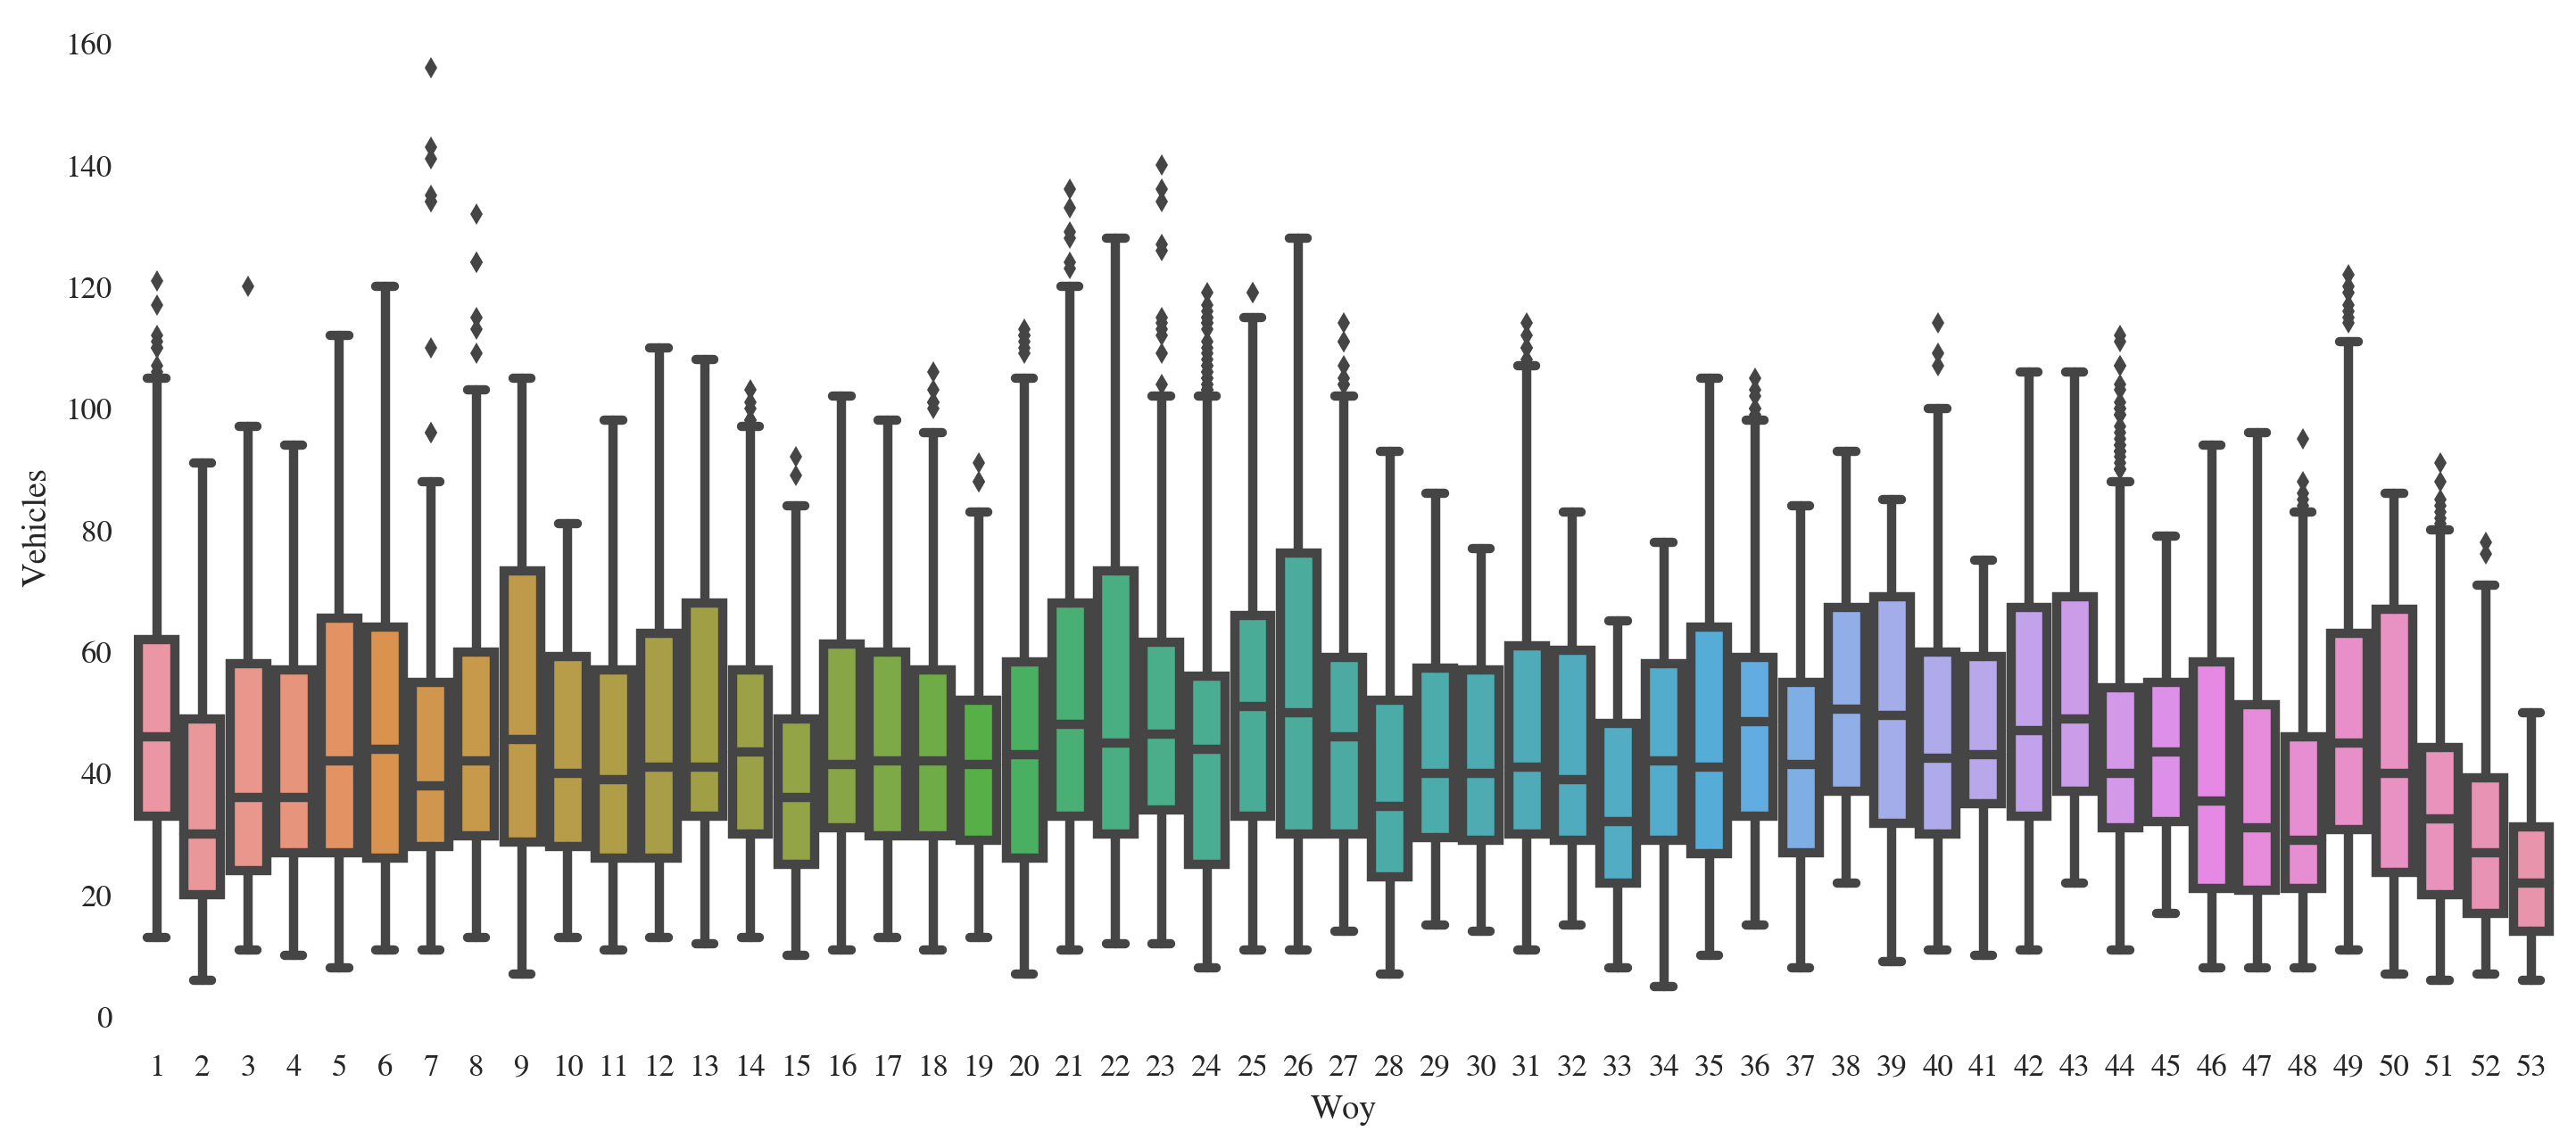

In [39]:
sns.boxplot(train['Woy'],train['Vehicles'])

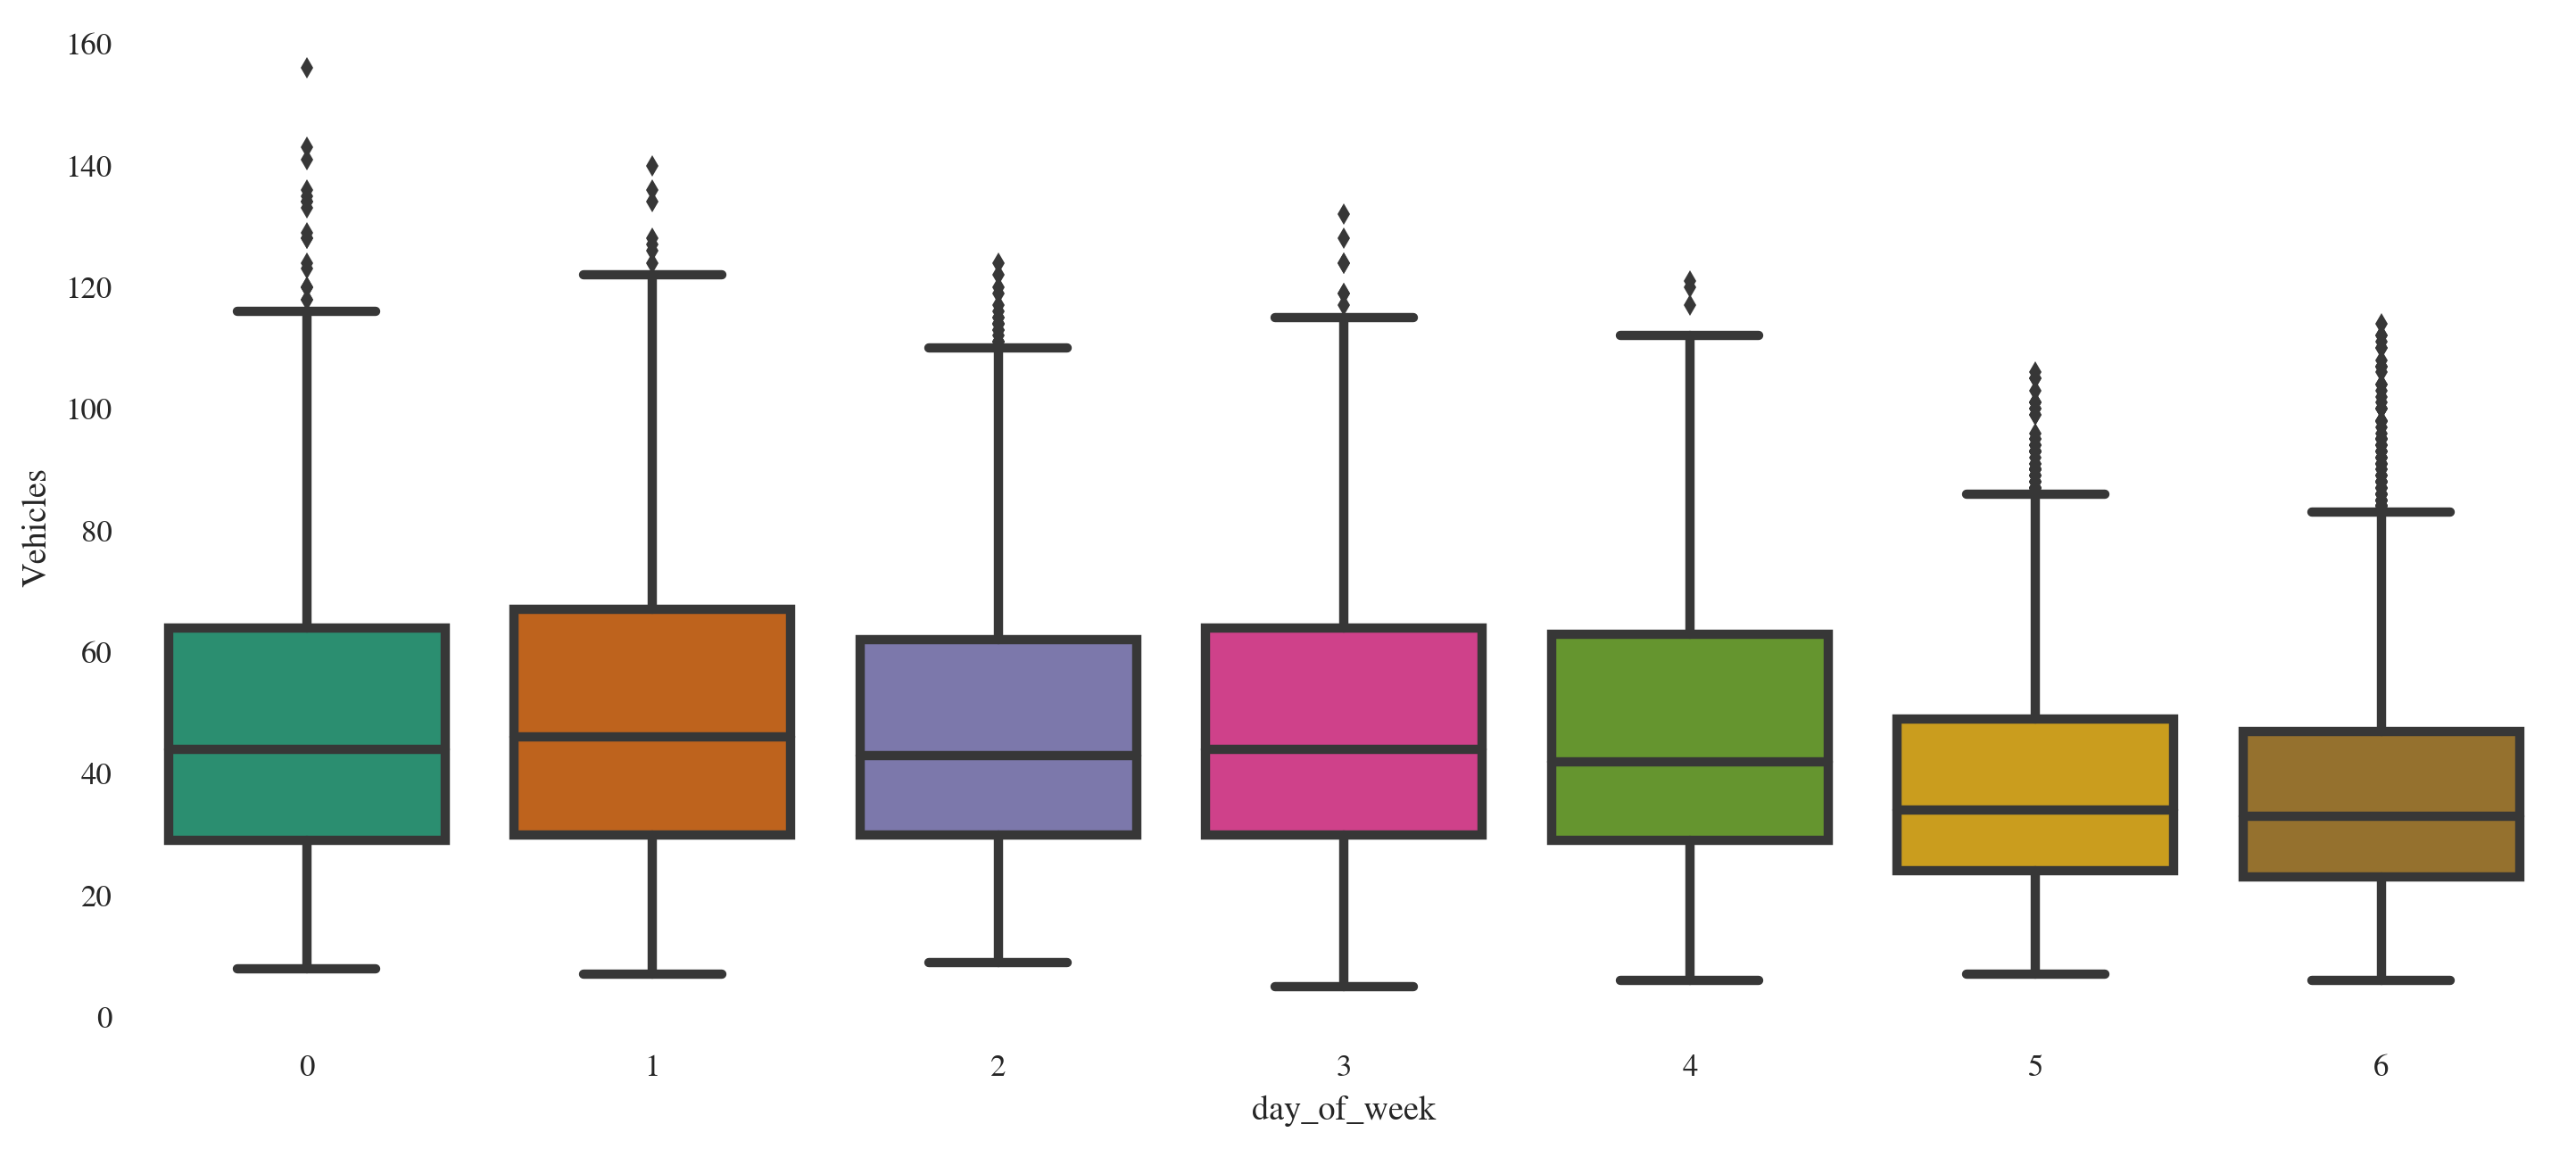

In [40]:
sns.boxplot(train['day_of_week'],train['Vehicles'])

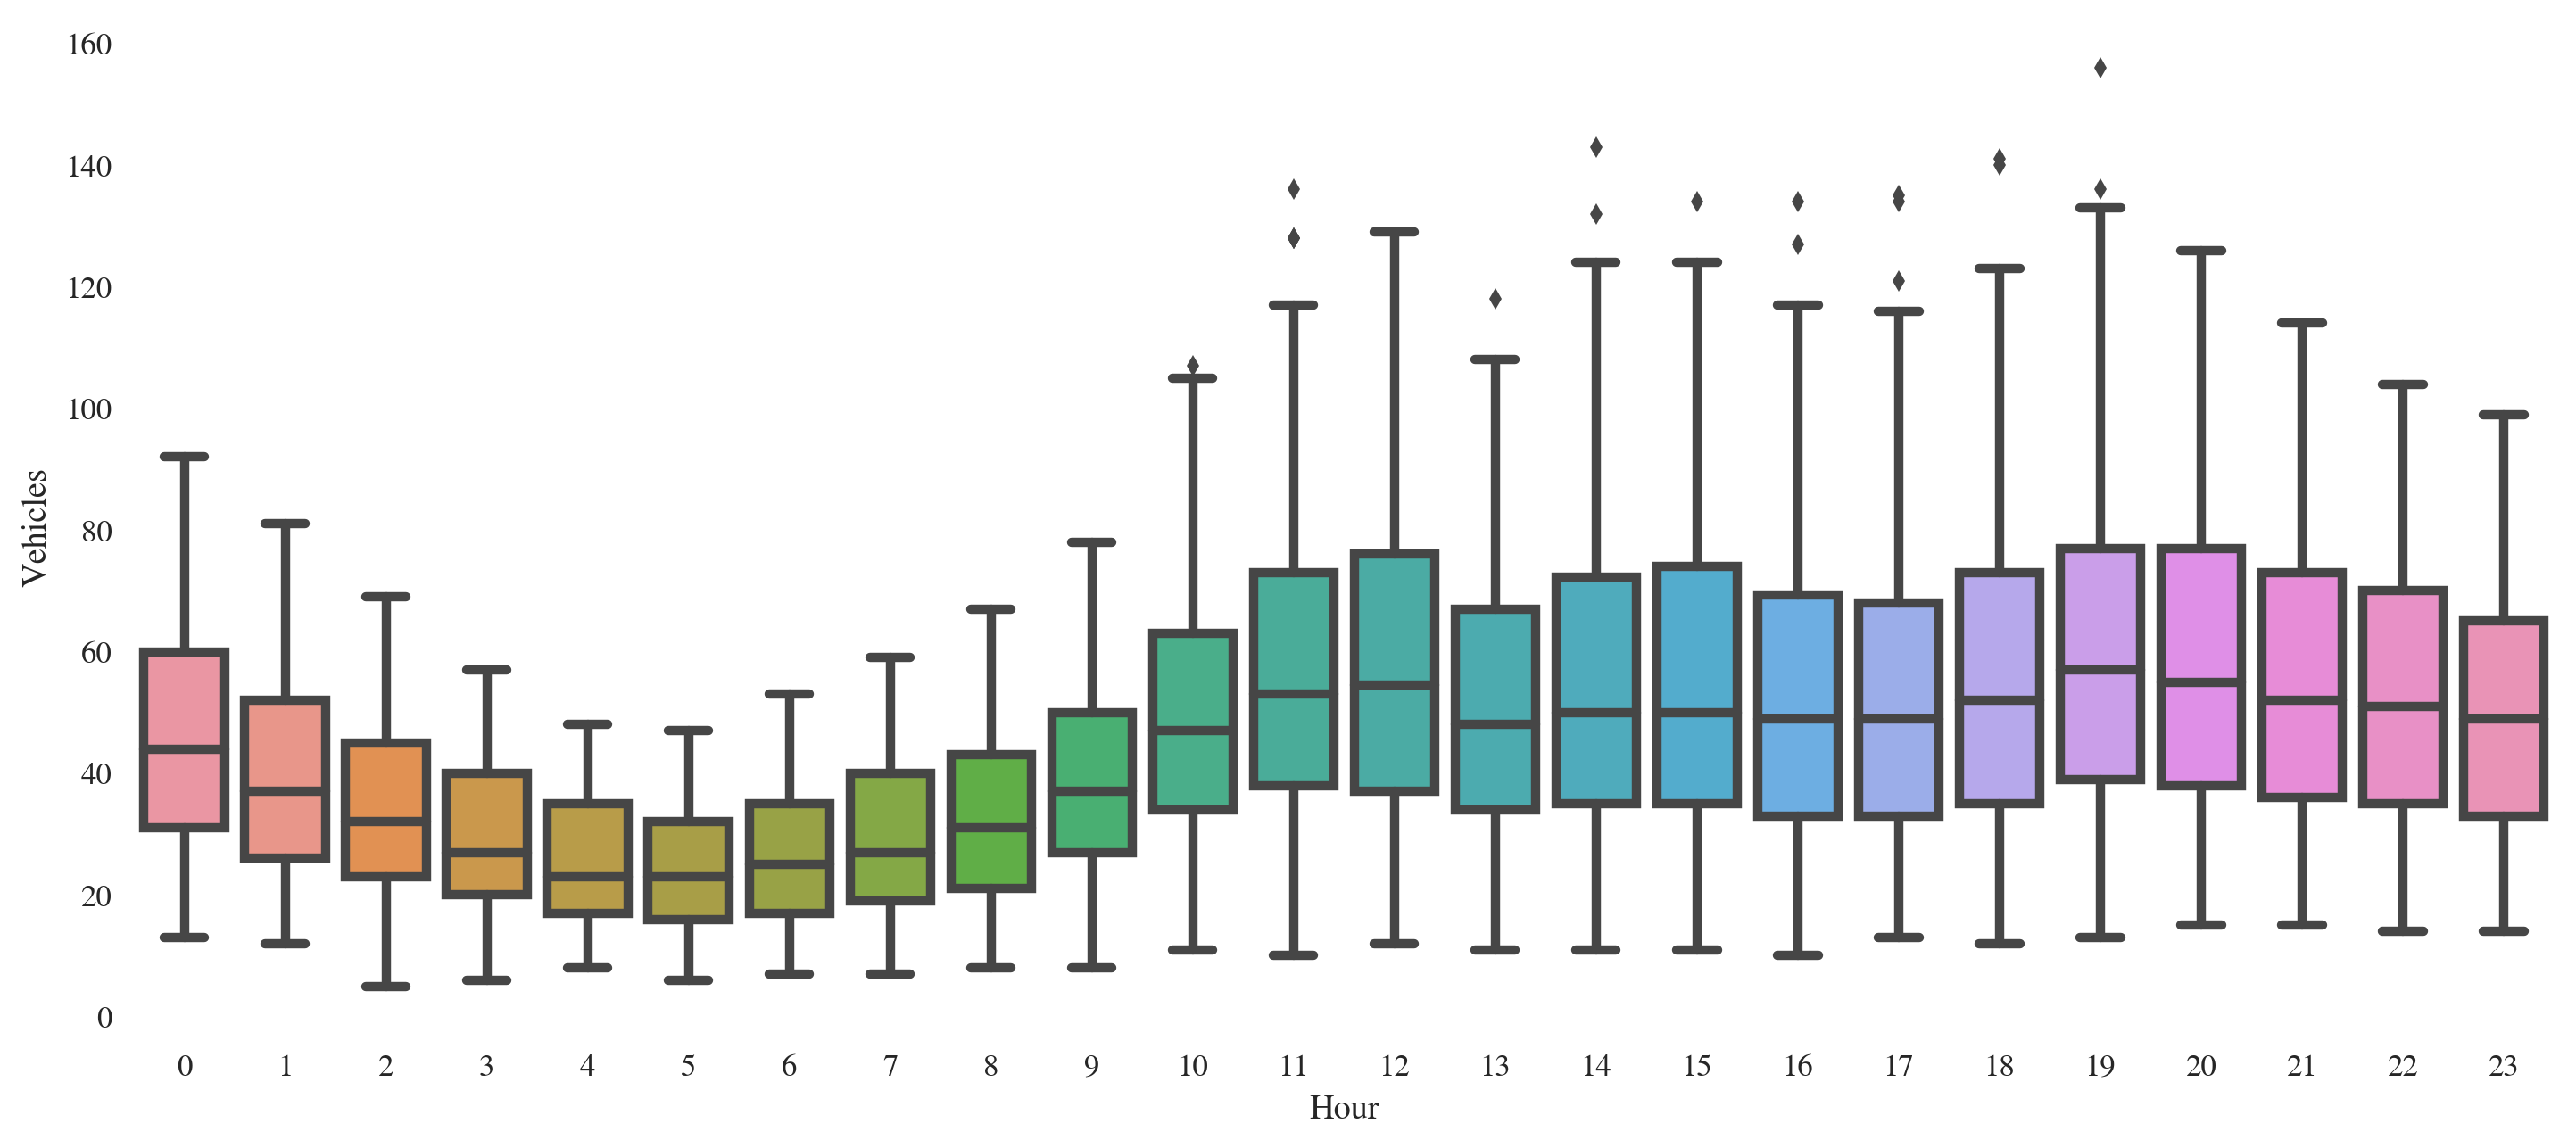

In [41]:
sns.boxplot(train['Hour'],train['Vehicles'])

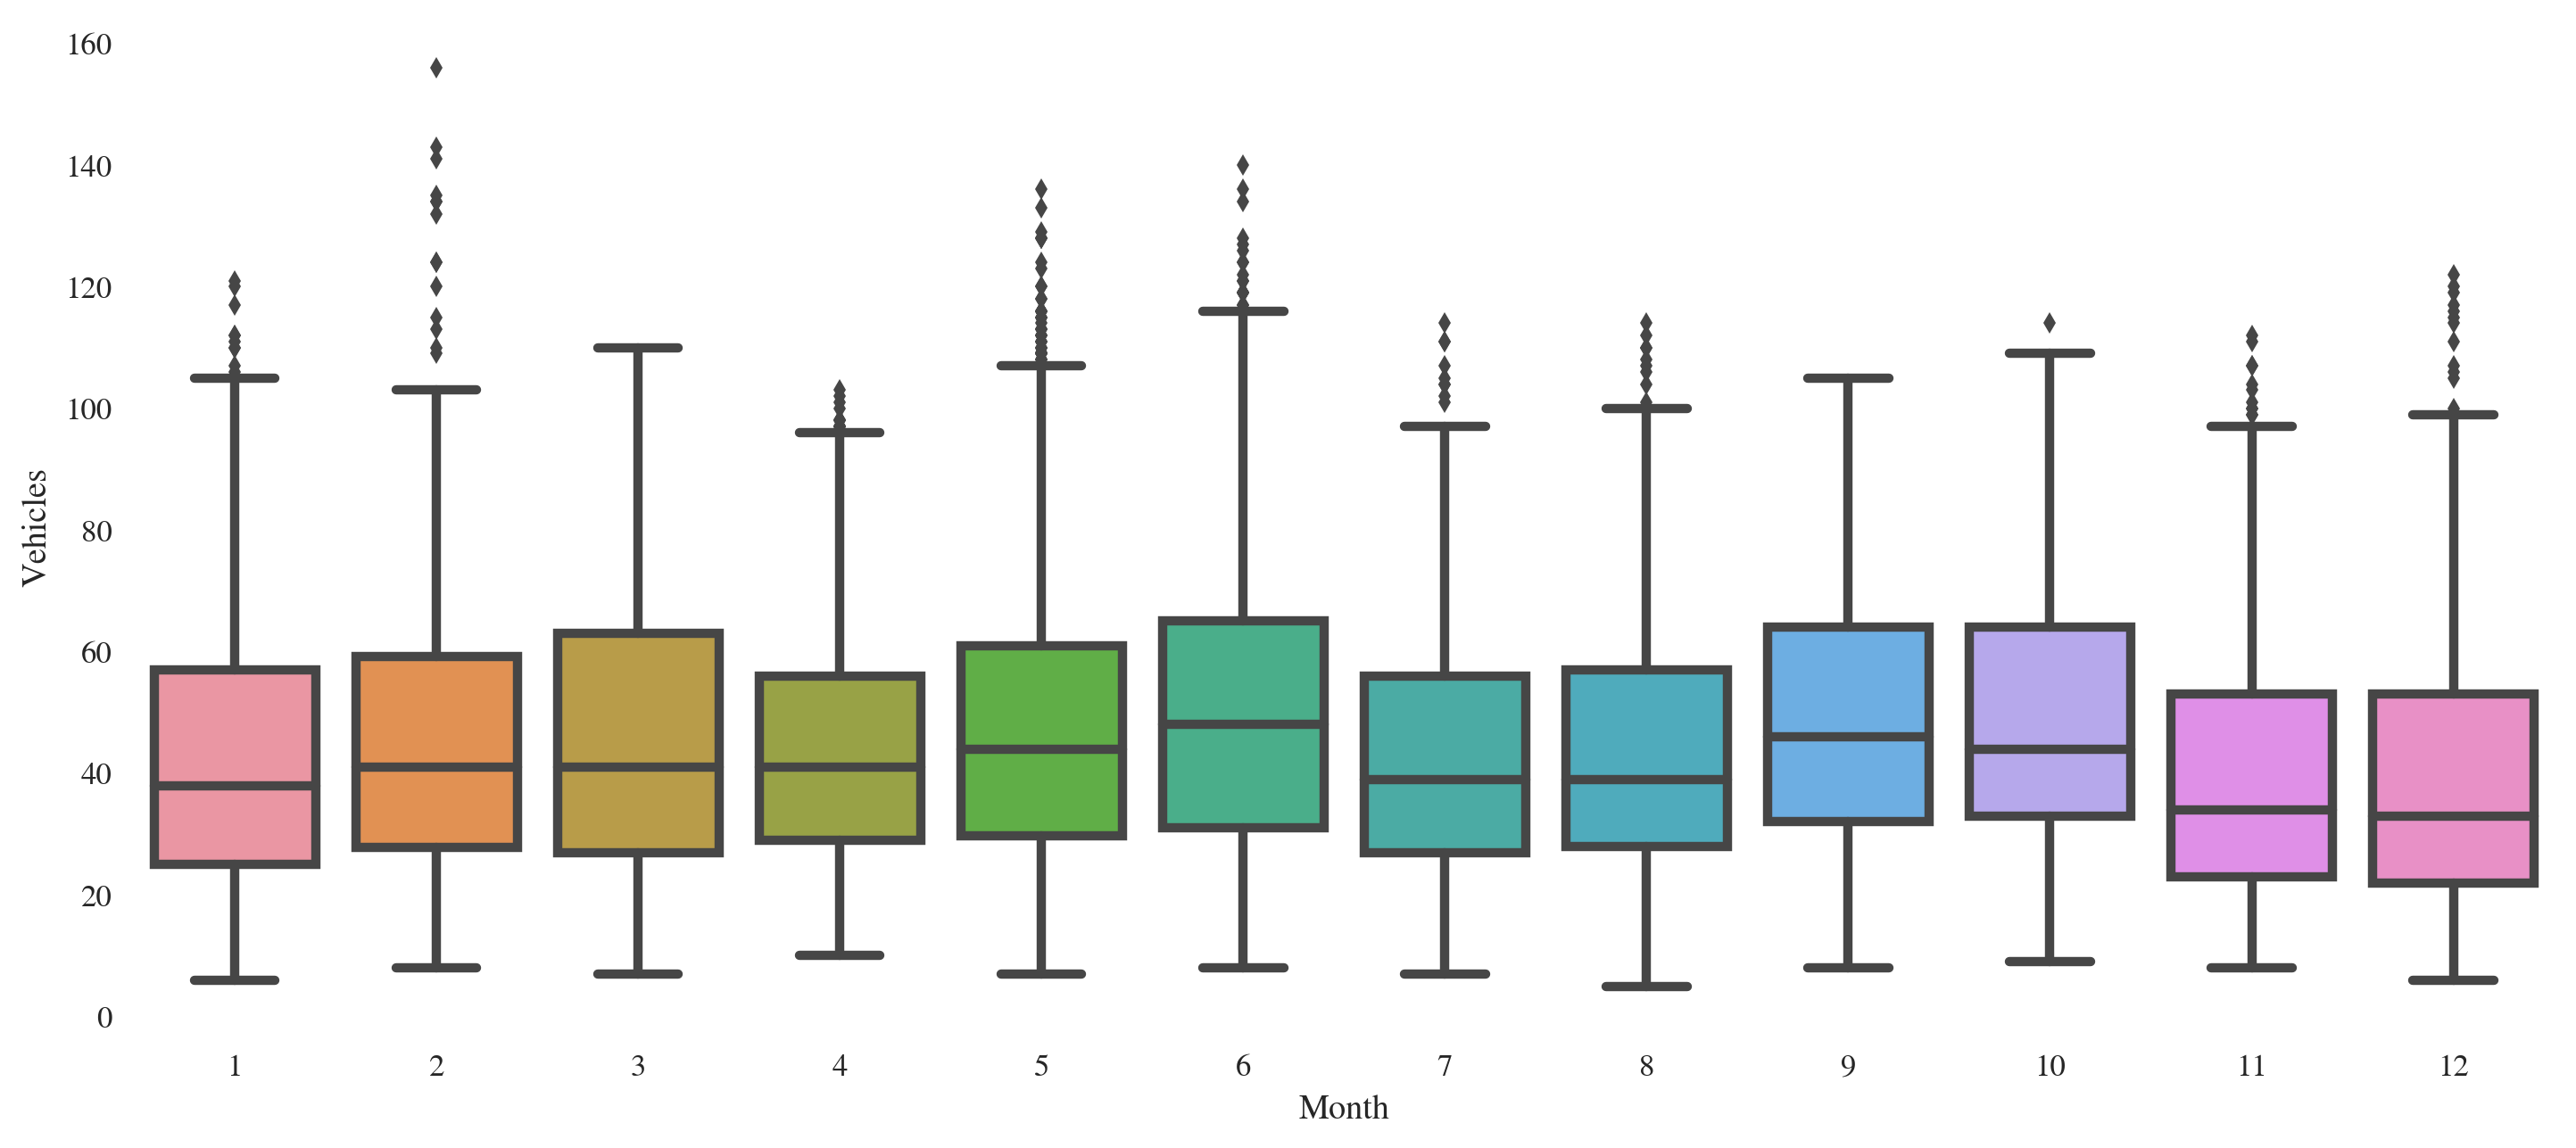

In [42]:
sns.boxplot(train['Month'],train['Vehicles'])

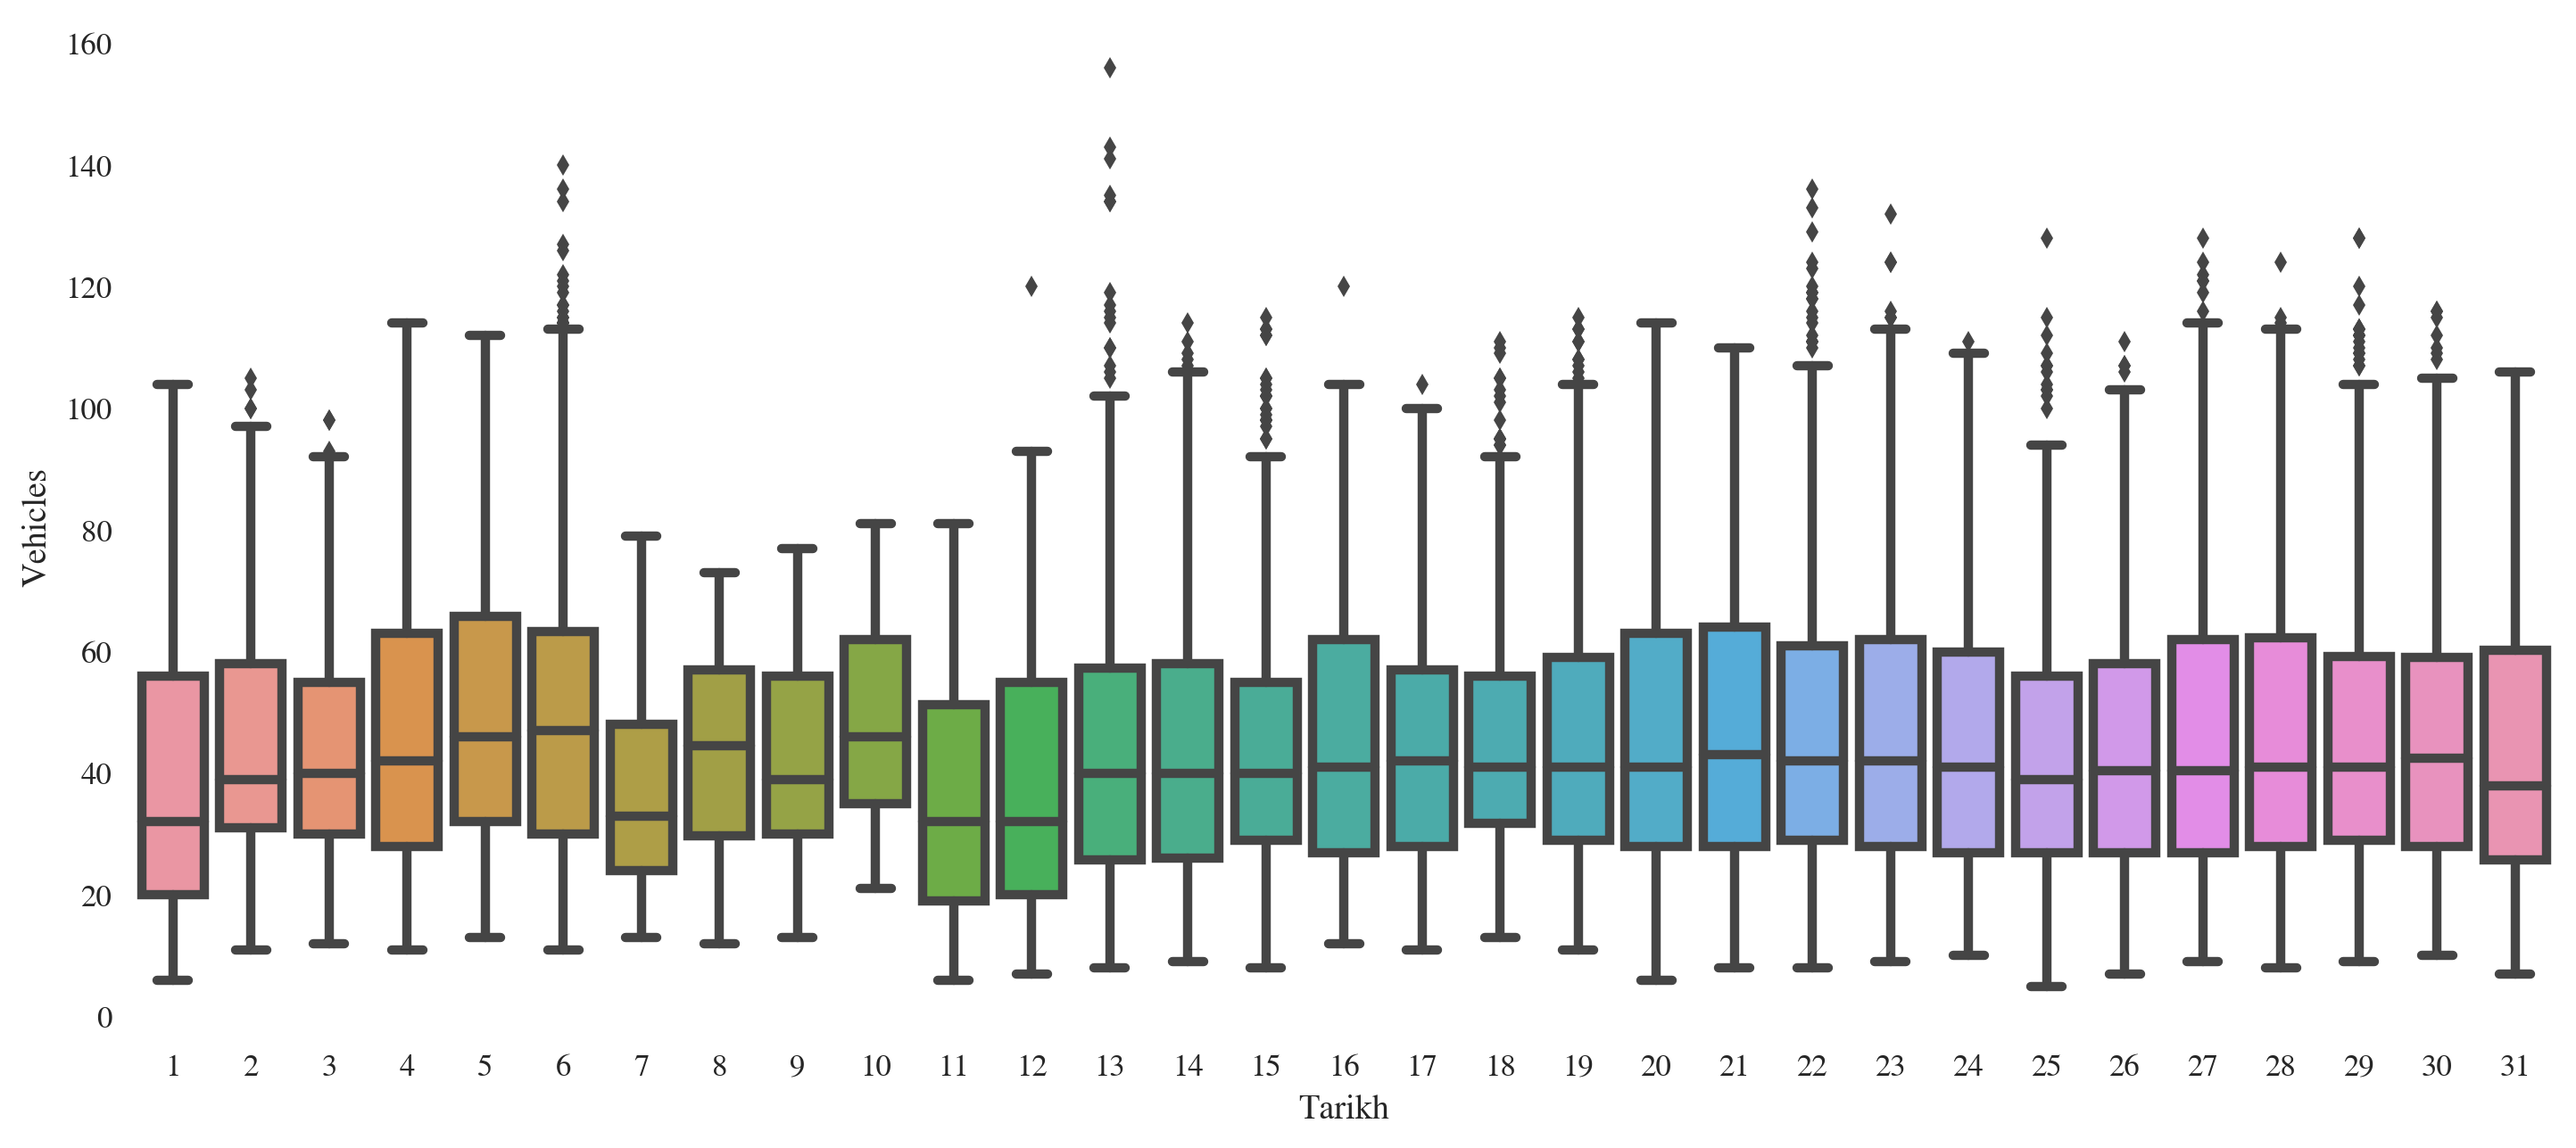

In [43]:
sns.boxplot(train['Tarikh'],train['Vehicles'])

In [44]:
def hour_buckets(df):
    df.ix[((df['Hour'] > 0) & (df['Hour'] <= 9)), 'Hour'] = 0
    df.ix[((((df['Hour'] > 9) & (df['Hour']<=23)))), 'Hour'] = 1
    return df 
train = hour_buckets(train)

In [47]:
test = hour_buckets(test)

In [49]:
train.head()

,DateTime,Hourst,Vehicles,ID,Date,Tarikh,Month,Hour,day_of_week,Woy
0,01-11-15 0:00,0,15,20151101001,2015-01-11 00:00:00,11,1,0,6,2
1,01-11-15 1:00,1,13,20151101011,2015-01-11 01:00:00,11,1,0,6,2
2,01-11-15 2:00,2,10,20151101021,2015-01-11 02:00:00,11,1,0,6,2
3,01-11-15 3:00,3,7,20151101031,2015-01-11 03:00:00,11,1,0,6,2
4,01-11-15 4:00,4,9,20151101041,2015-01-11 04:00:00,11,1,0,6,2


In [50]:
train['Day_No'] = train['Month']*30+train['Tarikh']
test['Day_No'] = test['Month']*30+test['Tarikh']

In [51]:
train.head()

,DateTime,Hourst,Vehicles,ID,Date,Tarikh,Month,Hour,day_of_week,Woy,Day_No
0,01-11-15 0:00,0,15,20151101001,2015-01-11 00:00:00,11,1,0,6,2,41
1,01-11-15 1:00,1,13,20151101011,2015-01-11 01:00:00,11,1,0,6,2,41
2,01-11-15 2:00,2,10,20151101021,2015-01-11 02:00:00,11,1,0,6,2,41
3,01-11-15 3:00,3,7,20151101031,2015-01-11 03:00:00,11,1,0,6,2,41
4,01-11-15 4:00,4,9,20151101041,2015-01-11 04:00:00,11,1,0,6,2,41


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
lr = LinearRegression(normalize = 1)

C:\Users\NISHANT\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [68]:
del train['Date']
del test['Date']

In [69]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( train.drop(['DateTime','ID','Vehicles'],axis = 1),train['Vehicles'], test_size=.3, random_state=100 )
lr.fit(Xtrain, Ytrain )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=1)

In [70]:
print ("Training :"+str((mean_squared_error( Ytrain, lr.predict(Xtrain)))**.5))
print ("Test :"+str(mean_squared_error( Ytest, lr.predict(Xtest))**.5))

Training :11.9637909713
Test :12.041026953


In [73]:
from xgboost.sklearn import XGBRegressor

In [74]:
xgb = XGBRegressor(objective='reg:linear', silent=False,n_estimators=200)

In [75]:
xgb.fit(Xtrain, Ytrain )

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

In [76]:
print ("Training :"+str((mean_squared_error( Ytrain, xgb.predict(Xtrain)))**.5))
print ("Test :"+str(mean_squared_error( Ytest, xgb.predict(Xtest))**.5))

Training :7.96782479564
Test :8.19435062622


In [78]:
test = test.drop(['DateTime','ID','Vehicles'],axis = 1)

In [79]:
test['Vehicles'] = xgb.predict(test)

In [80]:
test

,Hourst,Tarikh,Month,Hour,day_of_week,Woy,Day_No,Vehicles
0,14581,30,6,1,4,26,210,93.486534
1,14582,30,6,1,4,26,210,93.486534
2,14583,30,6,1,4,26,210,93.486534
3,14584,30,6,1,4,26,210,93.486534
4,14585,30,6,1,4,26,210,93.486534
5,14586,30,6,1,4,26,210,93.486534
6,14587,30,6,1,4,26,210,93.486534
7,14588,30,6,1,4,26,210,90.597145
8,14589,30,6,1,4,26,210,90.597145
9,14590,30,6,1,4,26,210,86.859909


In [81]:
train3 = pd.read_csv("Junc/junc3tr.csv", parse_dates=True)
test3 = pd.read_csv("Junc/junc3te.csv", parse_dates=True)

In [82]:
train3['Date'] = pd.to_datetime(train3['DateTime'])
test3['Date'] = pd.to_datetime(test3['DateTime'])

In [83]:
train3['Tarikh'] = train3['Date'].dt.day
train3['Month'] = train3['Date'].dt.month
train3['Hour'] = train3['Date'].dt.hour
train3["day_of_week"] = train3["Date"].dt.weekday
train3["Woy"] = train3["Date"].dt.weekofyear

In [84]:
test3['Tarikh'] = test3['Date'].dt.day
test3['Month'] = test3['Date'].dt.month
test3['Hour'] = test3['Date'].dt.hour
test3["day_of_week"] = test3["Date"].dt.weekday
test3["Woy"] = test3["Date"].dt.weekofyear

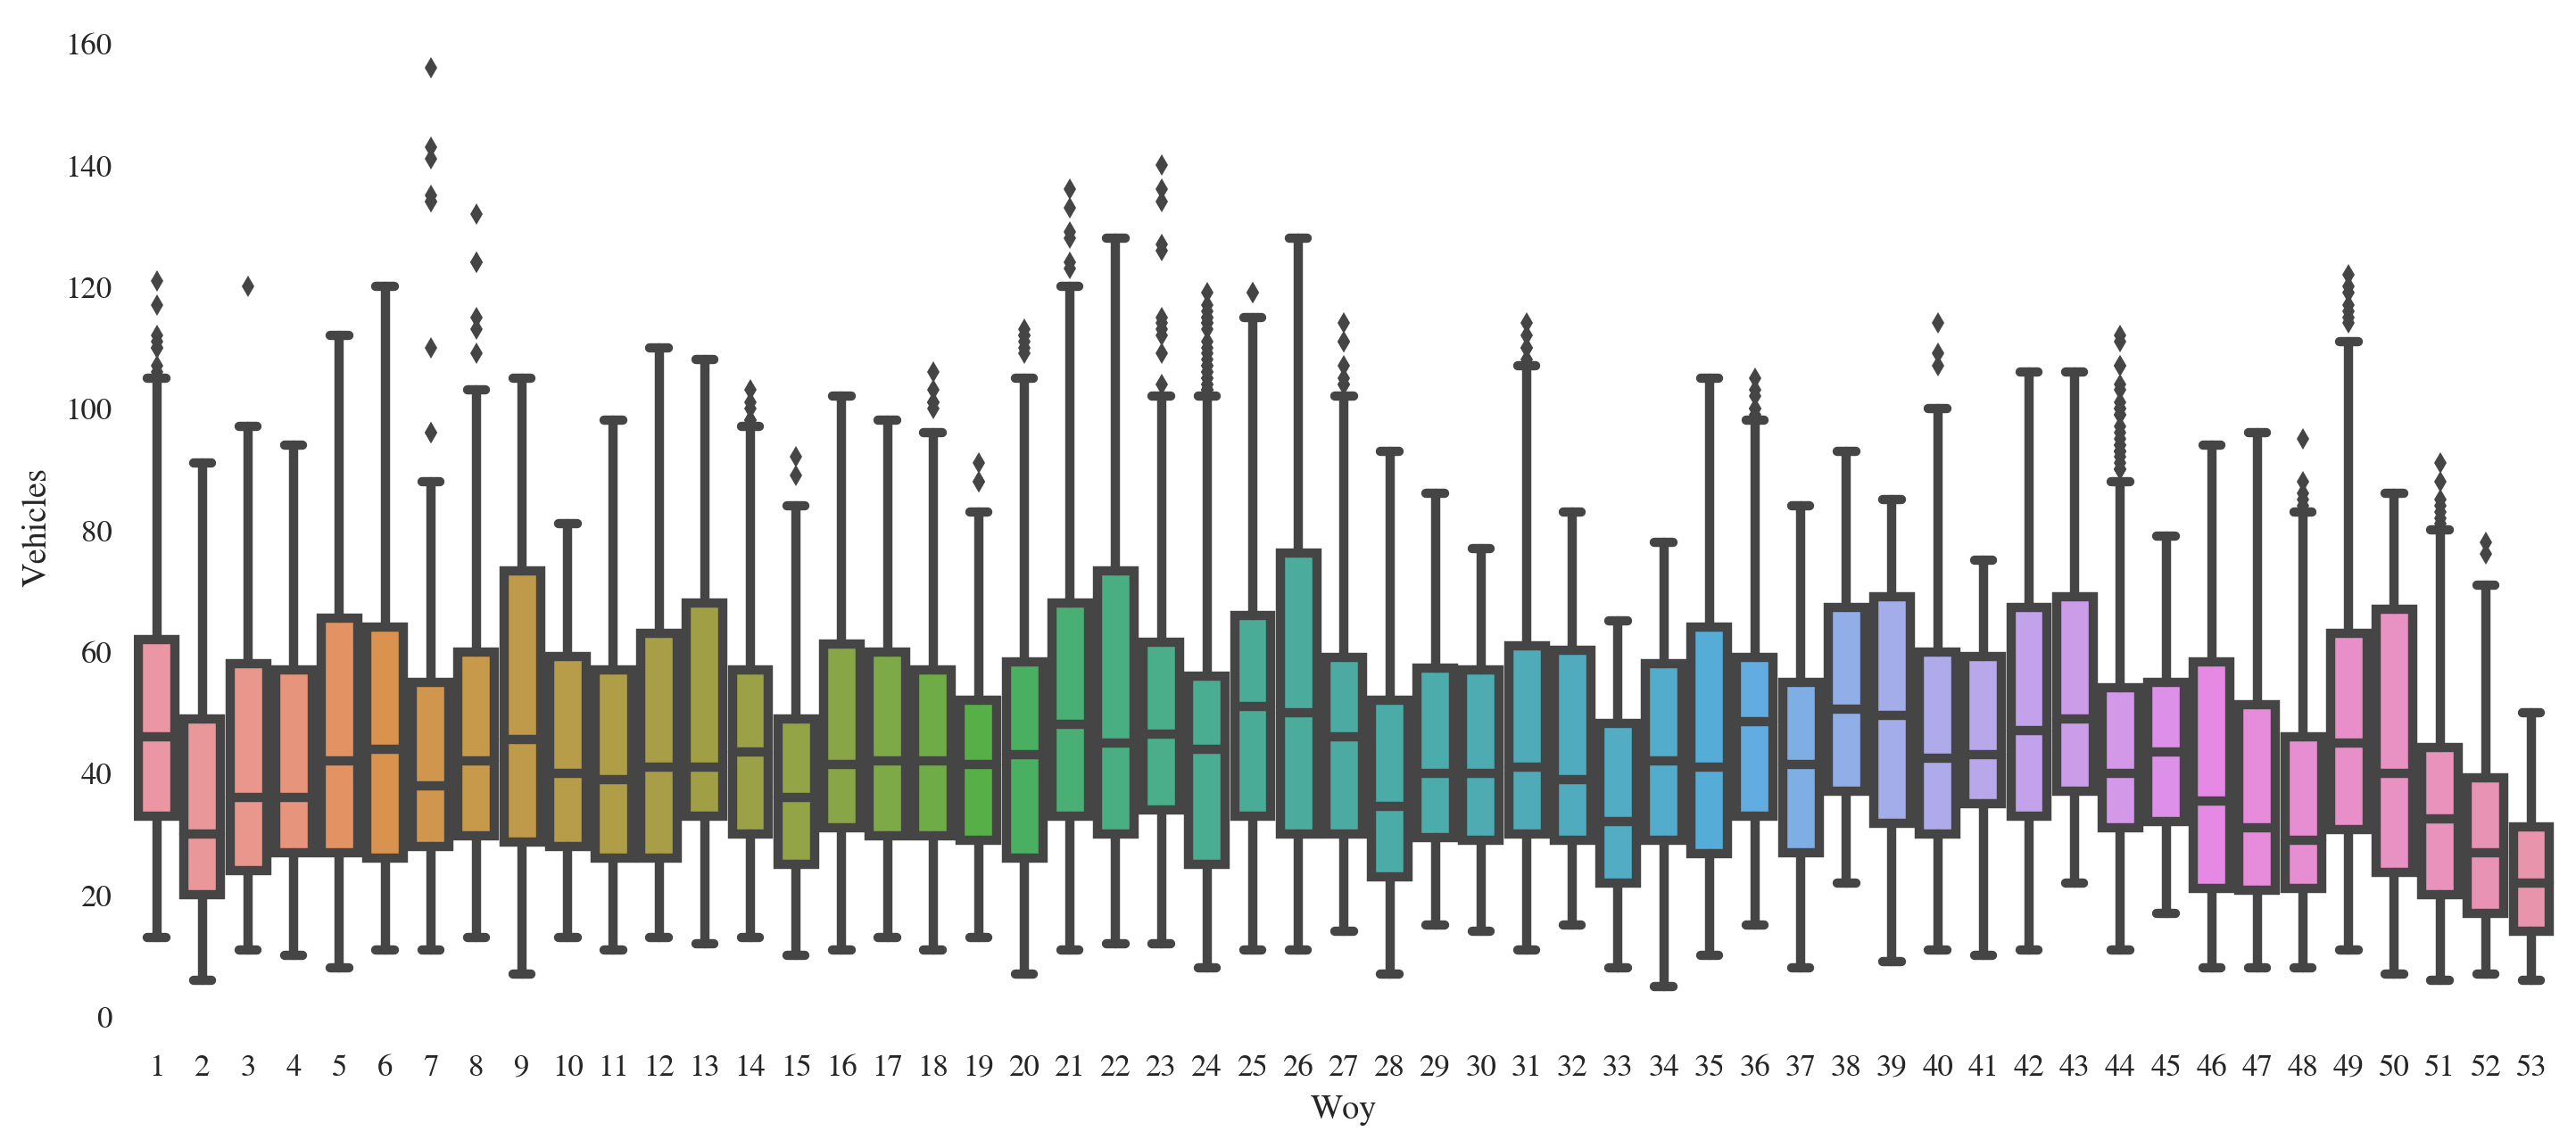

In [85]:
sns.boxplot(train['Woy'],train['Vehicles'])

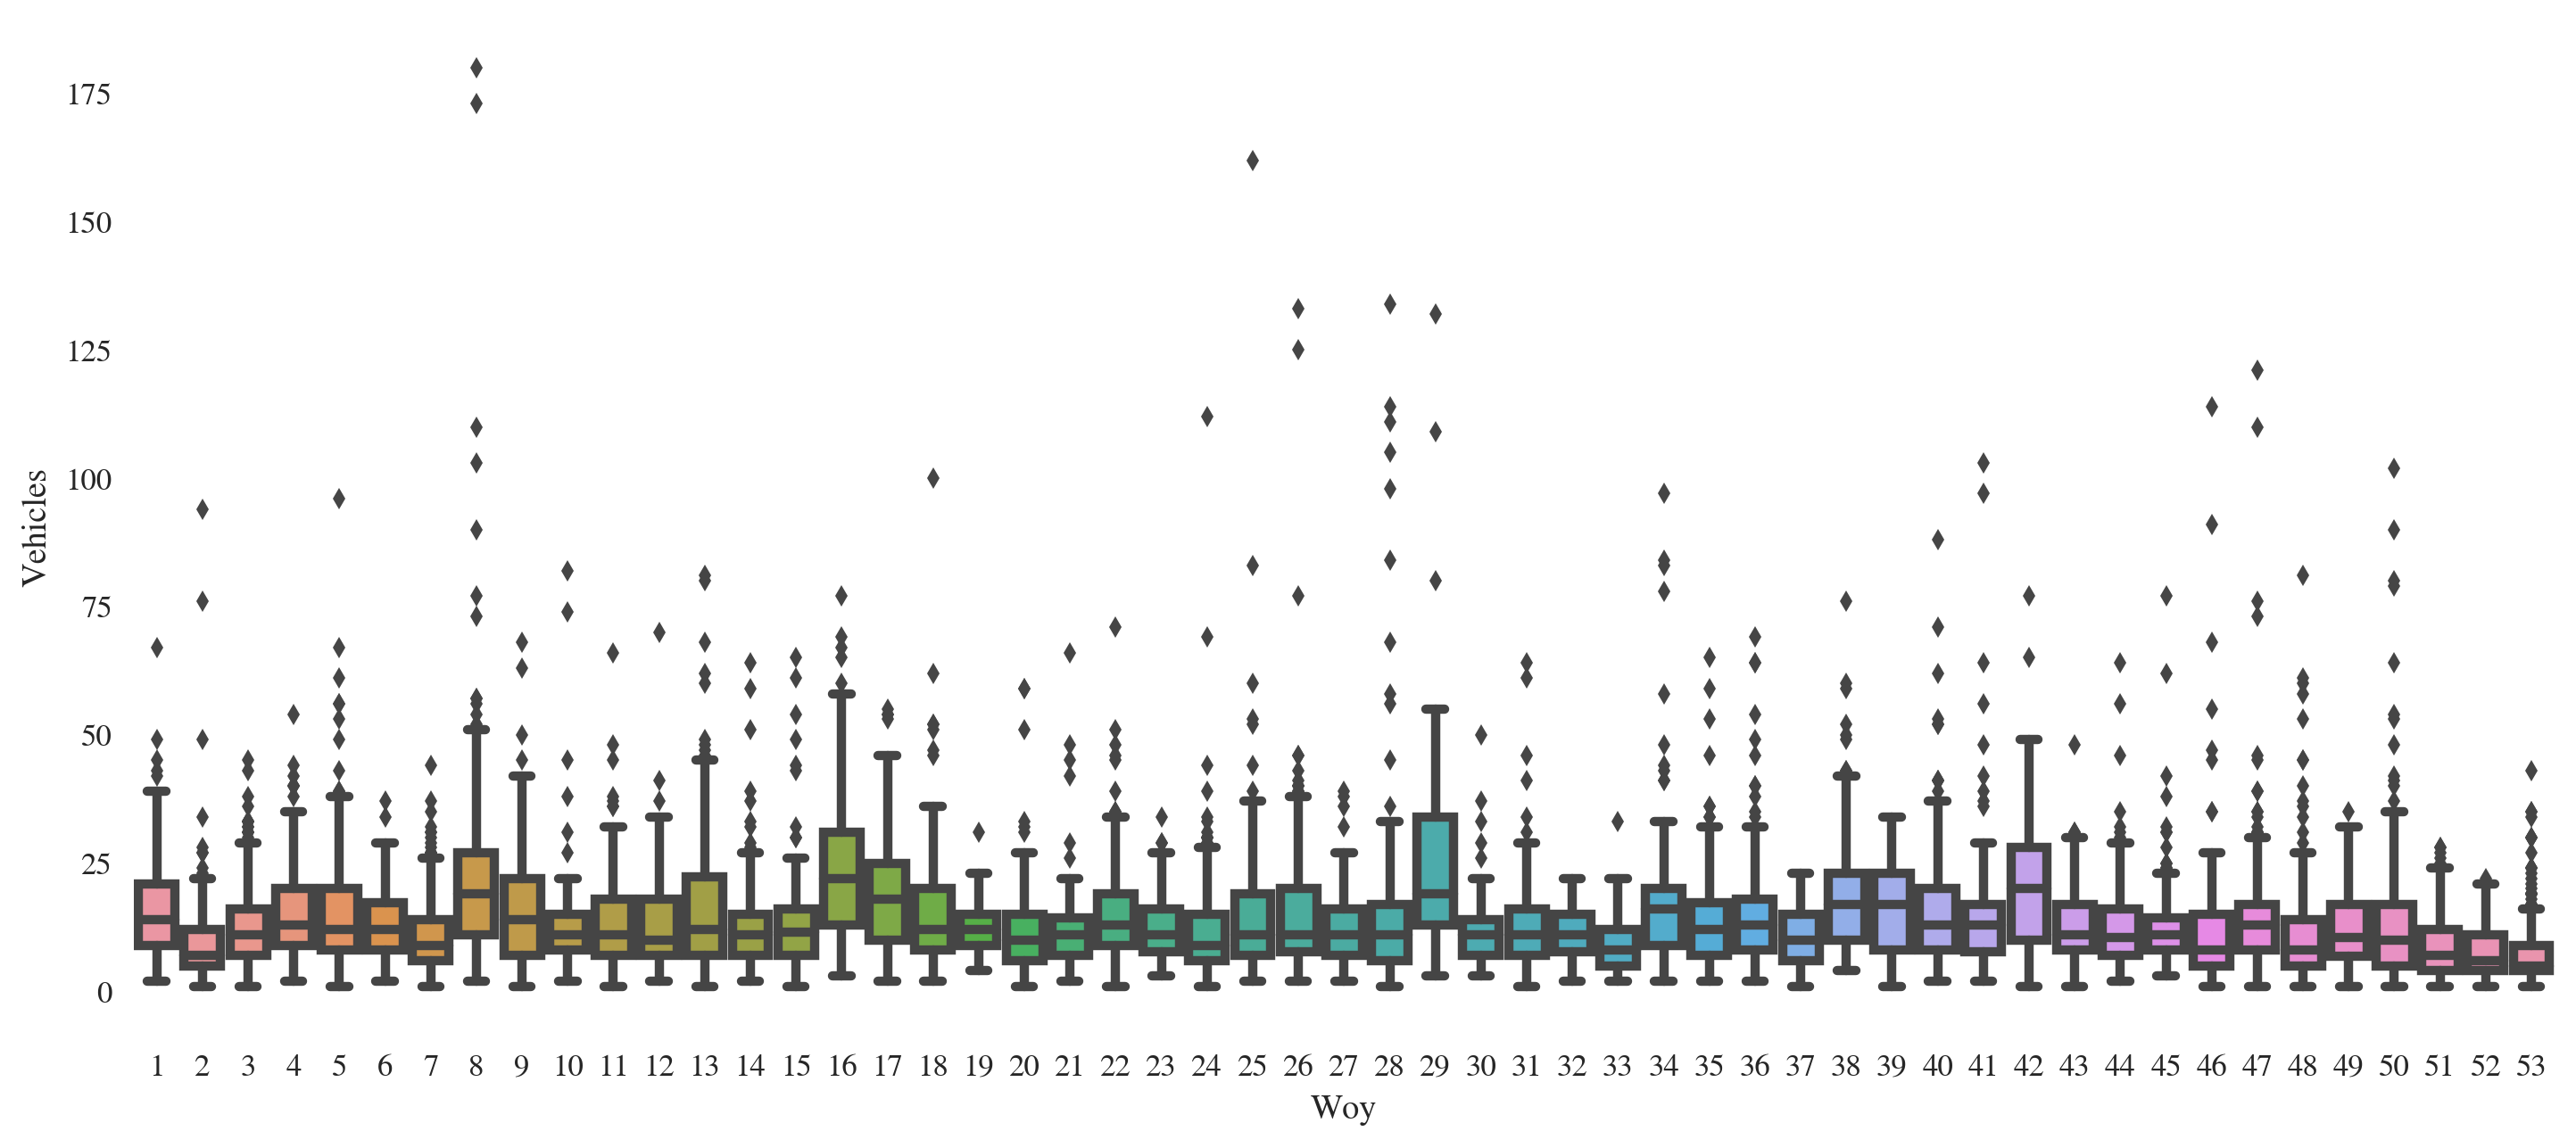

In [87]:
sns.boxplot(train3['Woy'],train3['Vehicles'])

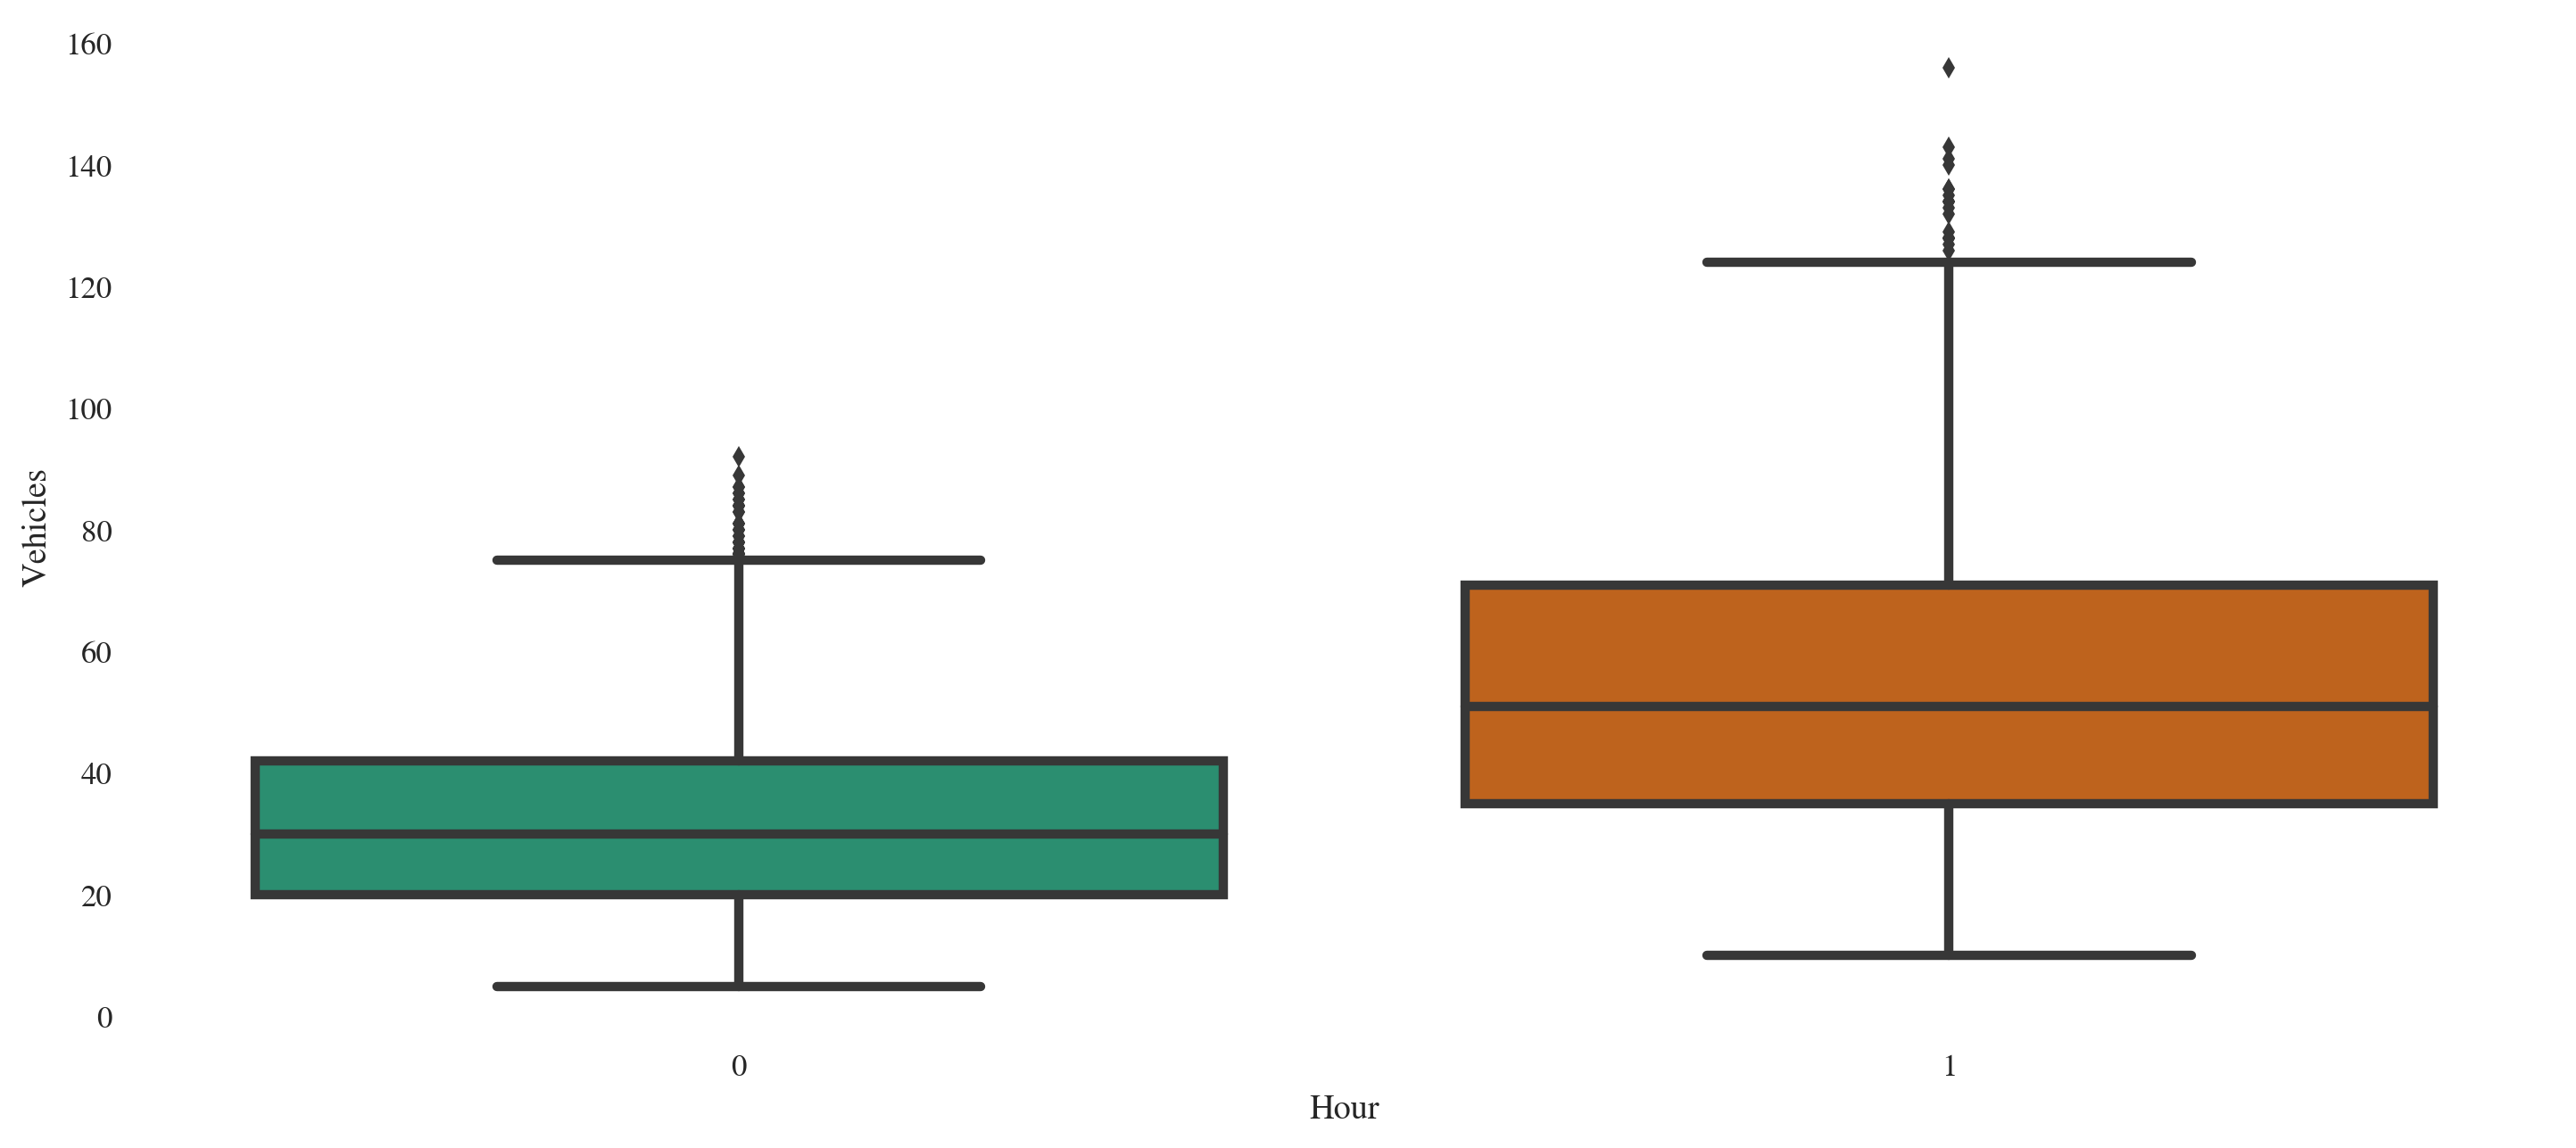

In [86]:
sns.boxplot(train['Hour'],train['Vehicles'])

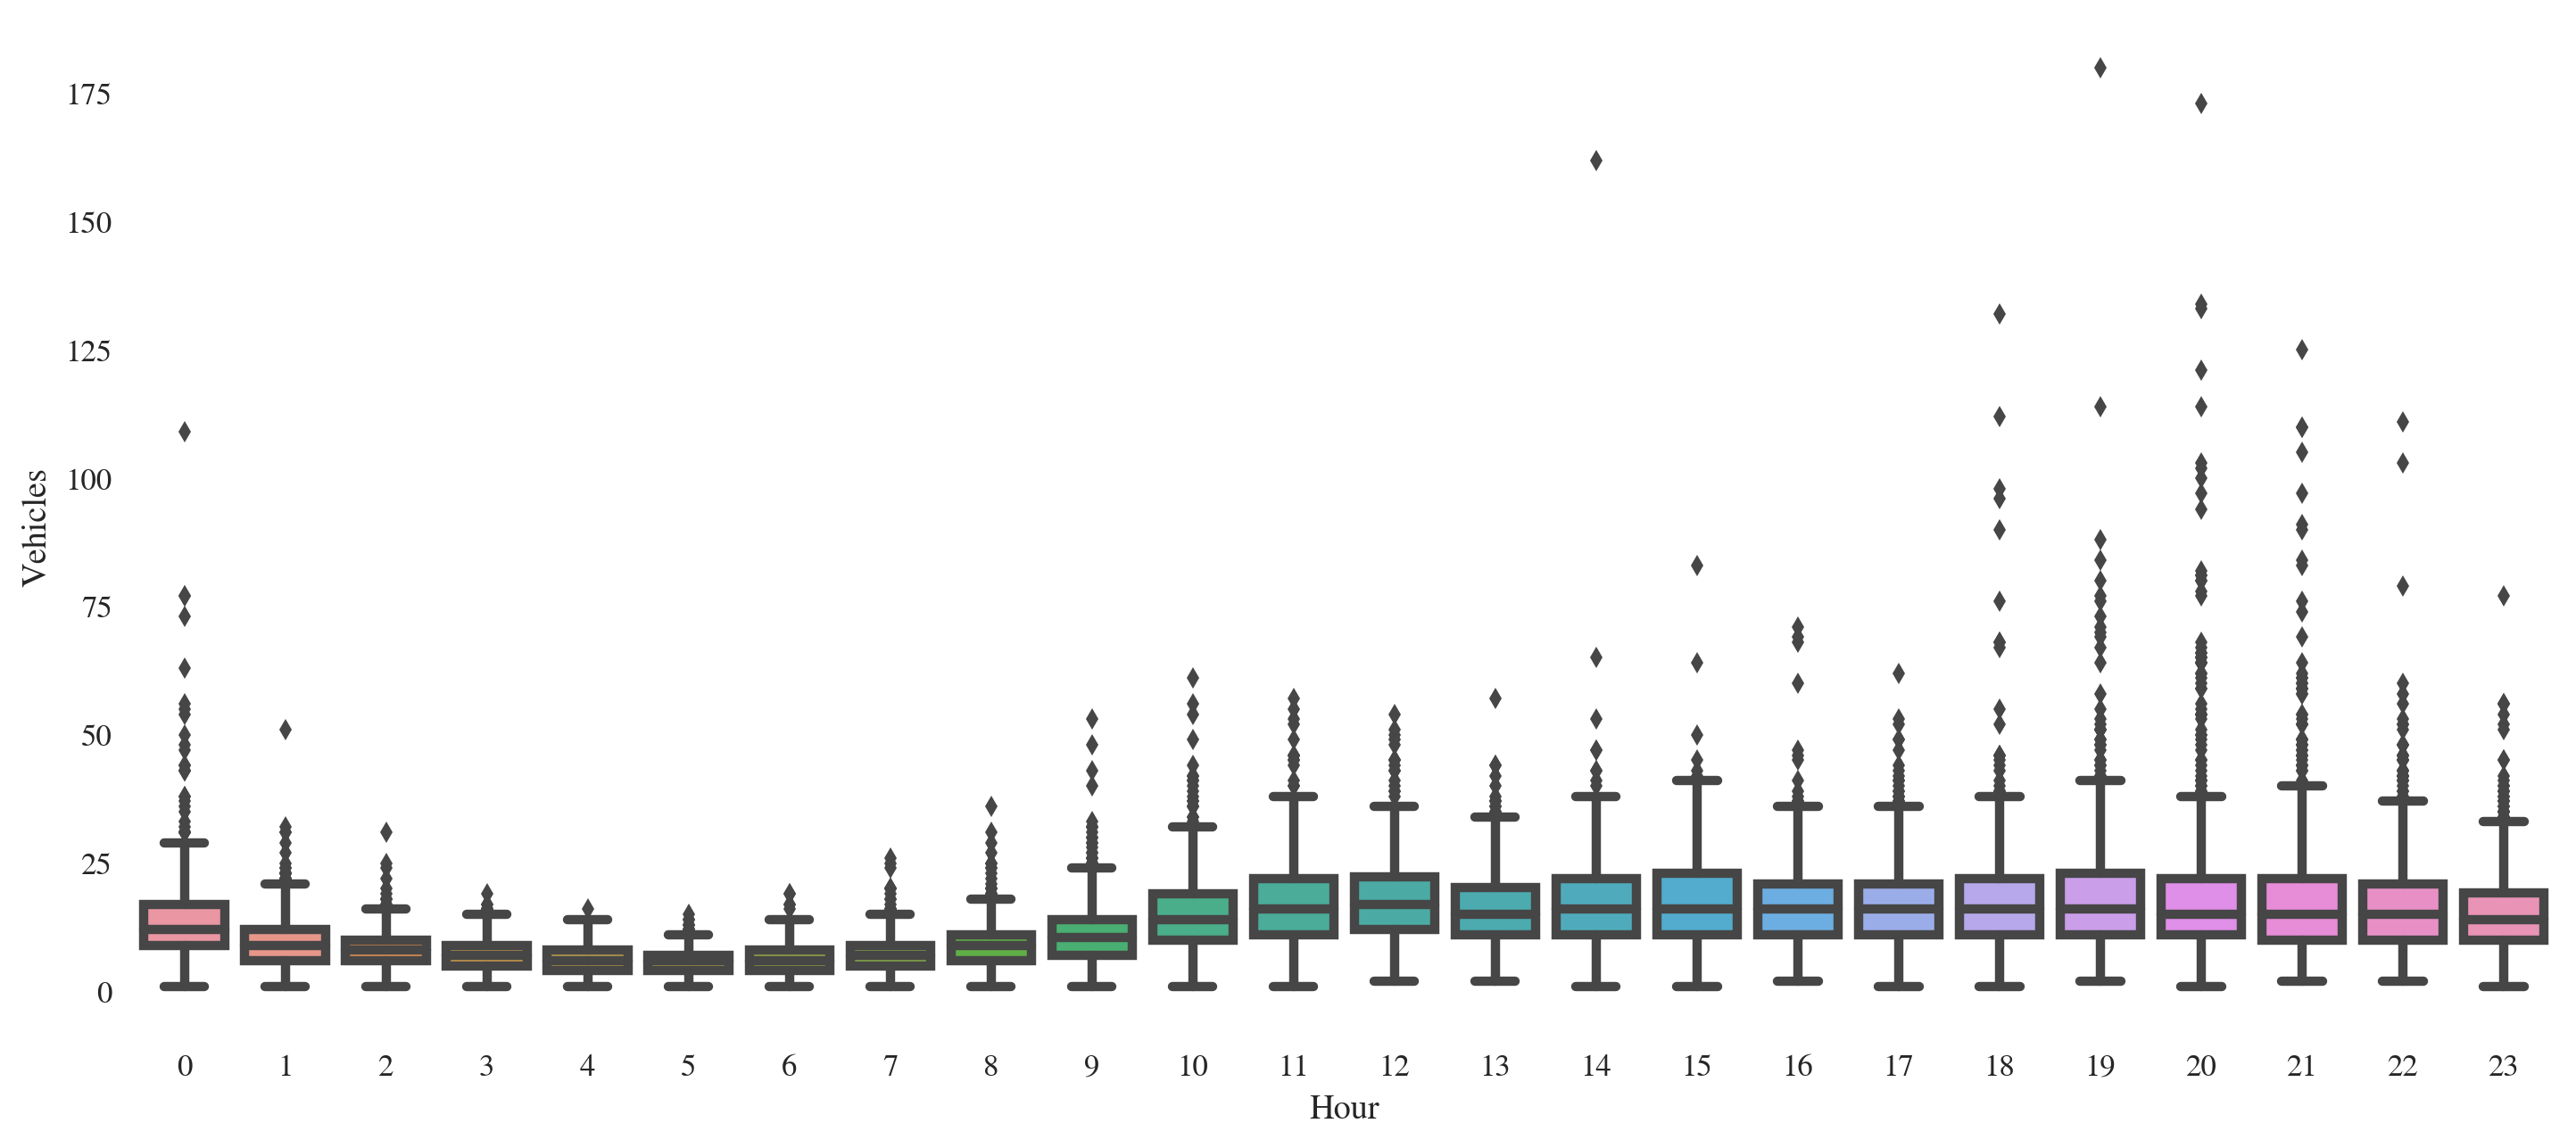

In [88]:
sns.boxplot(train3['Hour'],train3['Vehicles'])

In [89]:
def hour_buckets(df):
    df.ix[((df['Hour'] > 0) & (df['Hour'] <= 9)), 'Hour'] = 0
    df.ix[((((df['Hour'] > 9) & (df['Hour']<=23)))), 'Hour'] = 1
    return df 
train3 = hour_buckets(train3)
test3 = hour_buckets(test3)

In [91]:
train3.columns

Index(['DateTime', 'Vehicles', 'ID', 'Hourstr', 'Date', 'Tarikh', 'Month',
       'Hour', 'day_of_week', 'Woy'],
      dtype='object')

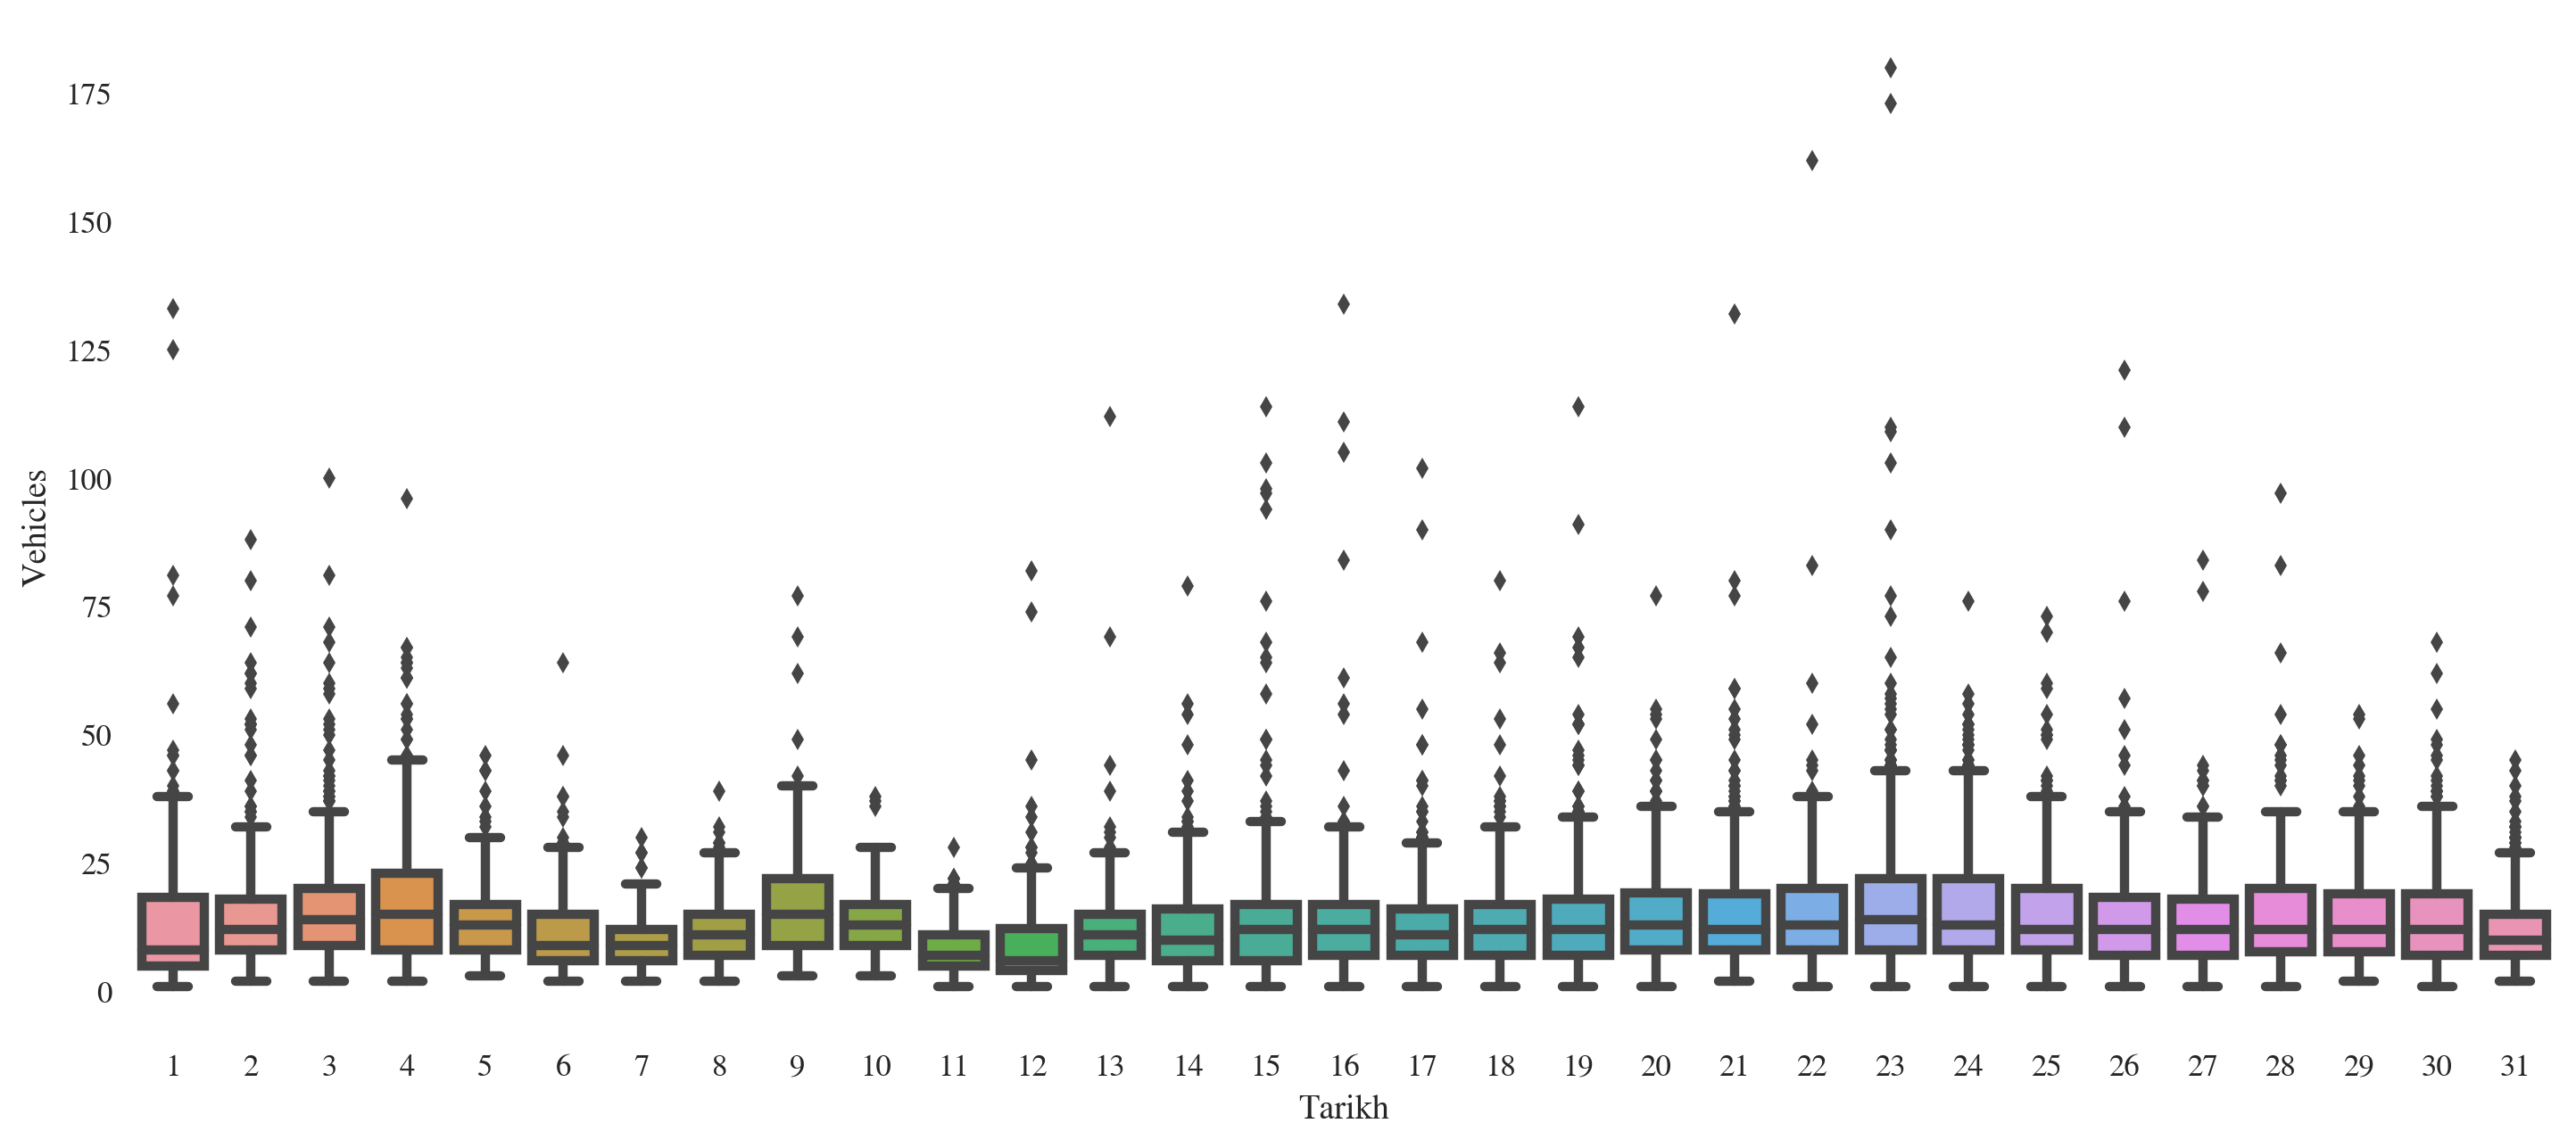

In [93]:
#Bucket this if time permits
sns.boxplot(train3['Tarikh'],train3['Vehicles'])

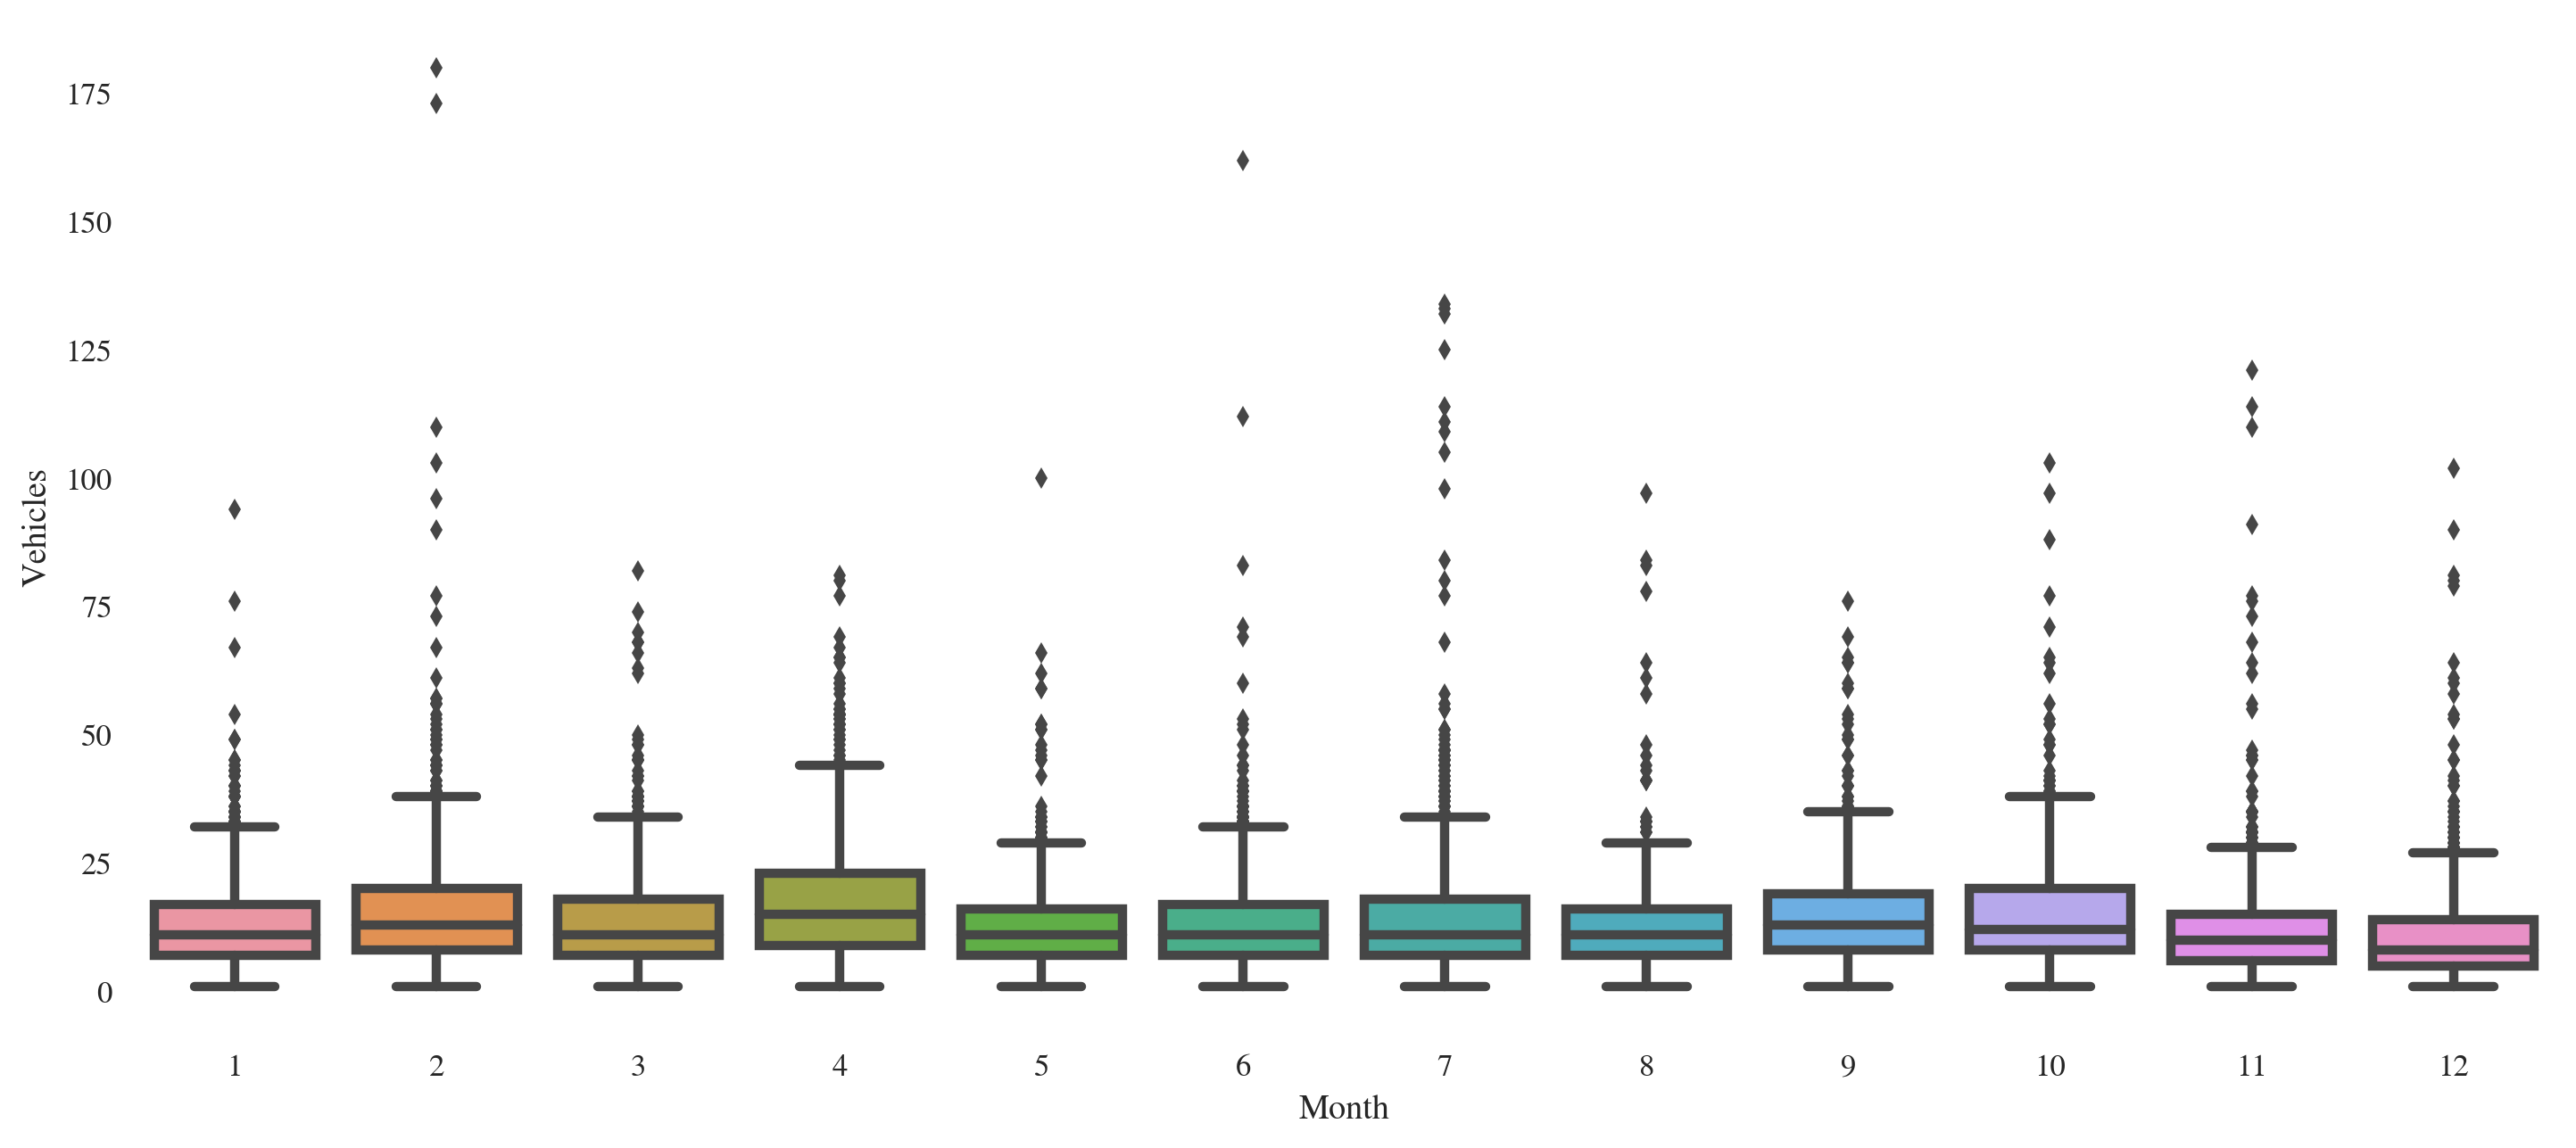

In [96]:
sns.boxplot(train3['Month'],train3['Vehicles'])

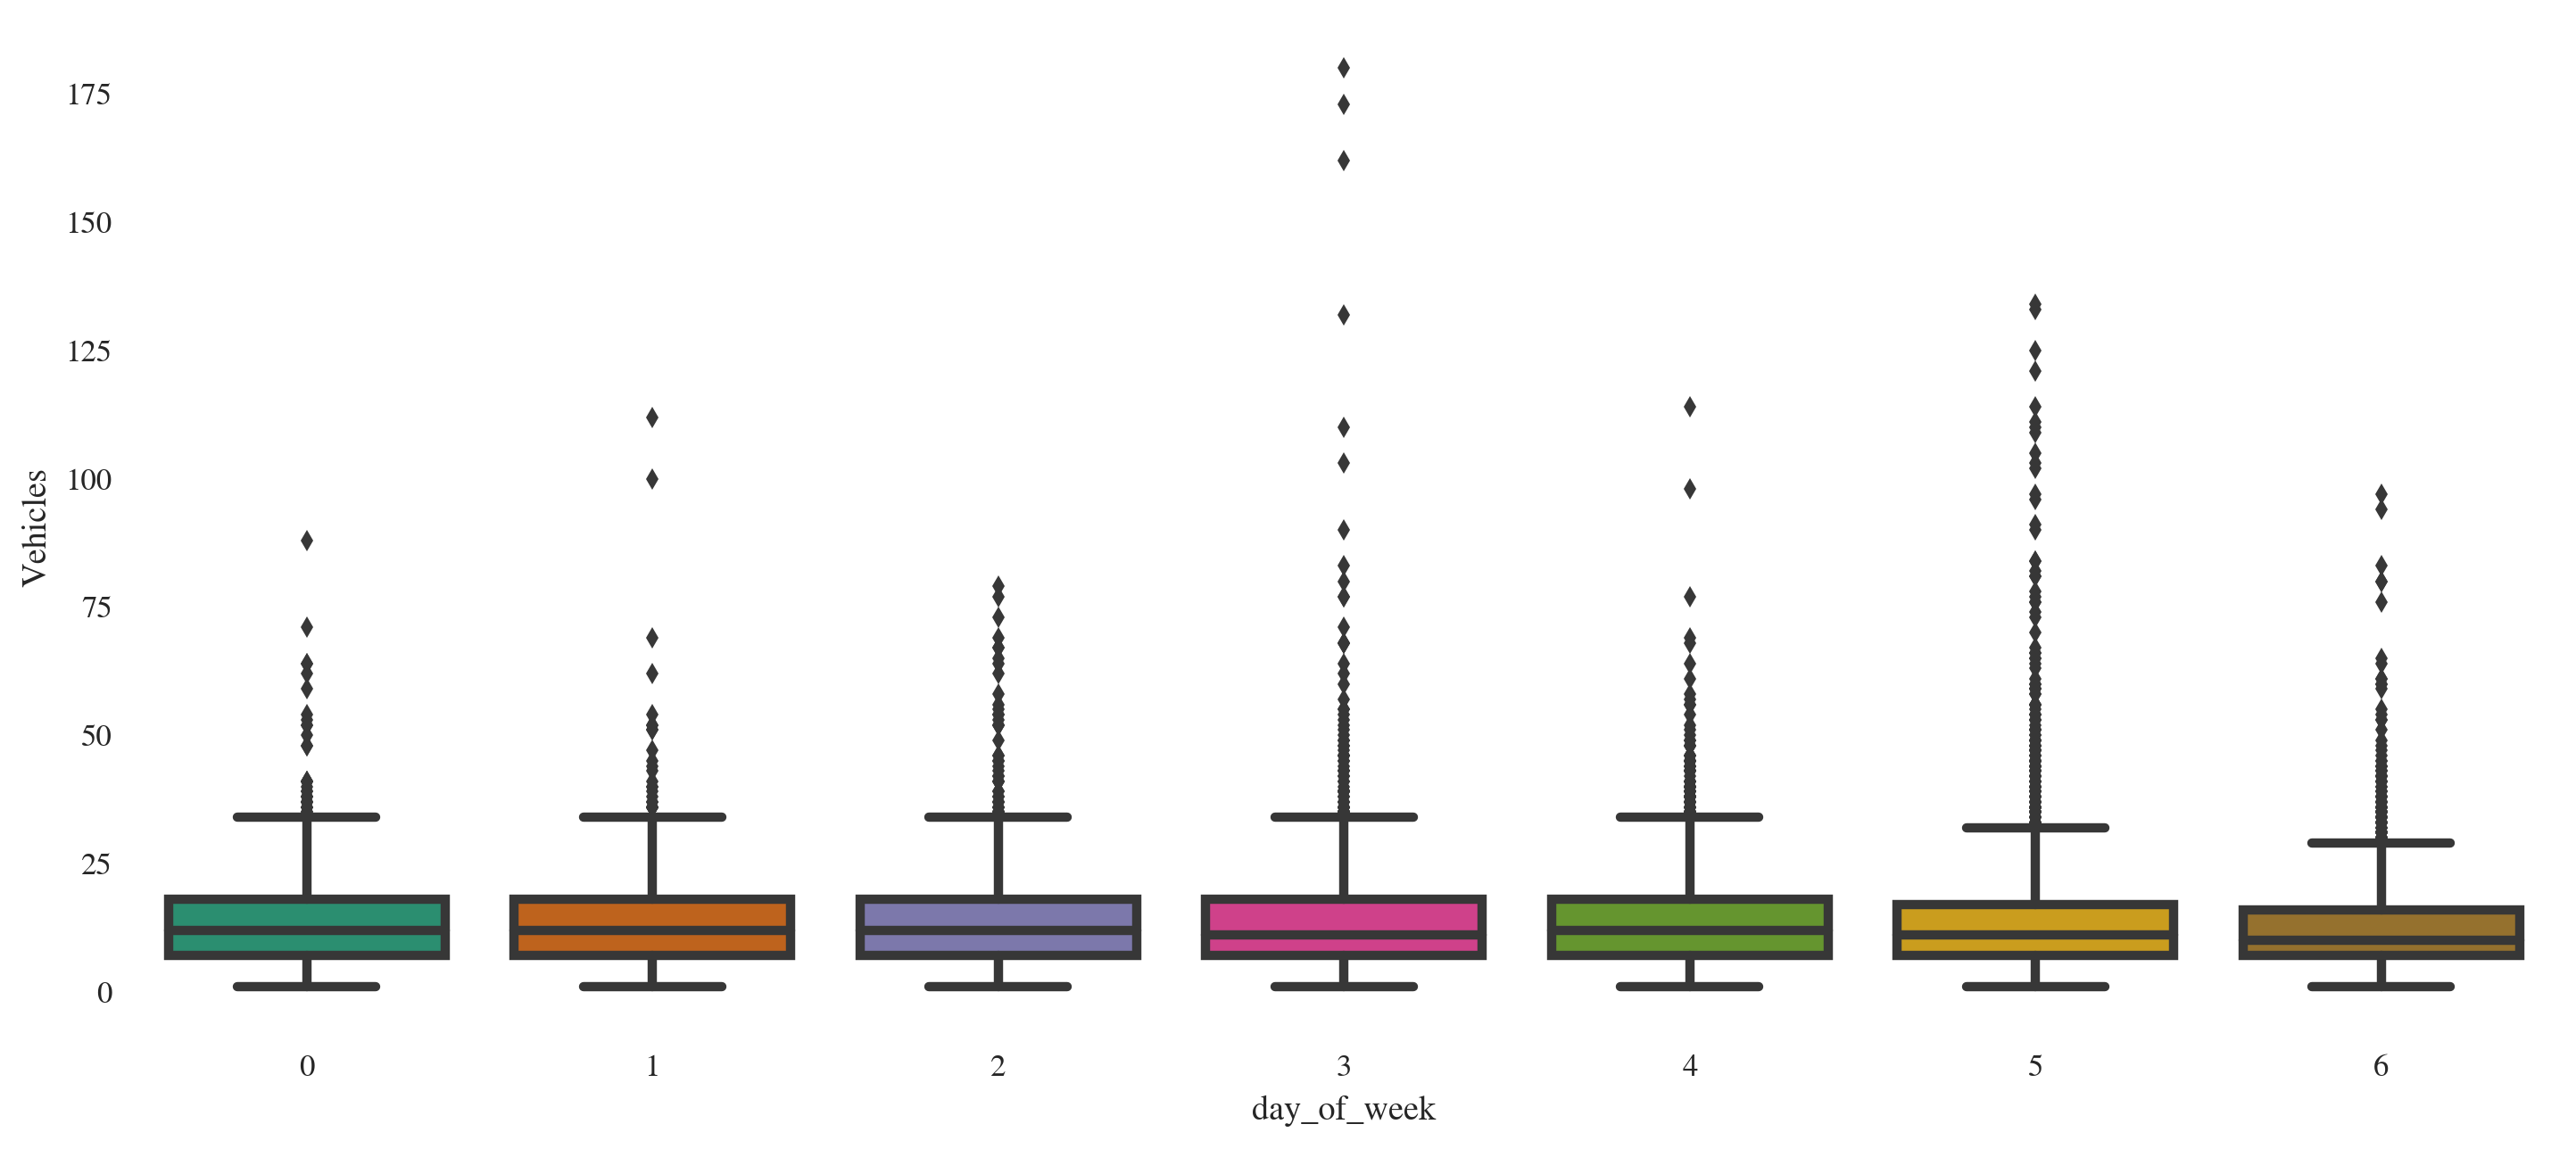

In [97]:
sns.boxplot(train3['day_of_week'],train3['Vehicles'])

In [99]:
del train3['Date']
del test3['Date']

In [100]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( train3.drop(['DateTime','ID','Vehicles'],axis = 1),train3['Vehicles'], test_size=.3, random_state=100 )
lr.fit(Xtrain, Ytrain )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=1)

In [101]:
print ("Training :"+str((mean_squared_error( Ytrain, lr.predict(Xtrain)))**.5))
print ("Test :"+str(mean_squared_error( Ytest, lr.predict(Xtest))**.5))

Training :8.87318254404
Test :8.78973839883


In [107]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(objective='reg:linear', silent=False,n_estimators=400,max_depth = 4)
xgb.fit(Xtrain, Ytrain )
print ("Training :"+str((mean_squared_error( Ytrain, xgb.predict(Xtrain)))**.5))
print ("Test :"+str(mean_squared_error( Ytest, xgb.predict(Xtest))**.5))

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

Training :4.66447859809
Test :6.26624237303


In [108]:
test3 = test3.drop(['DateTime','ID'],axis = 1)

In [109]:
test3['Vehicles'] = xgb.predict(test3)

In [144]:
train2 = pd.read_csv("Junc/junc2tr.csv", parse_dates=True)
test2 = pd.read_csv("Junc/junc2te.csv", parse_dates=True)

In [145]:
train2['Date'] = pd.to_datetime(train2['DateTime'])
test2['Date'] = pd.to_datetime(test2['DateTime'])
train2['Tarikh'] = train2['Date'].dt.day
train2['Month'] = train2['Date'].dt.month
train2['Hour'] = train2['Date'].dt.hour
train2["day_of_week"] = train2["Date"].dt.weekday
train2["Woy"] = train2["Date"].dt.weekofyear
test2['Tarikh'] = test2['Date'].dt.day
test2['Month'] = test2['Date'].dt.month
test2['Hour'] = test2['Date'].dt.hour
test2["day_of_week"] = test2["Date"].dt.weekday
test2["Woy"] = test2["Date"].dt.weekofyear

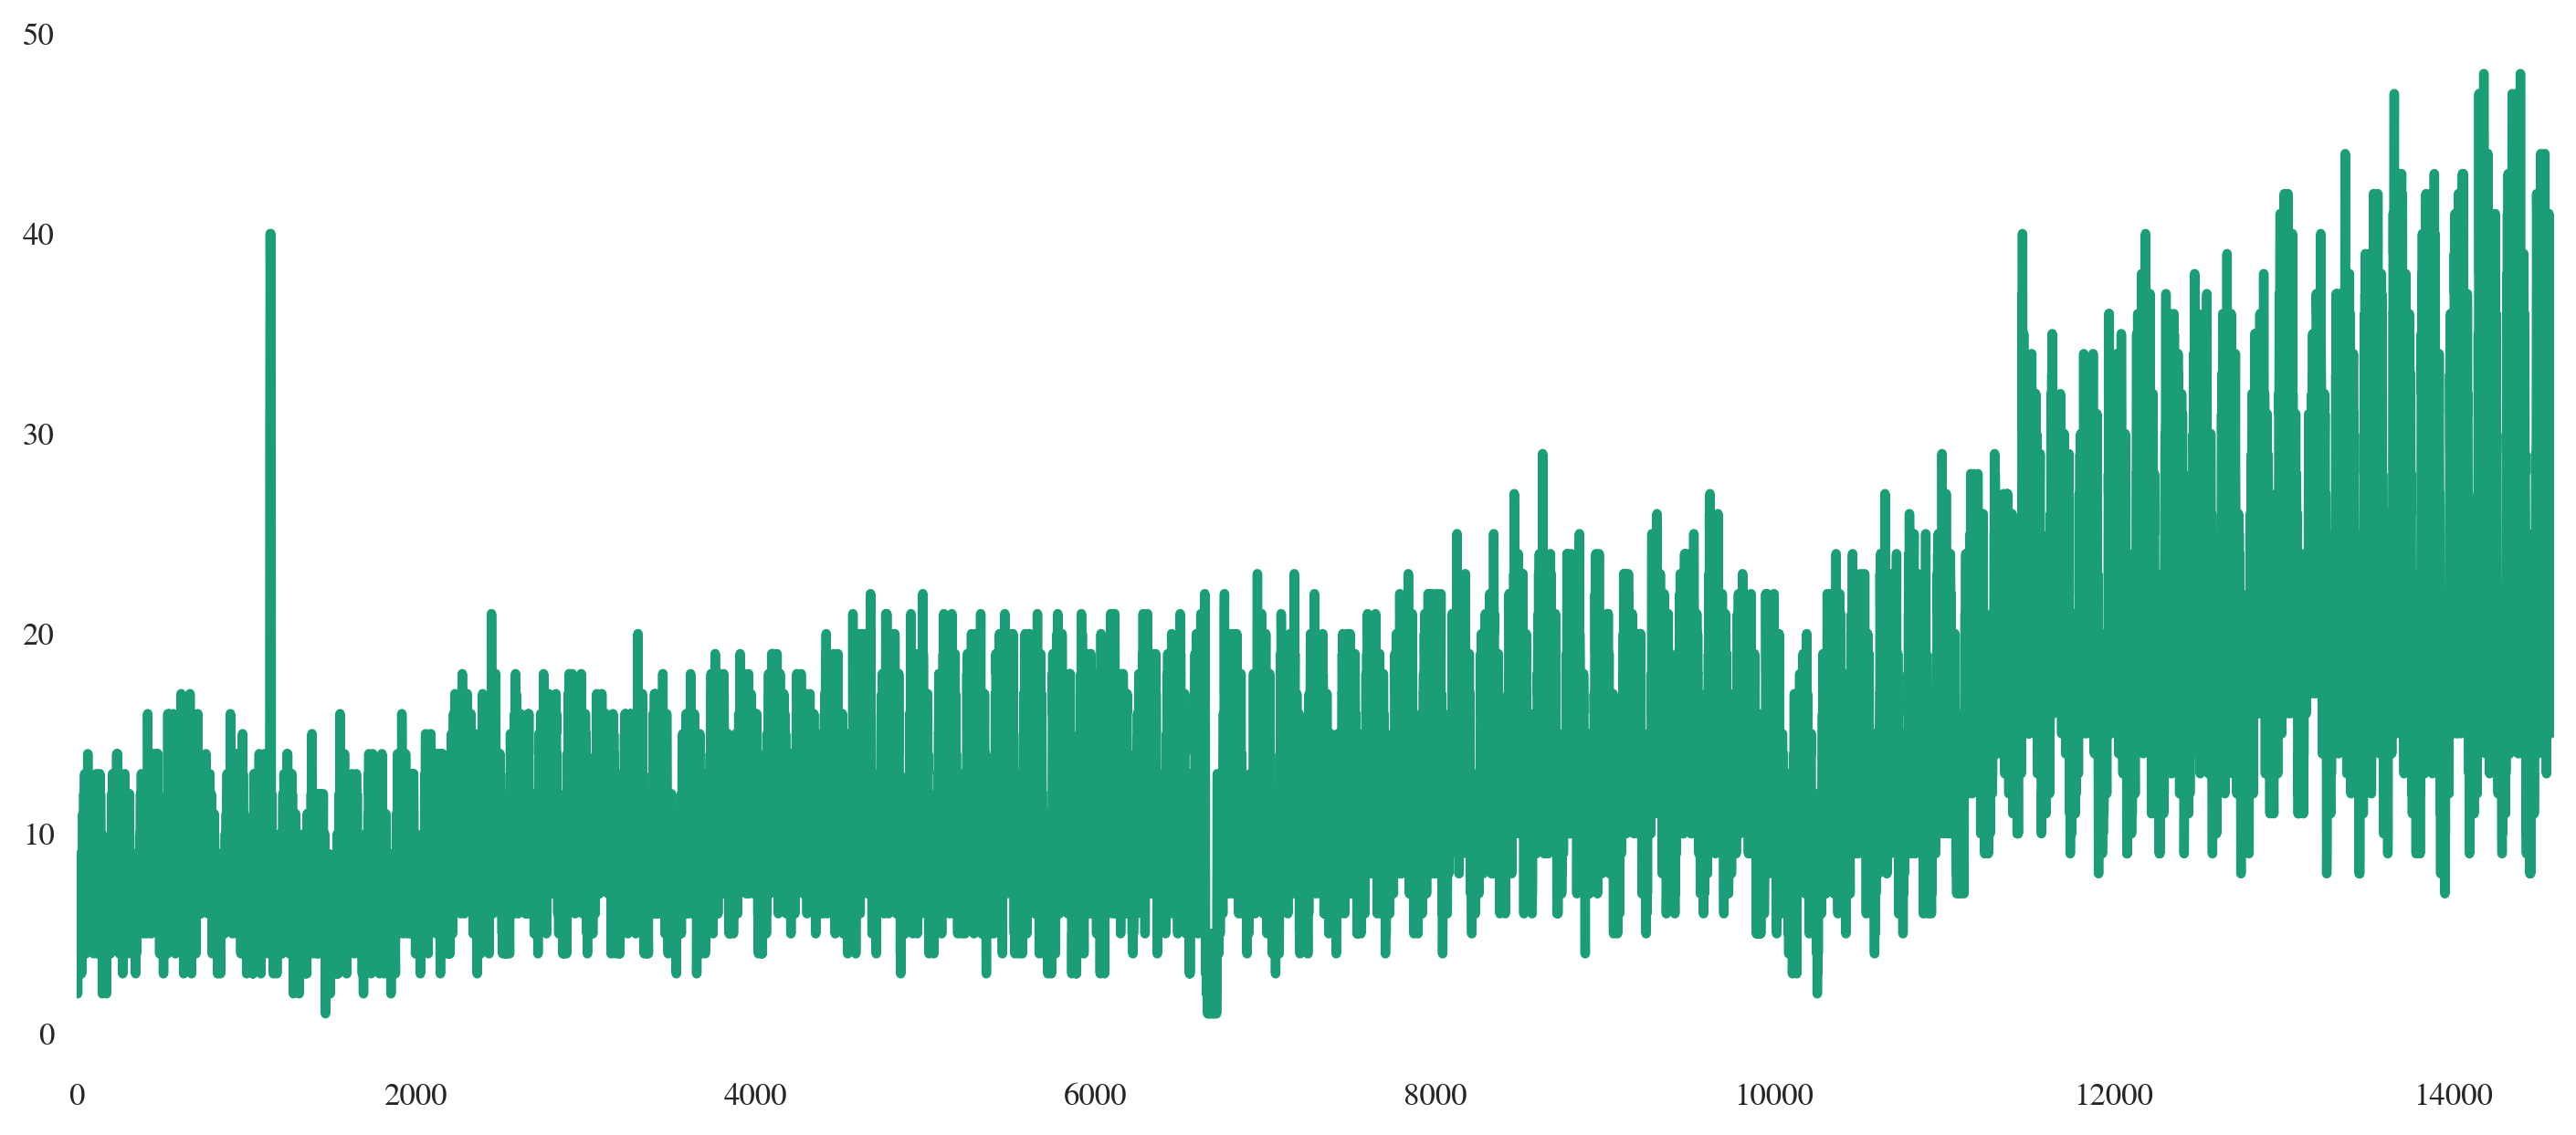

In [146]:
#Notice the sudden increasing linear trend - Why not train the data on that only?
sns.tsplot(train2['Vehicles'])
plt.show()

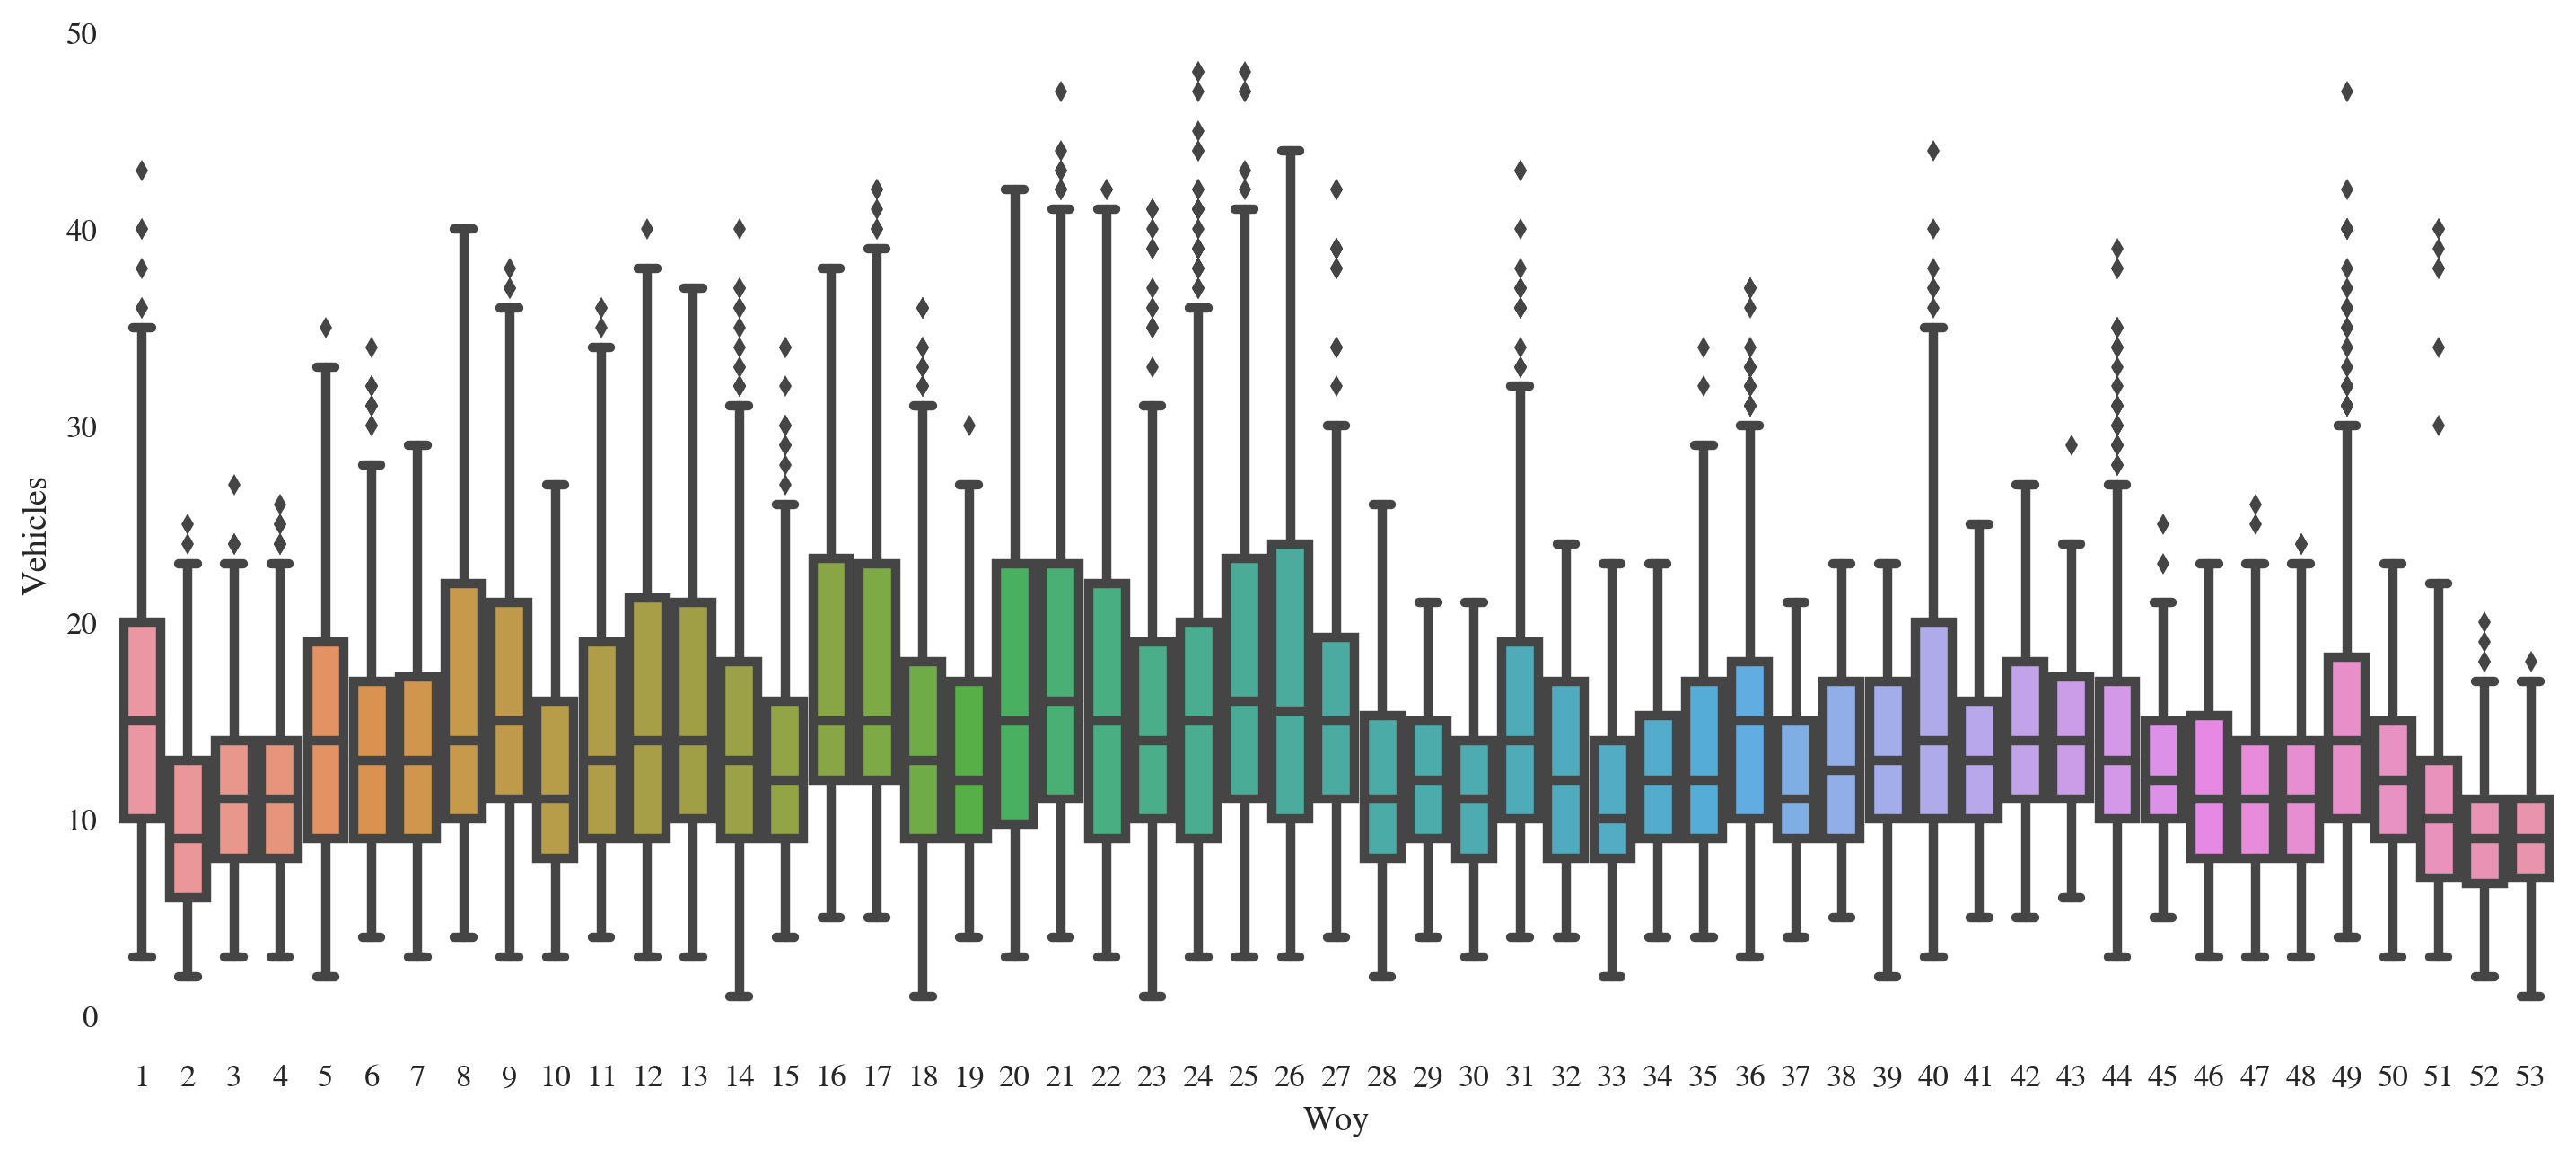

In [147]:
sns.boxplot(train2['Woy'],train2['Vehicles'])

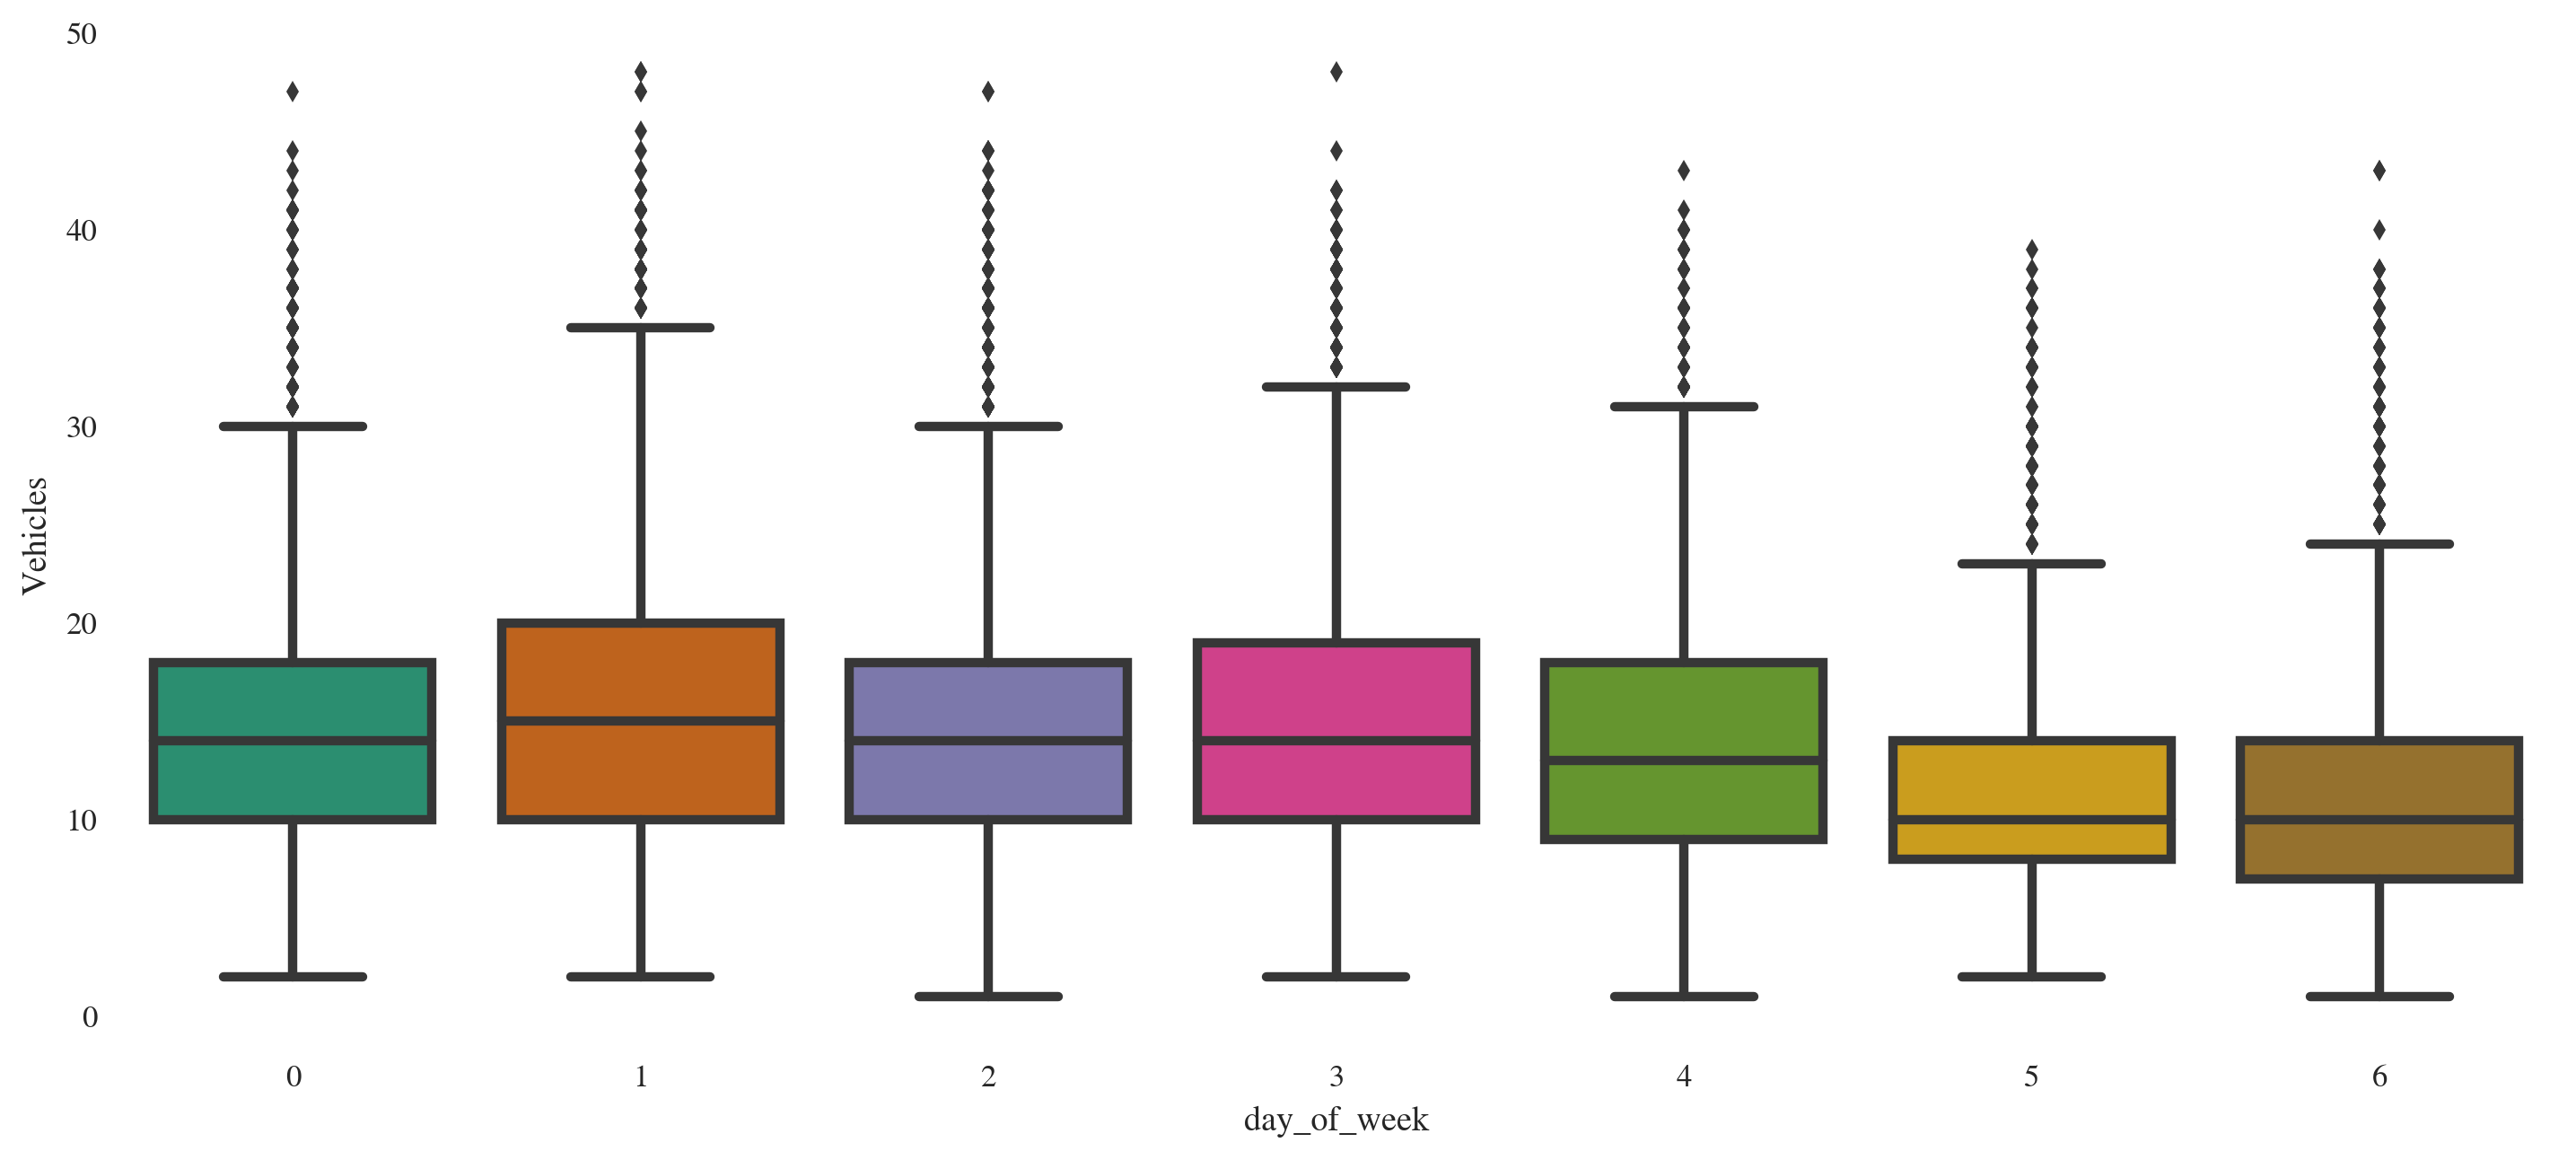

In [148]:
sns.boxplot(train2['day_of_week'],train2['Vehicles'])

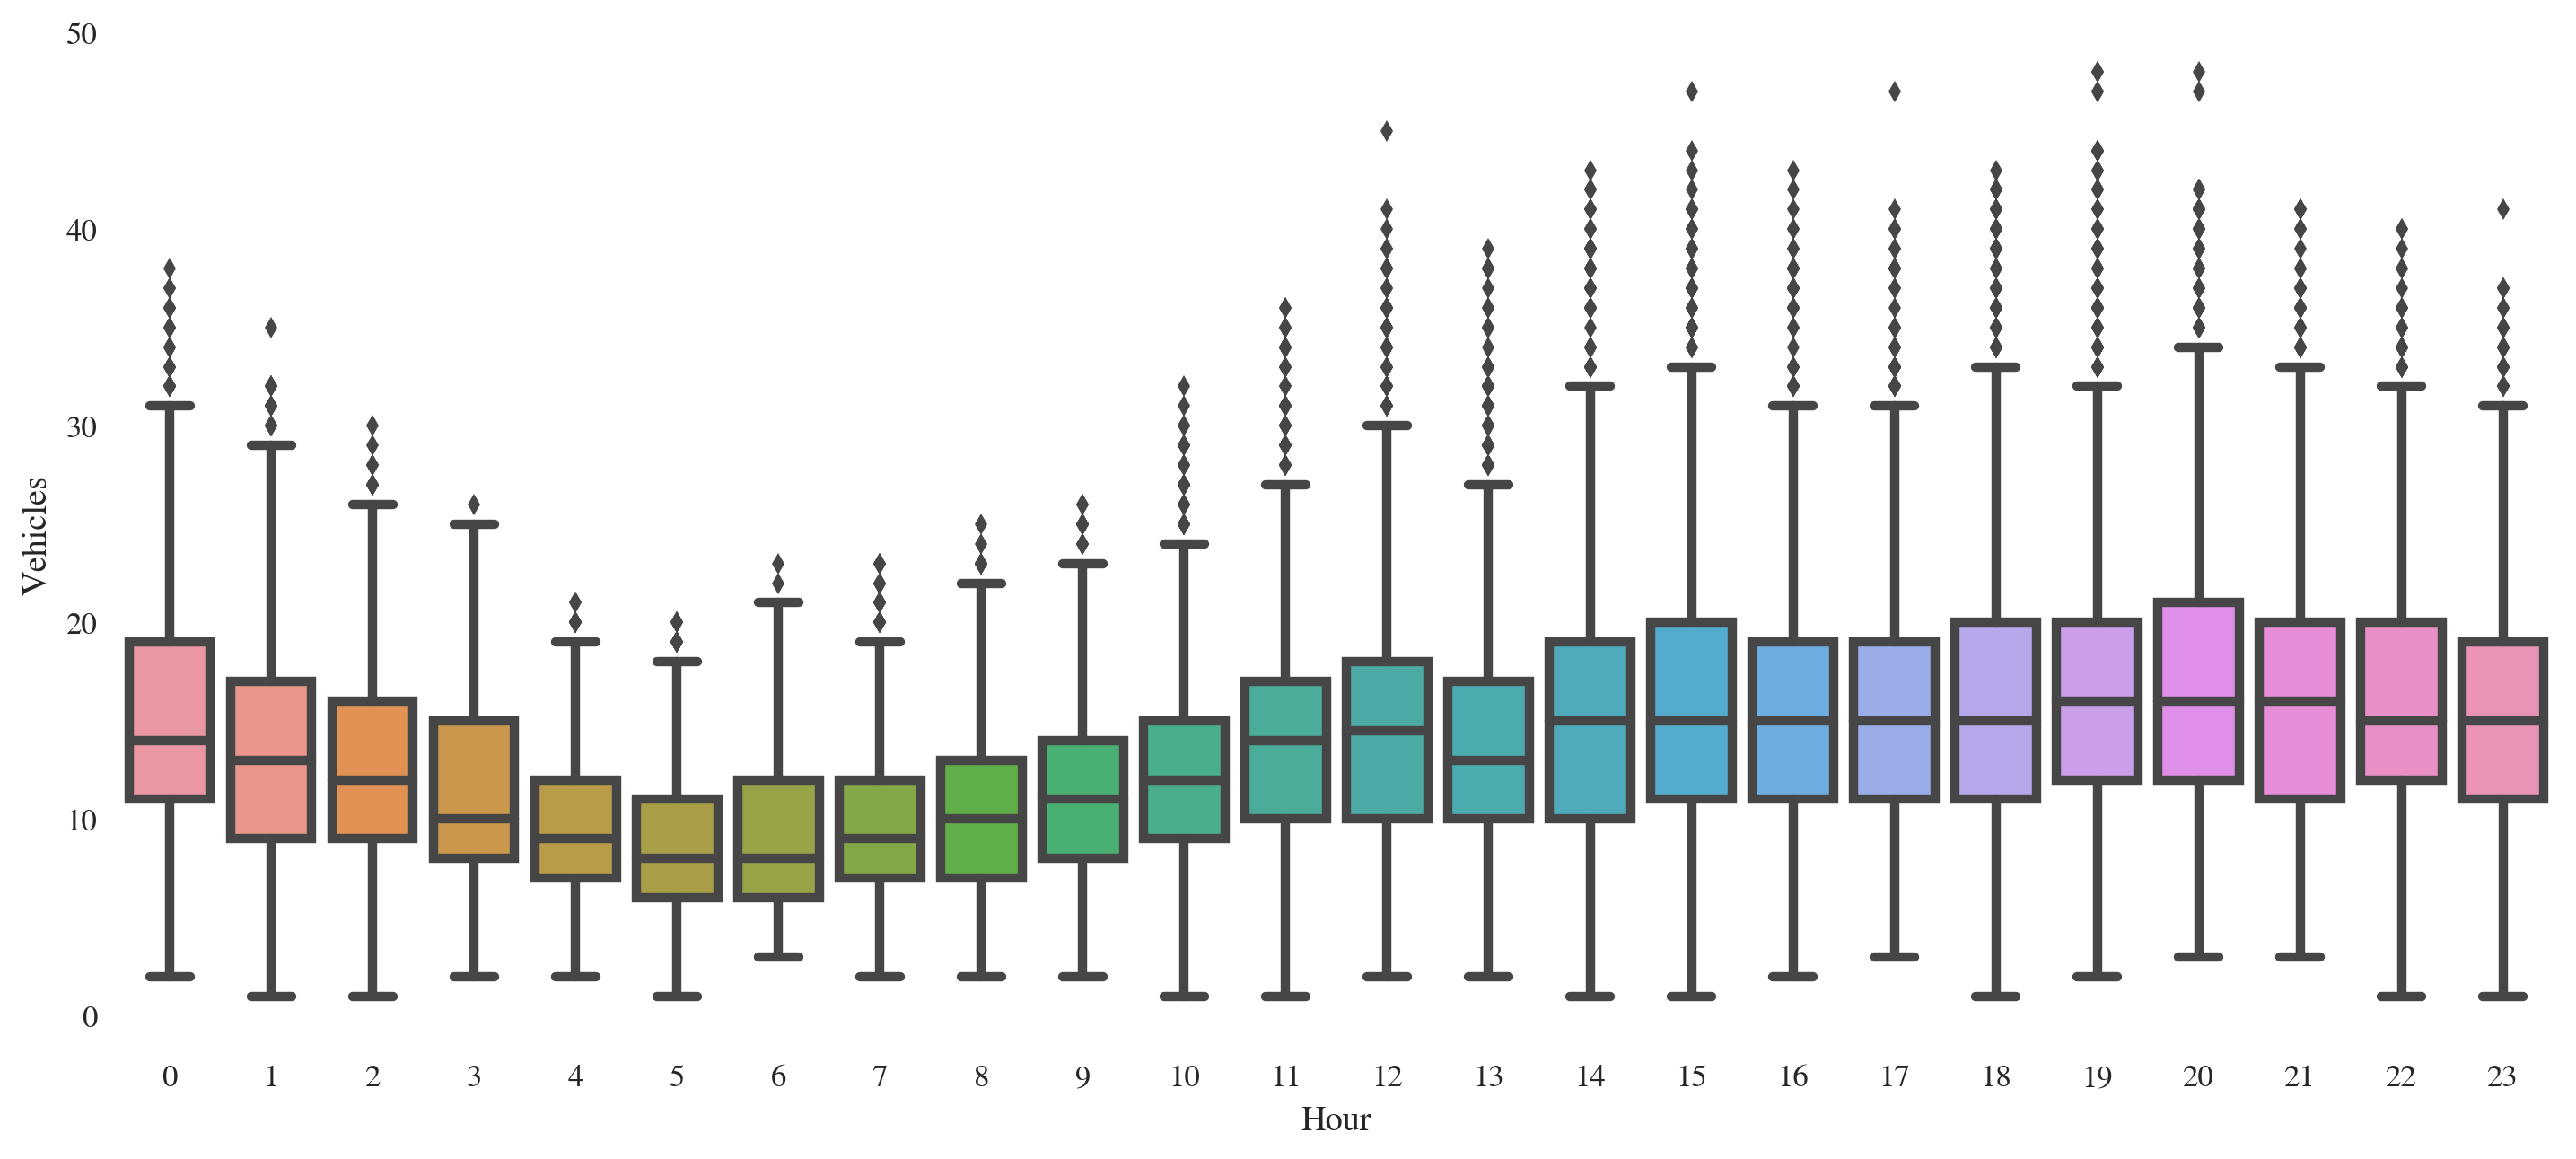

In [149]:
sns.boxplot(train2['Hour'],train2['Vehicles'])

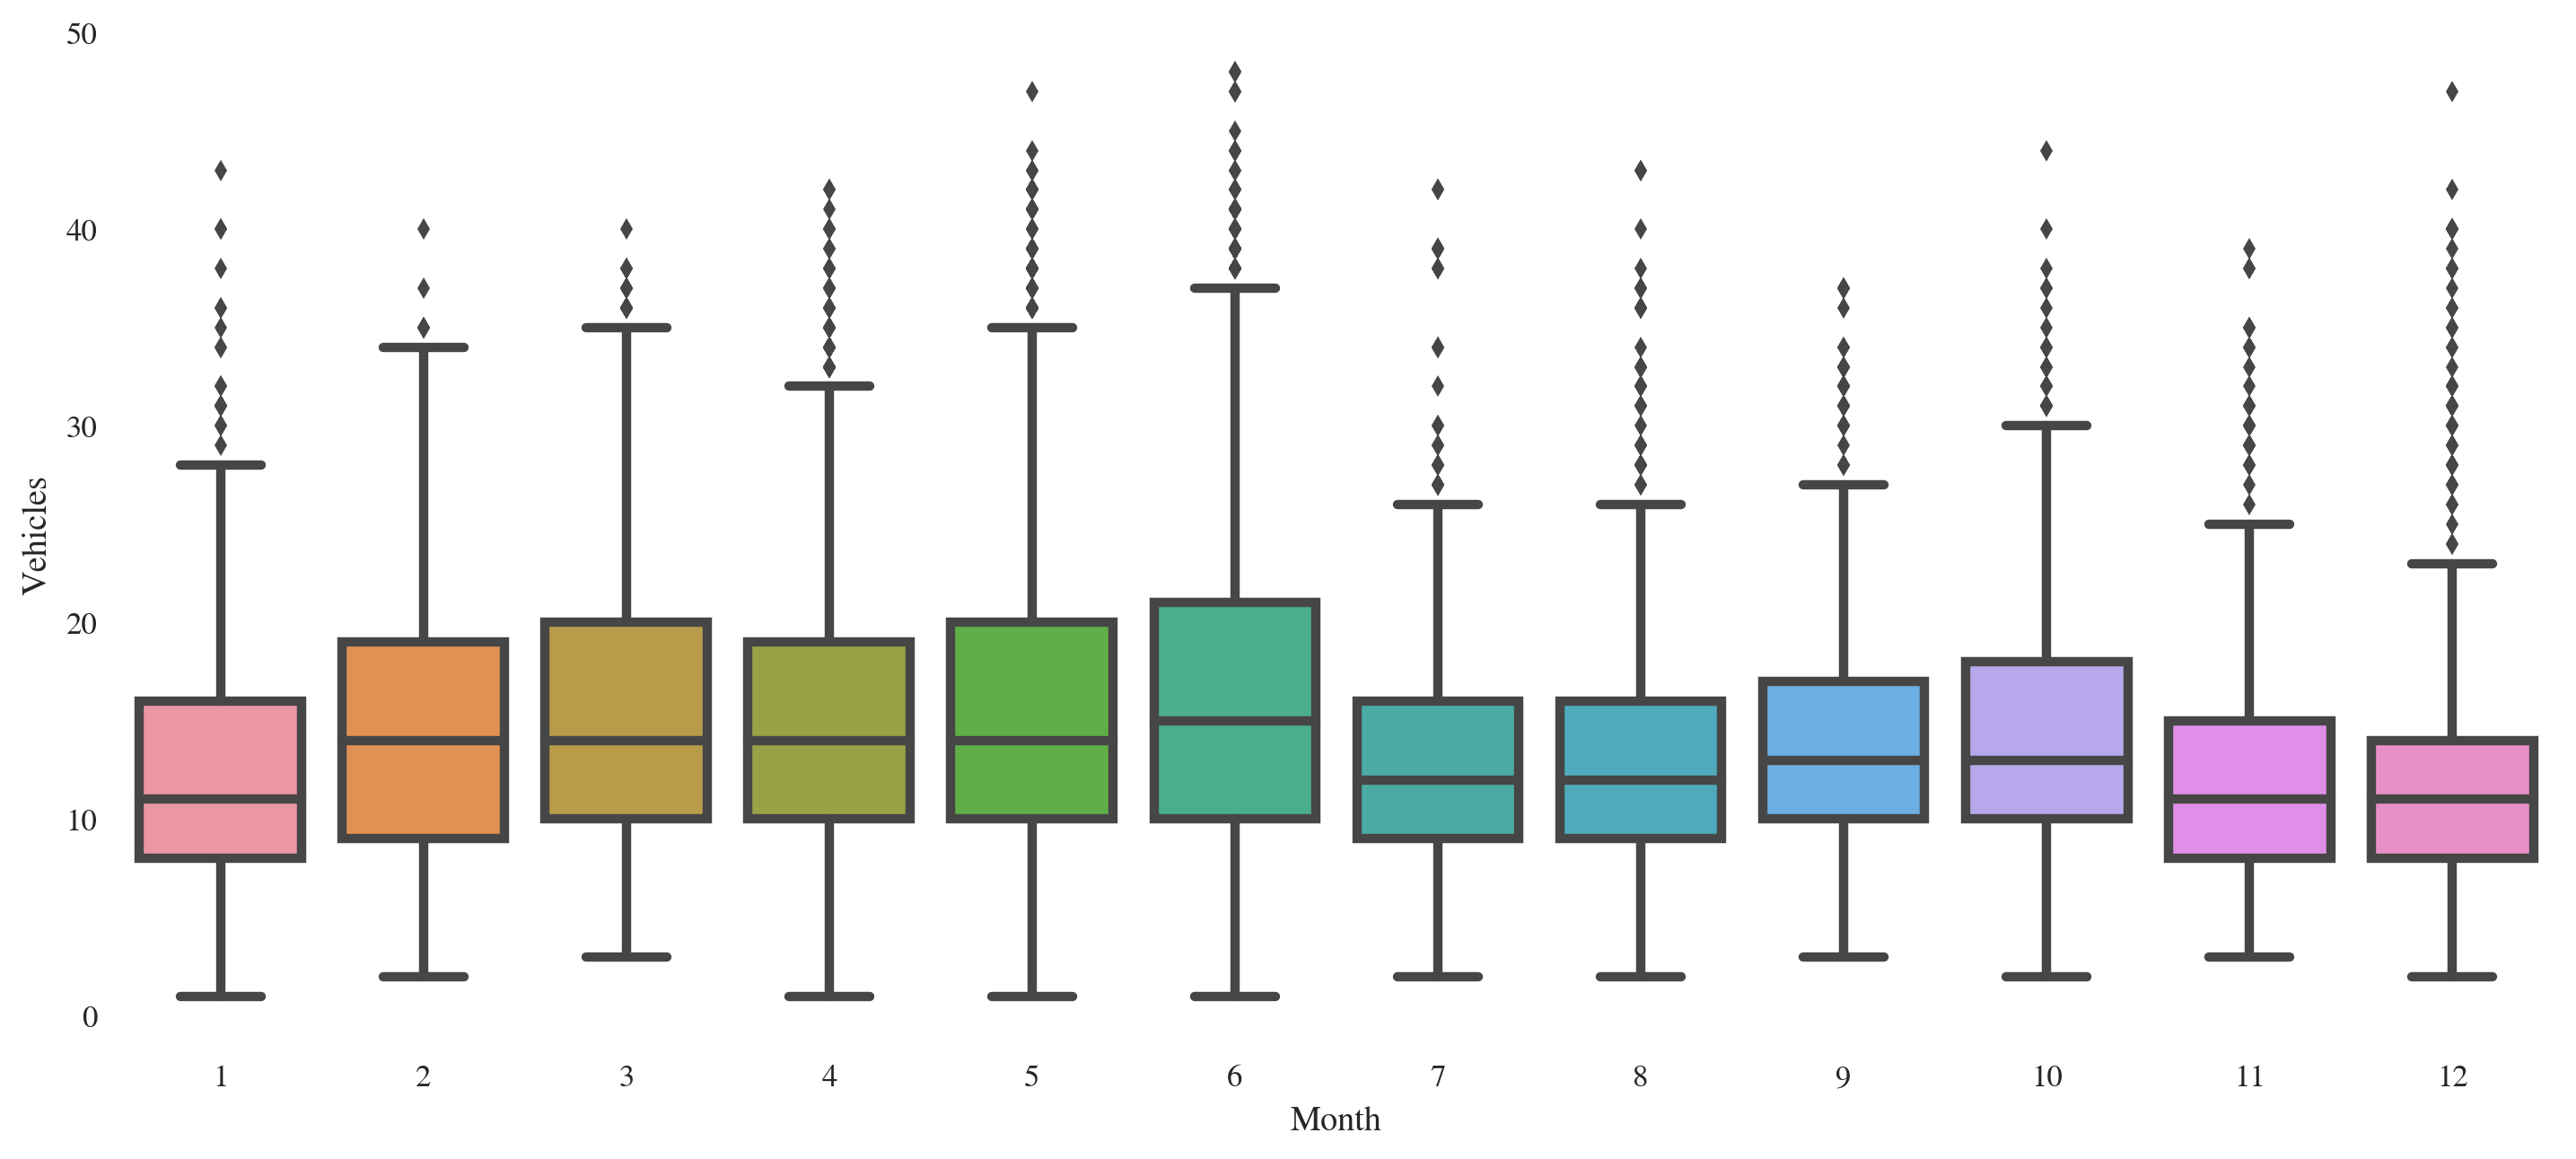

In [150]:
sns.boxplot(train2['Month'],train2['Vehicles'])

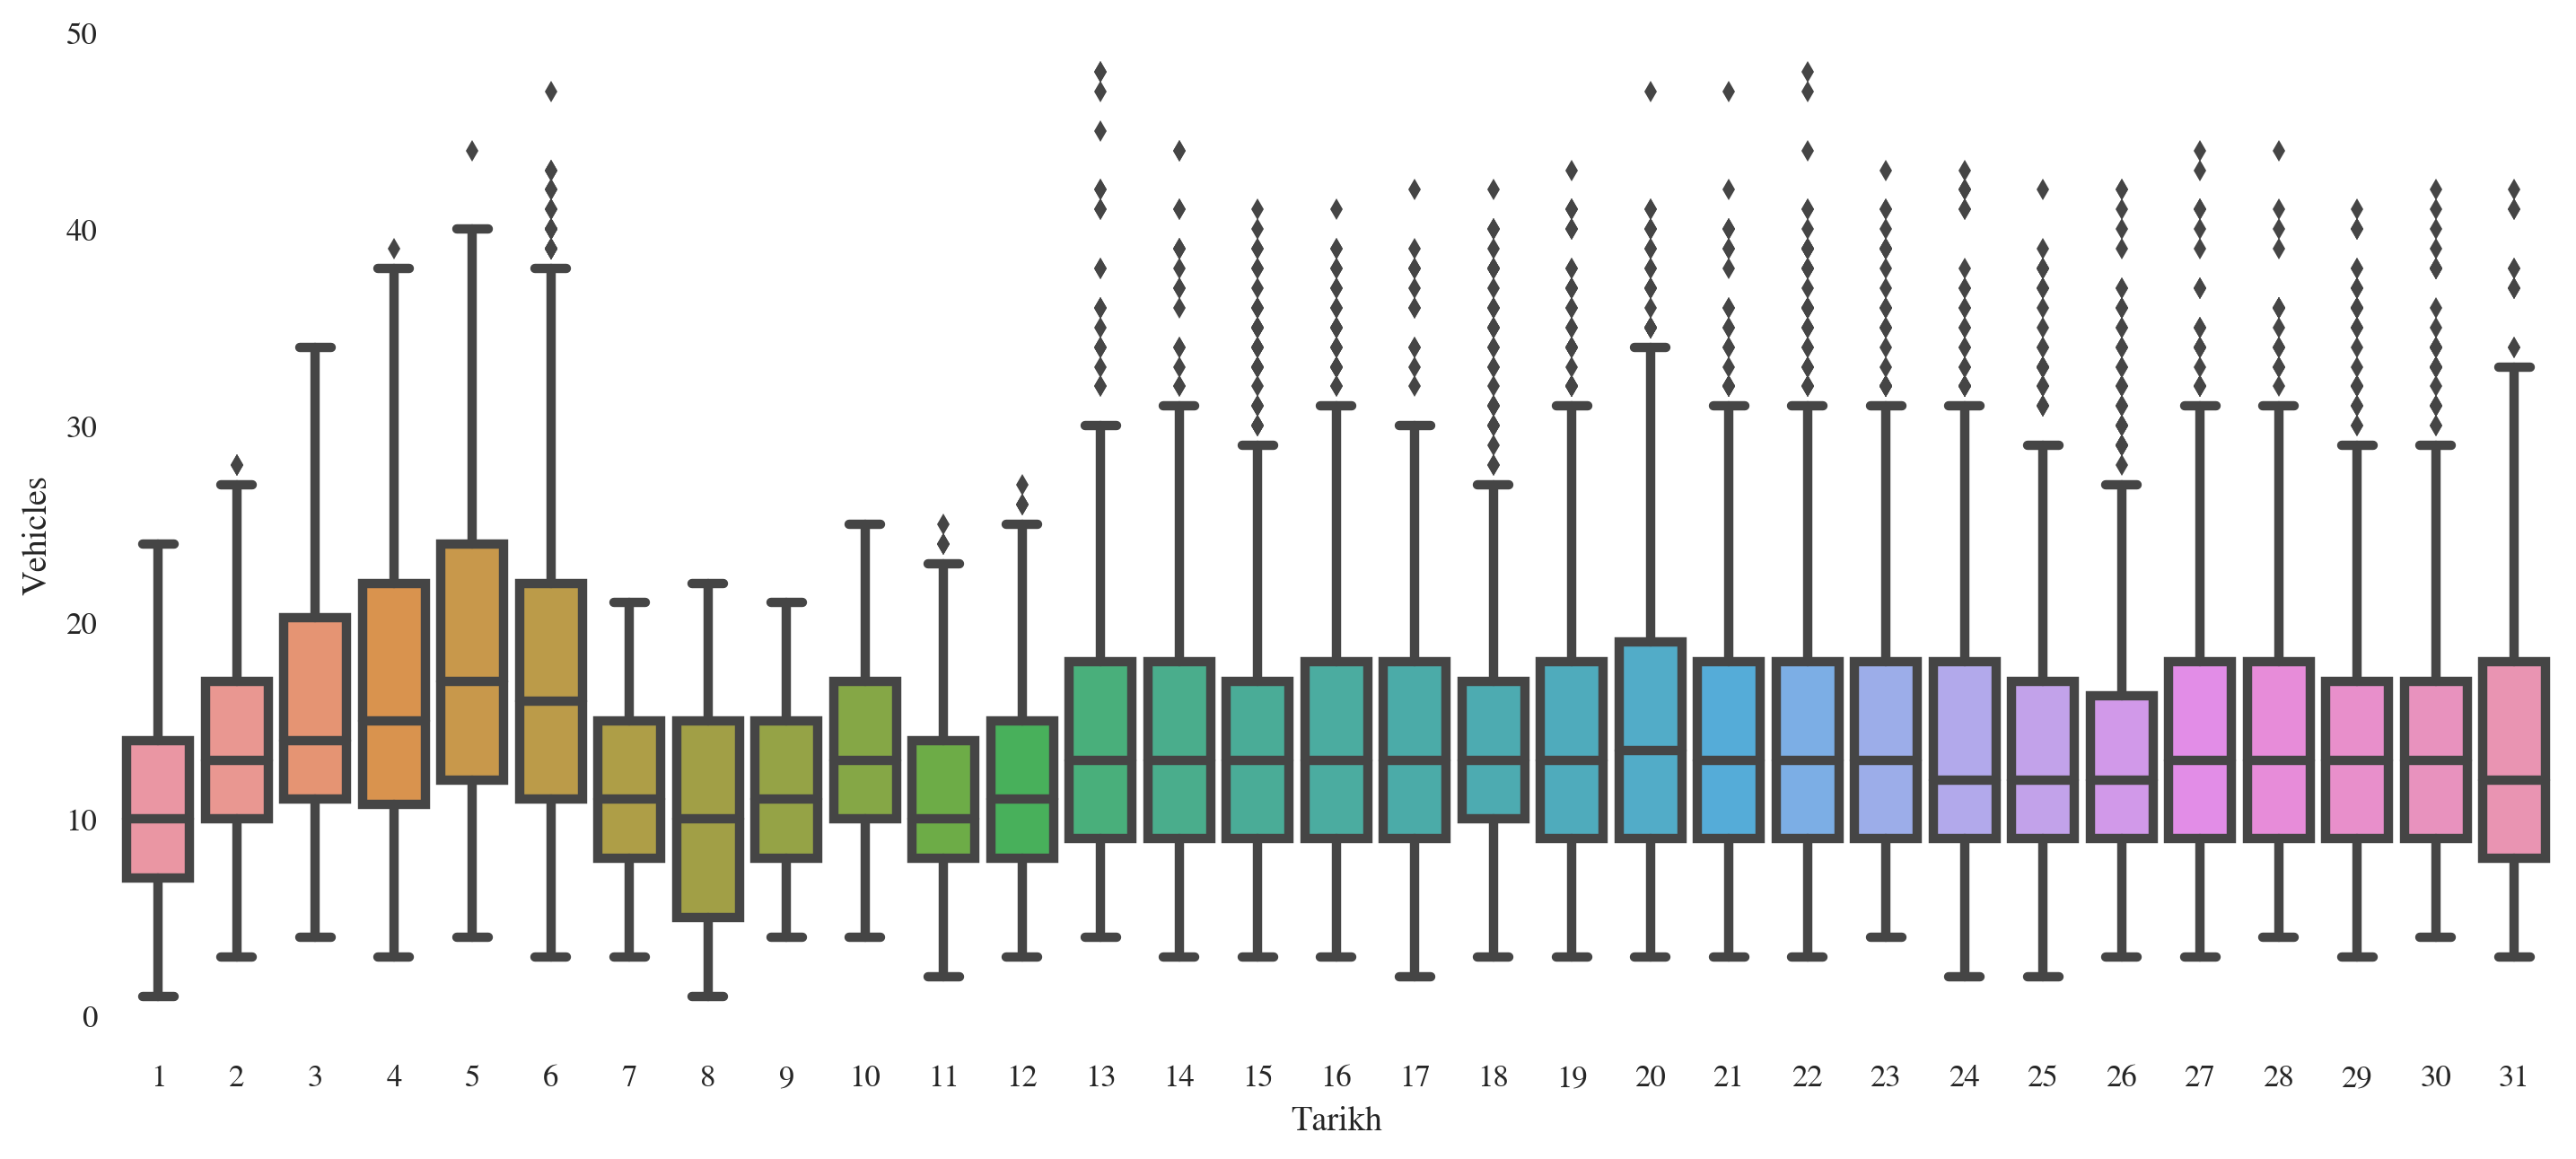

In [151]:
sns.boxplot(train2['Tarikh'],train2['Vehicles'])

In [152]:
train.head()

,DateTime,Hourst,Vehicles,ID,Tarikh,Month,Hour,day_of_week,Woy,Day_No
0,01-11-15 0:00,0,15,20151101001,11,1,0,6,2,41
1,01-11-15 1:00,1,13,20151101011,11,1,0,6,2,41
2,01-11-15 2:00,2,10,20151101021,11,1,0,6,2,41
3,01-11-15 3:00,3,7,20151101031,11,1,0,6,2,41
4,01-11-15 4:00,4,9,20151101041,11,1,0,6,2,41


In [153]:
def Tarikh_buckets(df):
    df.ix[((df['Tarikh'] >= 13) & (df['Tarikh'] <= 26)), 'Tarikh'] = 0
    df.ix[((df['Tarikh'] >= 7) & (df['Tarikh']<=12)), 'Tarikh'] = 1
    df.ix[((((df['Tarikh'] >= 2) & (df['Tarikh']<=6)))), 'Tarikh'] = 2
    df.ix[(df['Tarikh'] == 0) , 'Tarikh'] = 1
    return df 
train2 = Tarikh_buckets(train2)
test2 = Tarikh_buckets(test2)

In [154]:
train2['Tarikh'].value_counts()

1     9600
2     2880
28     480
27     480
29     456
30     432
31     264
Name: Tarikh, dtype: int64

In [155]:
def Hour_buckets(df):
    df.ix[((df['Hour'] > 0) & (df['Hour'] <= 9)), 'Hour'] = 0
    df.ix[((((df['Hour'] > 9) & (df['Hour']<=23)))), 'Hour'] = 1
    return df 
train2 = Hour_buckets(train2)
test2 = Hour_buckets(test2)

In [157]:
del train2['Date']
del test2['Date']

In [159]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( train2.drop(['DateTime','ID','Vehicles'],axis = 1),train2['Vehicles'], test_size=.3, random_state=100 )
lr.fit(Xtrain, Ytrain )
print ("Training :"+str((mean_squared_error( Ytrain, lr.predict(Xtrain)))**.5))
print ("Test :"+str(mean_squared_error( Ytest, lr.predict(Xtest))**.5))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=1)

Training :4.84039993789
Test :4.9058423824


In [160]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(objective='reg:linear', silent=False,n_estimators=400,max_depth = 4)
xgb.fit(Xtrain, Ytrain )
print ("Training :"+str((mean_squared_error( Ytrain, xgb.predict(Xtrain)))**.5))
print ("Test :"+str(mean_squared_error( Ytest, xgb.predict(Xtest))**.5))

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

Training :2.65895348788
Test :3.00102177356


In [164]:
train2a = train2.iloc[9000:,:]

In [165]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( train2a.drop(['DateTime','ID','Vehicles'],axis = 1),train2a['Vehicles'], test_size=.3, random_state=100 )
lr.fit(Xtrain, Ytrain )
print ("Training :"+str((mean_squared_error( Ytrain, lr.predict(Xtrain)))**.5))
print ("Test :"+str(mean_squared_error( Ytest, lr.predict(Xtest))**.5))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=1)

Training :5.75889207482
Test :5.70742252052


In [166]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(objective='reg:linear', silent=False,n_estimators=400,max_depth = 4)
xgb.fit(Xtrain, Ytrain )
print ("Training :"+str((mean_squared_error( Ytrain, xgb.predict(Xtrain)))**.5))
print ("Test :"+str(mean_squared_error( Ytest, xgb.predict(Xtest))**.5))

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

Training :2.81253533861
Test :3.40022772106


In [168]:
#So taking the whole data makes sense 
Xtrain, Xtest, Ytrain, Ytest = train_test_split( train2.drop(['DateTime','ID','Vehicles'],axis = 1),train2['Vehicles'], test_size=.3, random_state=100 )
lr.fit(Xtrain, Ytrain )
print ("Training :"+str((mean_squared_error( Ytrain, lr.predict(Xtrain)))**.5))
print ("Test :"+str(mean_squared_error( Ytest, lr.predict(Xtest))**.5))
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(objective='reg:linear', silent=False,n_estimators=400,max_depth = 4)
xgb.fit(Xtrain, Ytrain )
print ("Training :"+str((mean_squared_error( Ytrain, xgb.predict(Xtrain)))**.5))
print ("Test :"+str(mean_squared_error( Ytest, xgb.predict(Xtest))**.5))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=1)

Training :4.84039993789
Test :4.9058423824


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

Training :2.65895348788
Test :3.00102177356


In [169]:
test2 = test2.drop(['DateTime','ID'],axis = 1)

In [173]:
test2['Hourstr '] = test2['Hourstr']
del test2['Hourstr']

In [175]:
test2 = test2[['Hourstr ', 'Tarikh', 'Month', 'Hour', 'day_of_week', 'Woy']]

In [176]:
test2['Vehicles'] = xgb.predict(test2)

In [177]:
train4 = pd.read_csv("Junc/junc4tr.csv", parse_dates=True)
test4 = pd.read_csv("Junc/junc4te.csv", parse_dates=True)

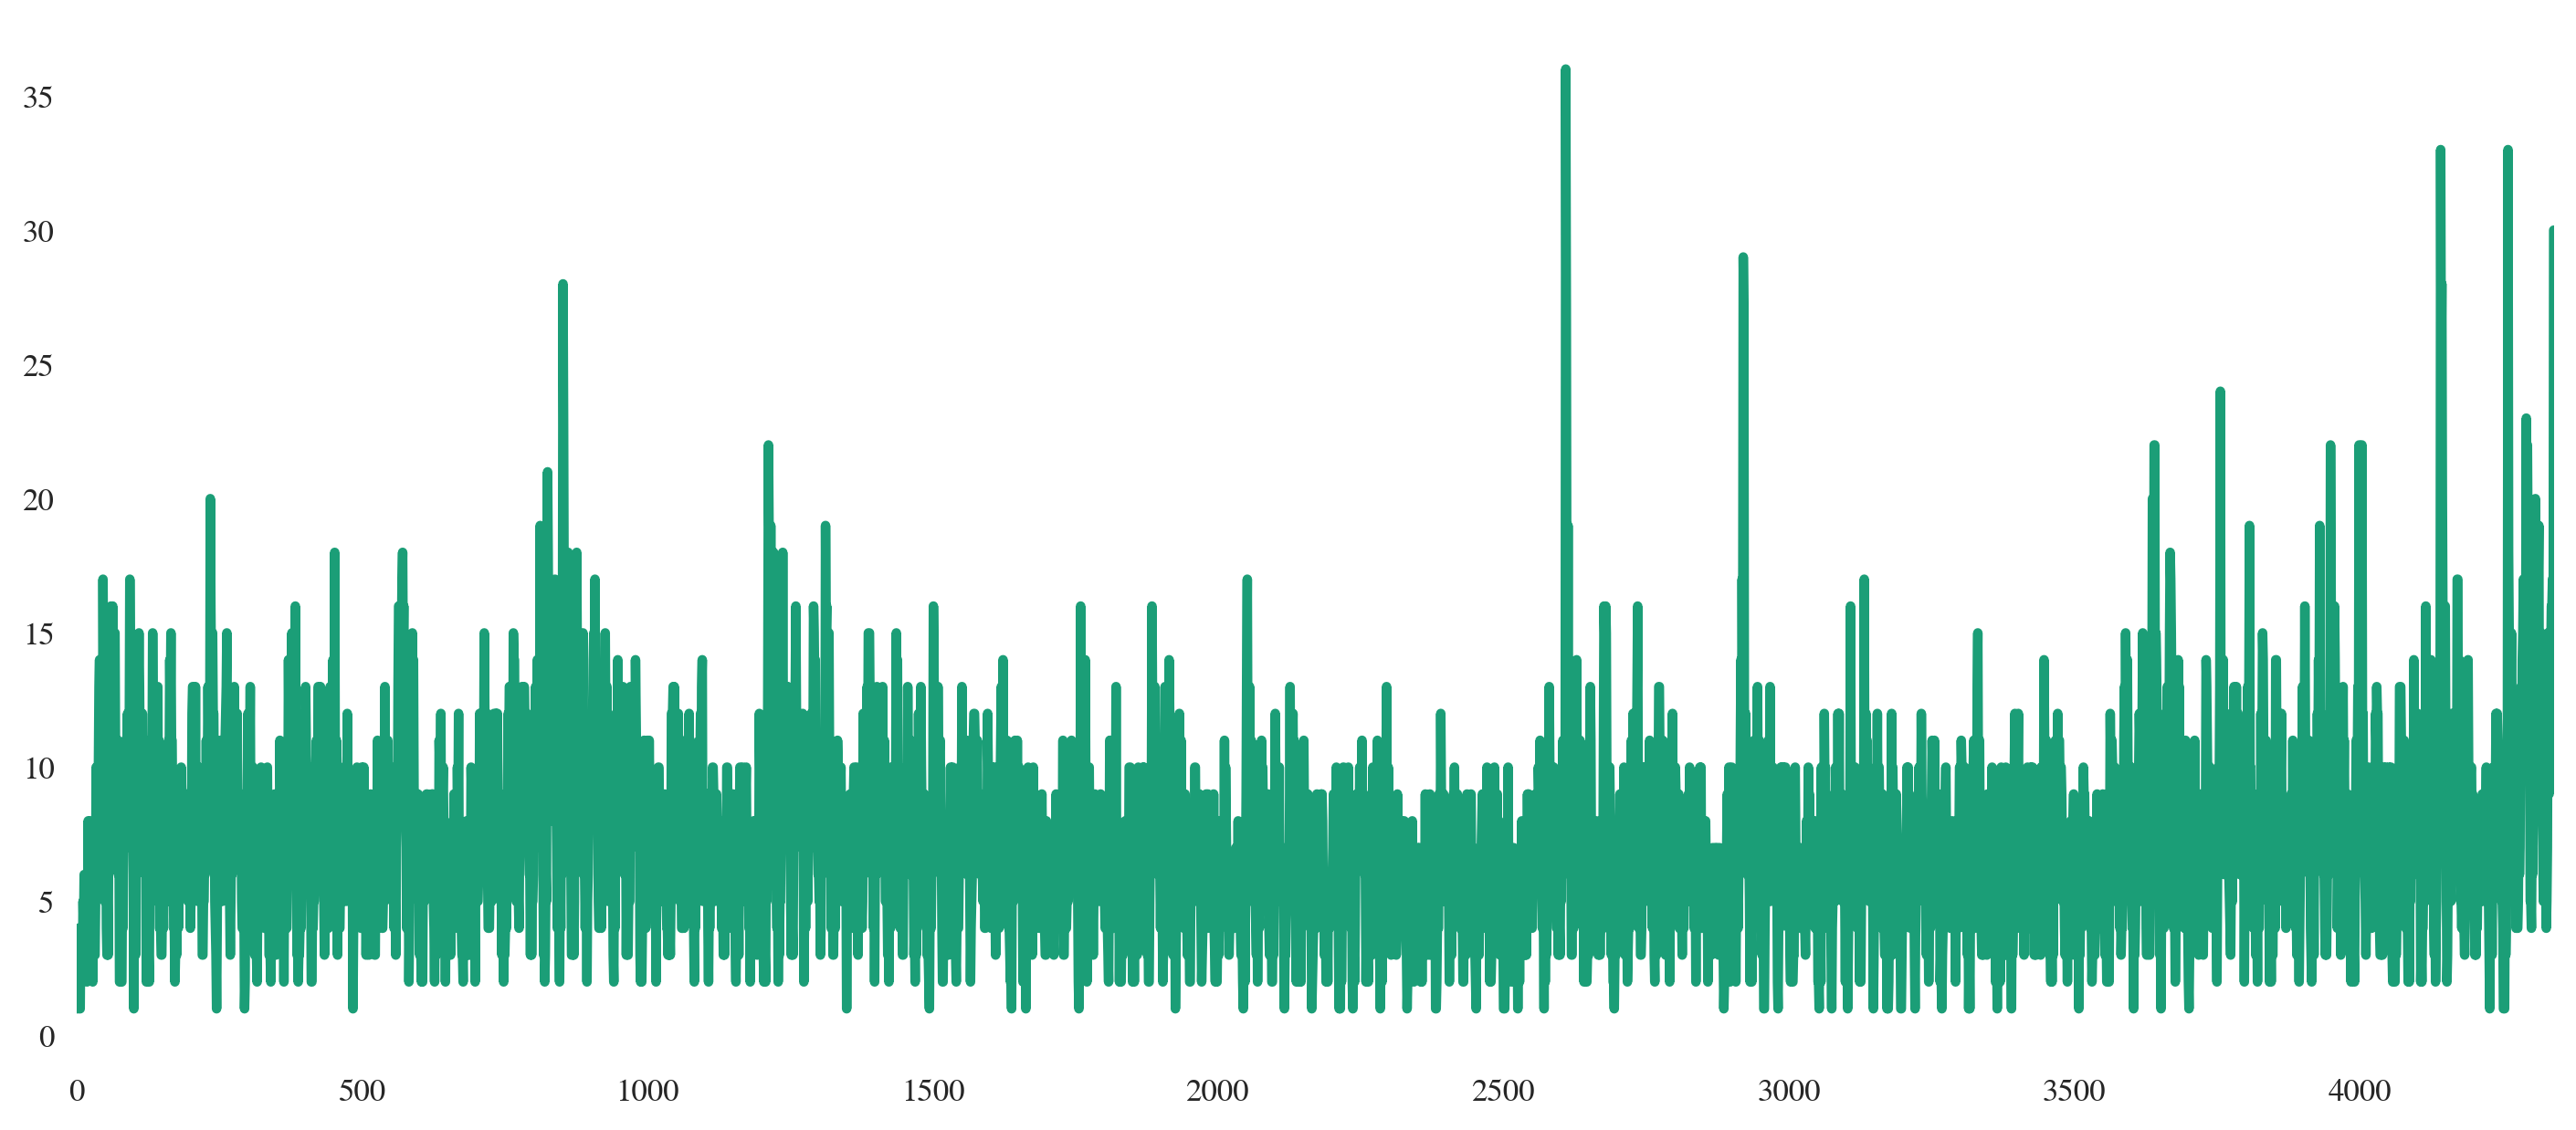

In [178]:
sns.tsplot(train4['Vehicles'])
plt.show()

In [179]:
train4['Date'] = pd.to_datetime(train4['DateTime'])
test4['Date'] = pd.to_datetime(test4['DateTime'])
train4['Tarikh'] = train4['Date'].dt.day
train4['Month'] = train4['Date'].dt.month
train4['Hour'] = train4['Date'].dt.hour
train4["day_of_week"] = train4["Date"].dt.weekday
train4["Woy"] = train4["Date"].dt.weekofyear
test4['Tarikh'] = test4['Date'].dt.day
test4['Month'] = test4['Date'].dt.month
test4['Hour'] = test4['Date'].dt.hour
test4["day_of_week"] = test4["Date"].dt.weekday
test4["Woy"] = test4["Date"].dt.weekofyear

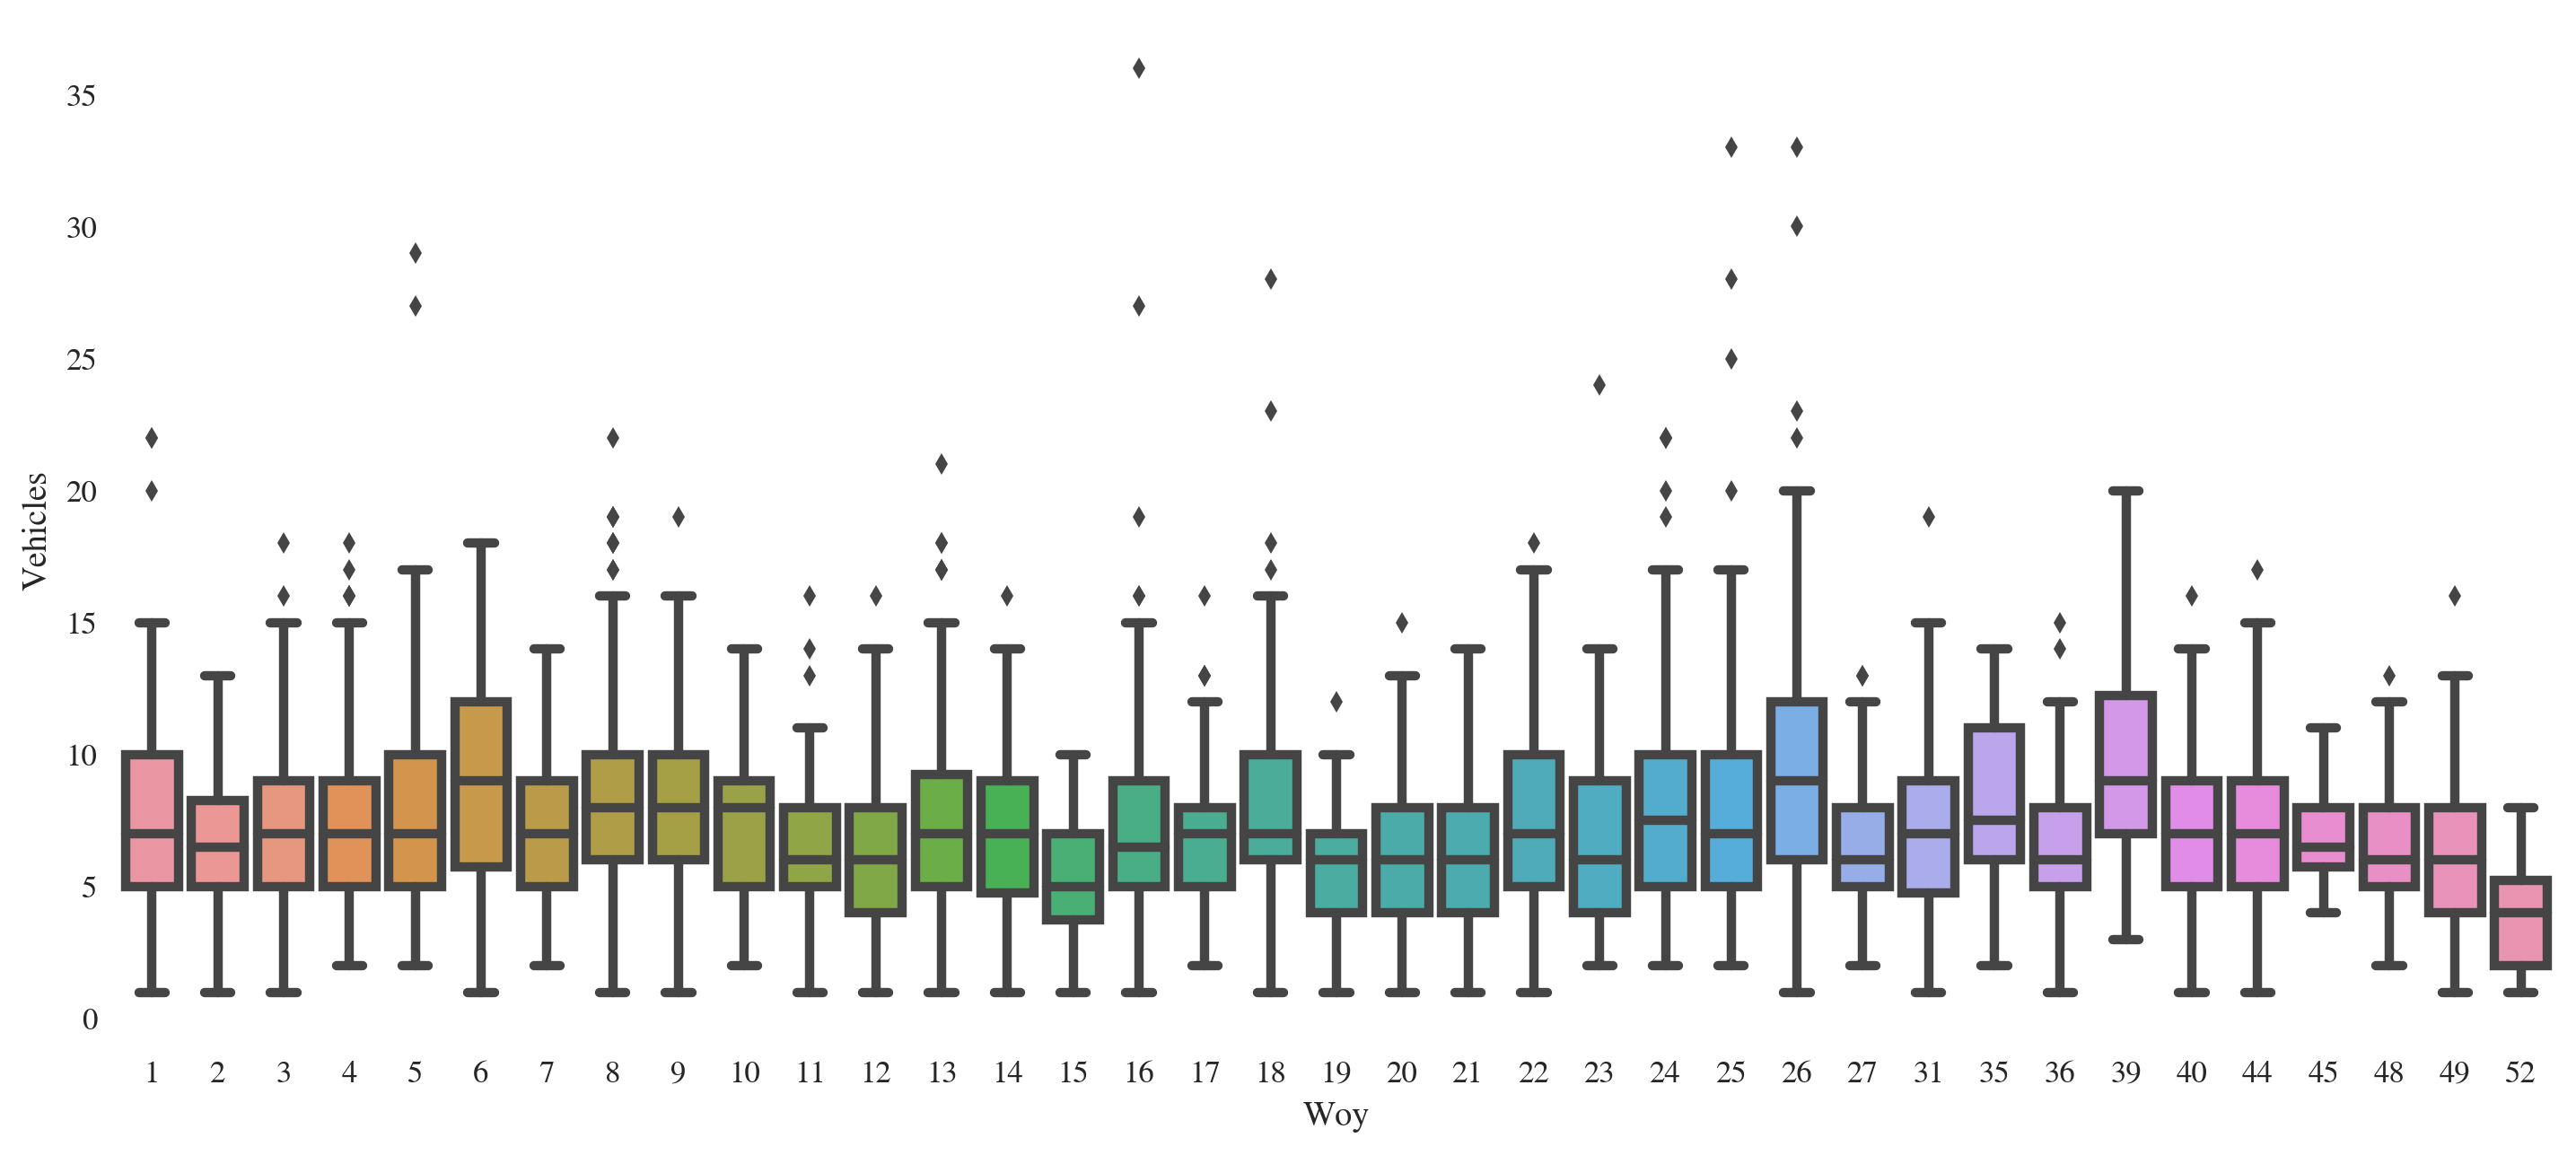

In [181]:
sns.boxplot(train4['Woy'],train4['Vehicles'])

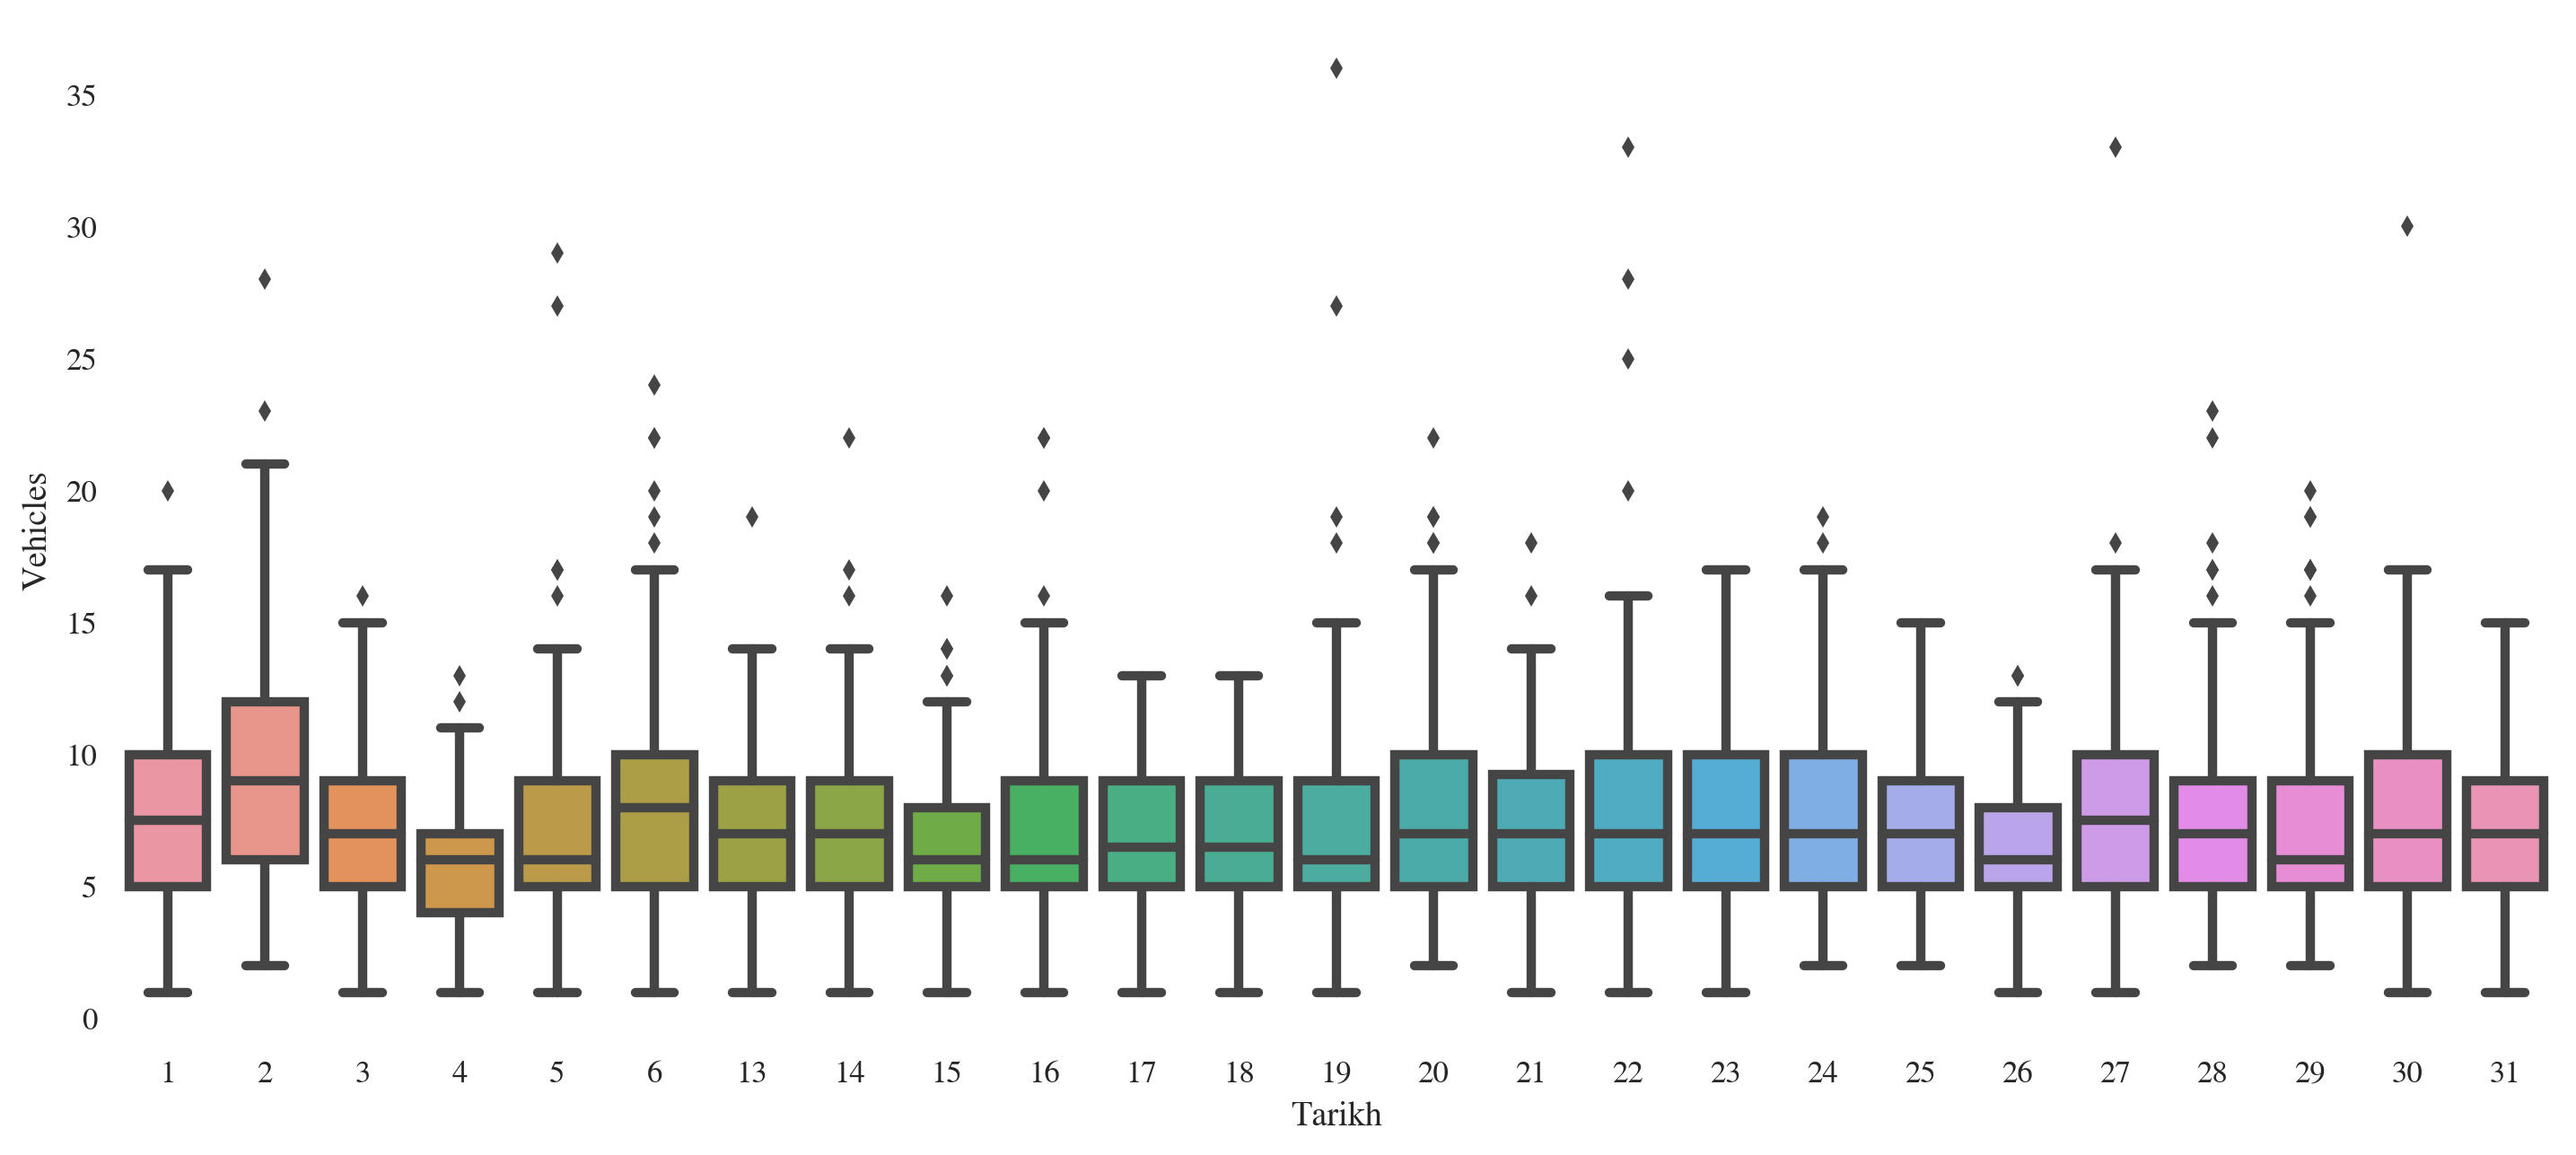

In [182]:
sns.boxplot(train4['Tarikh'],train4['Vehicles'])

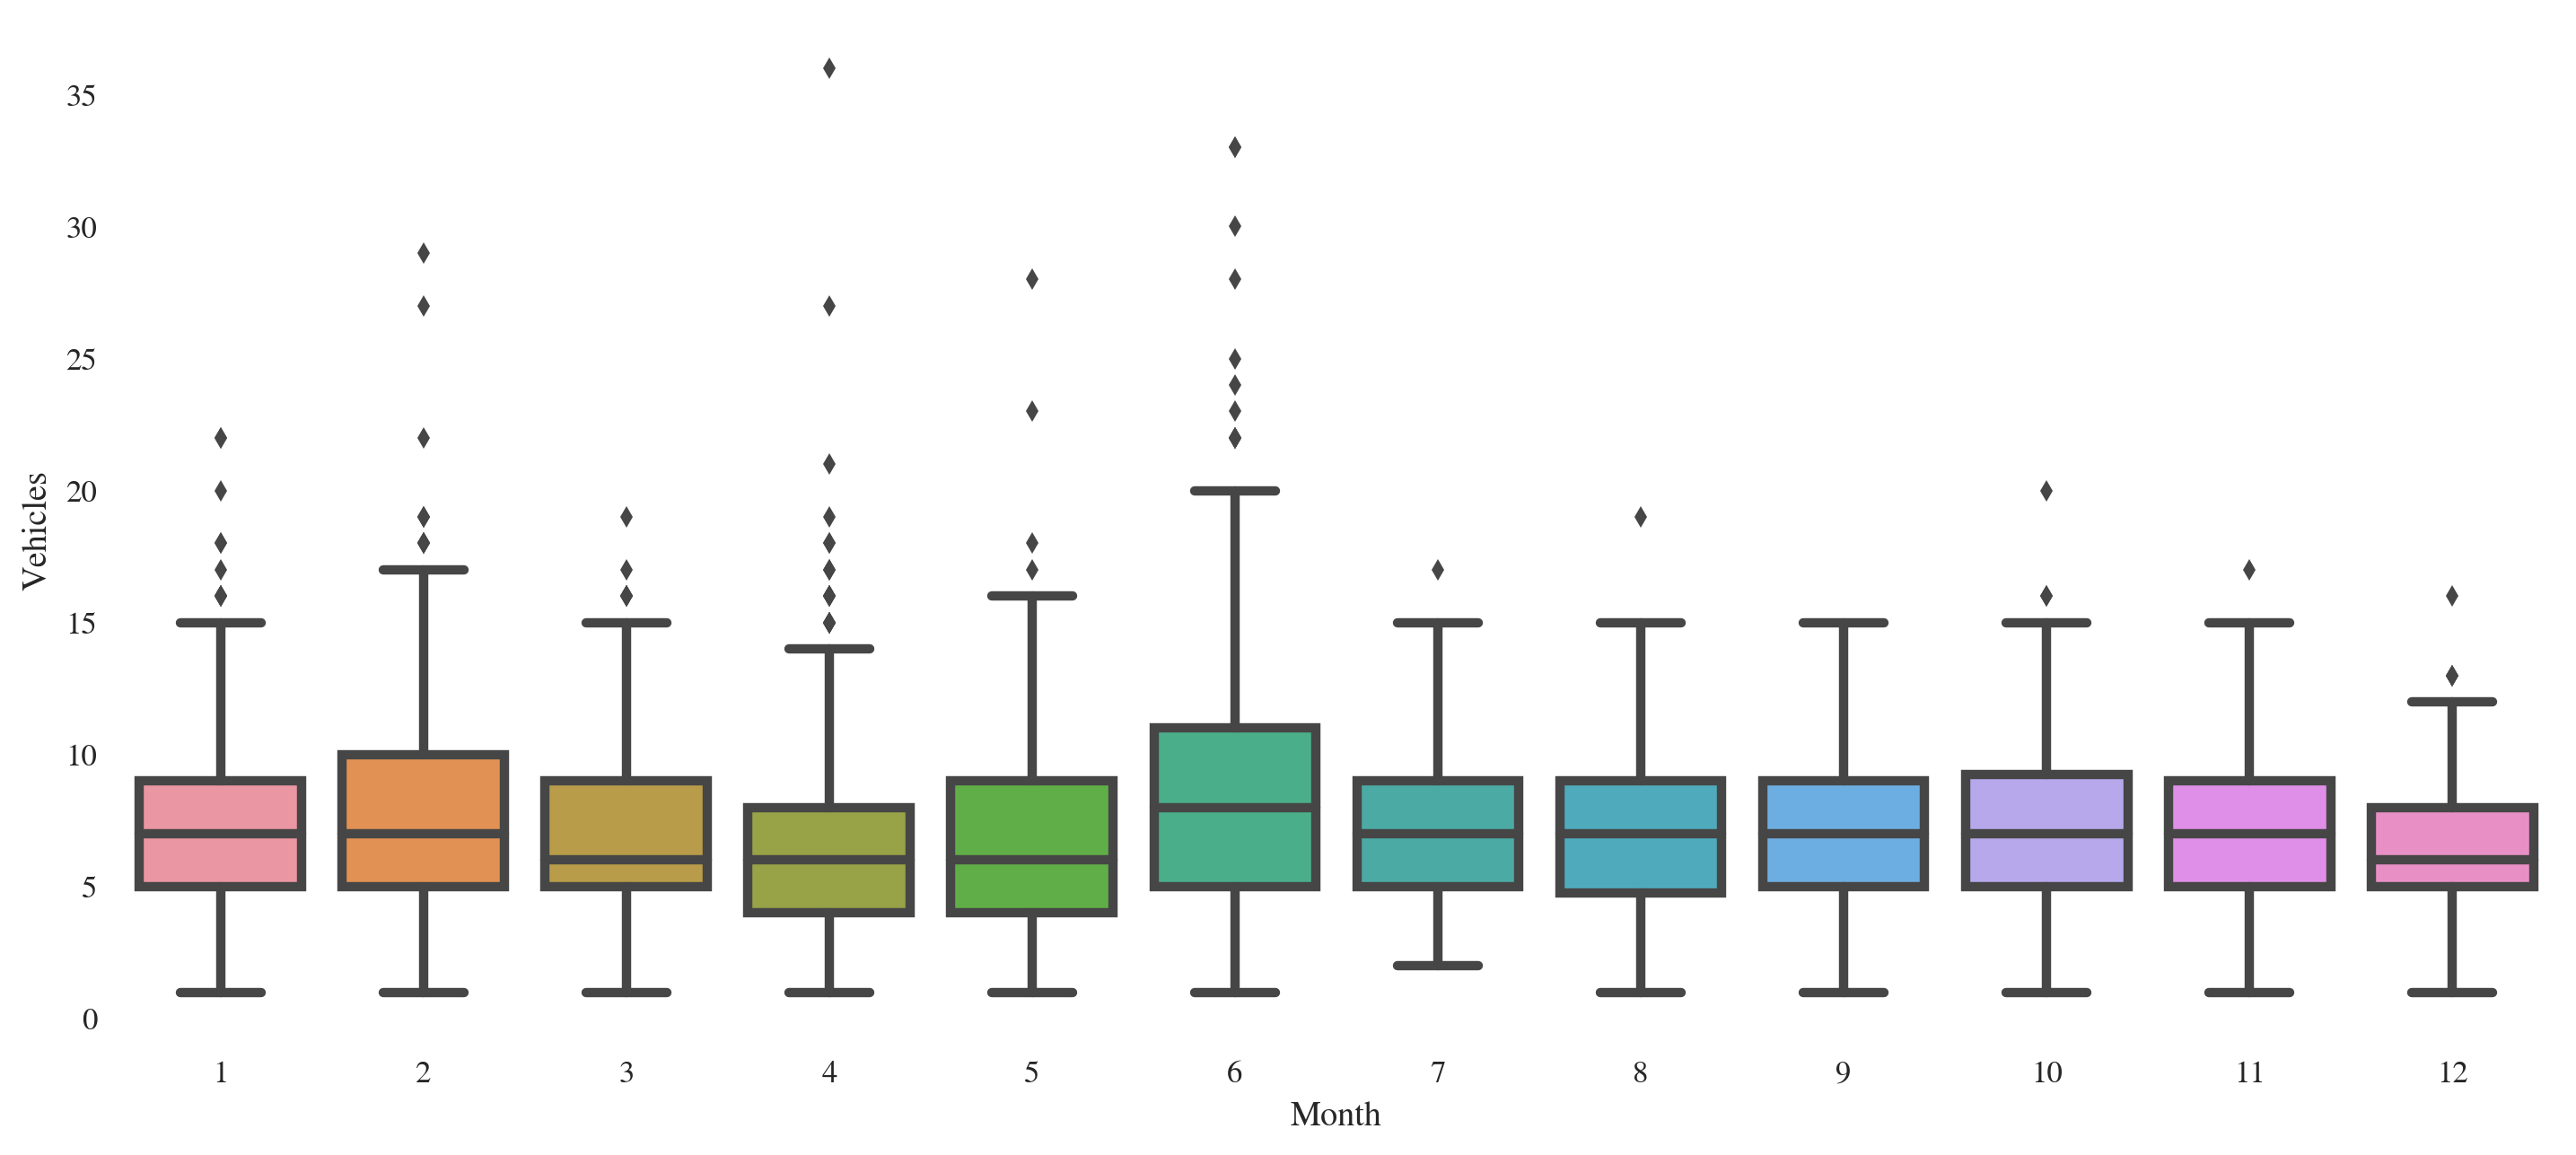

In [183]:
sns.boxplot(train4['Month'],train4['Vehicles'])

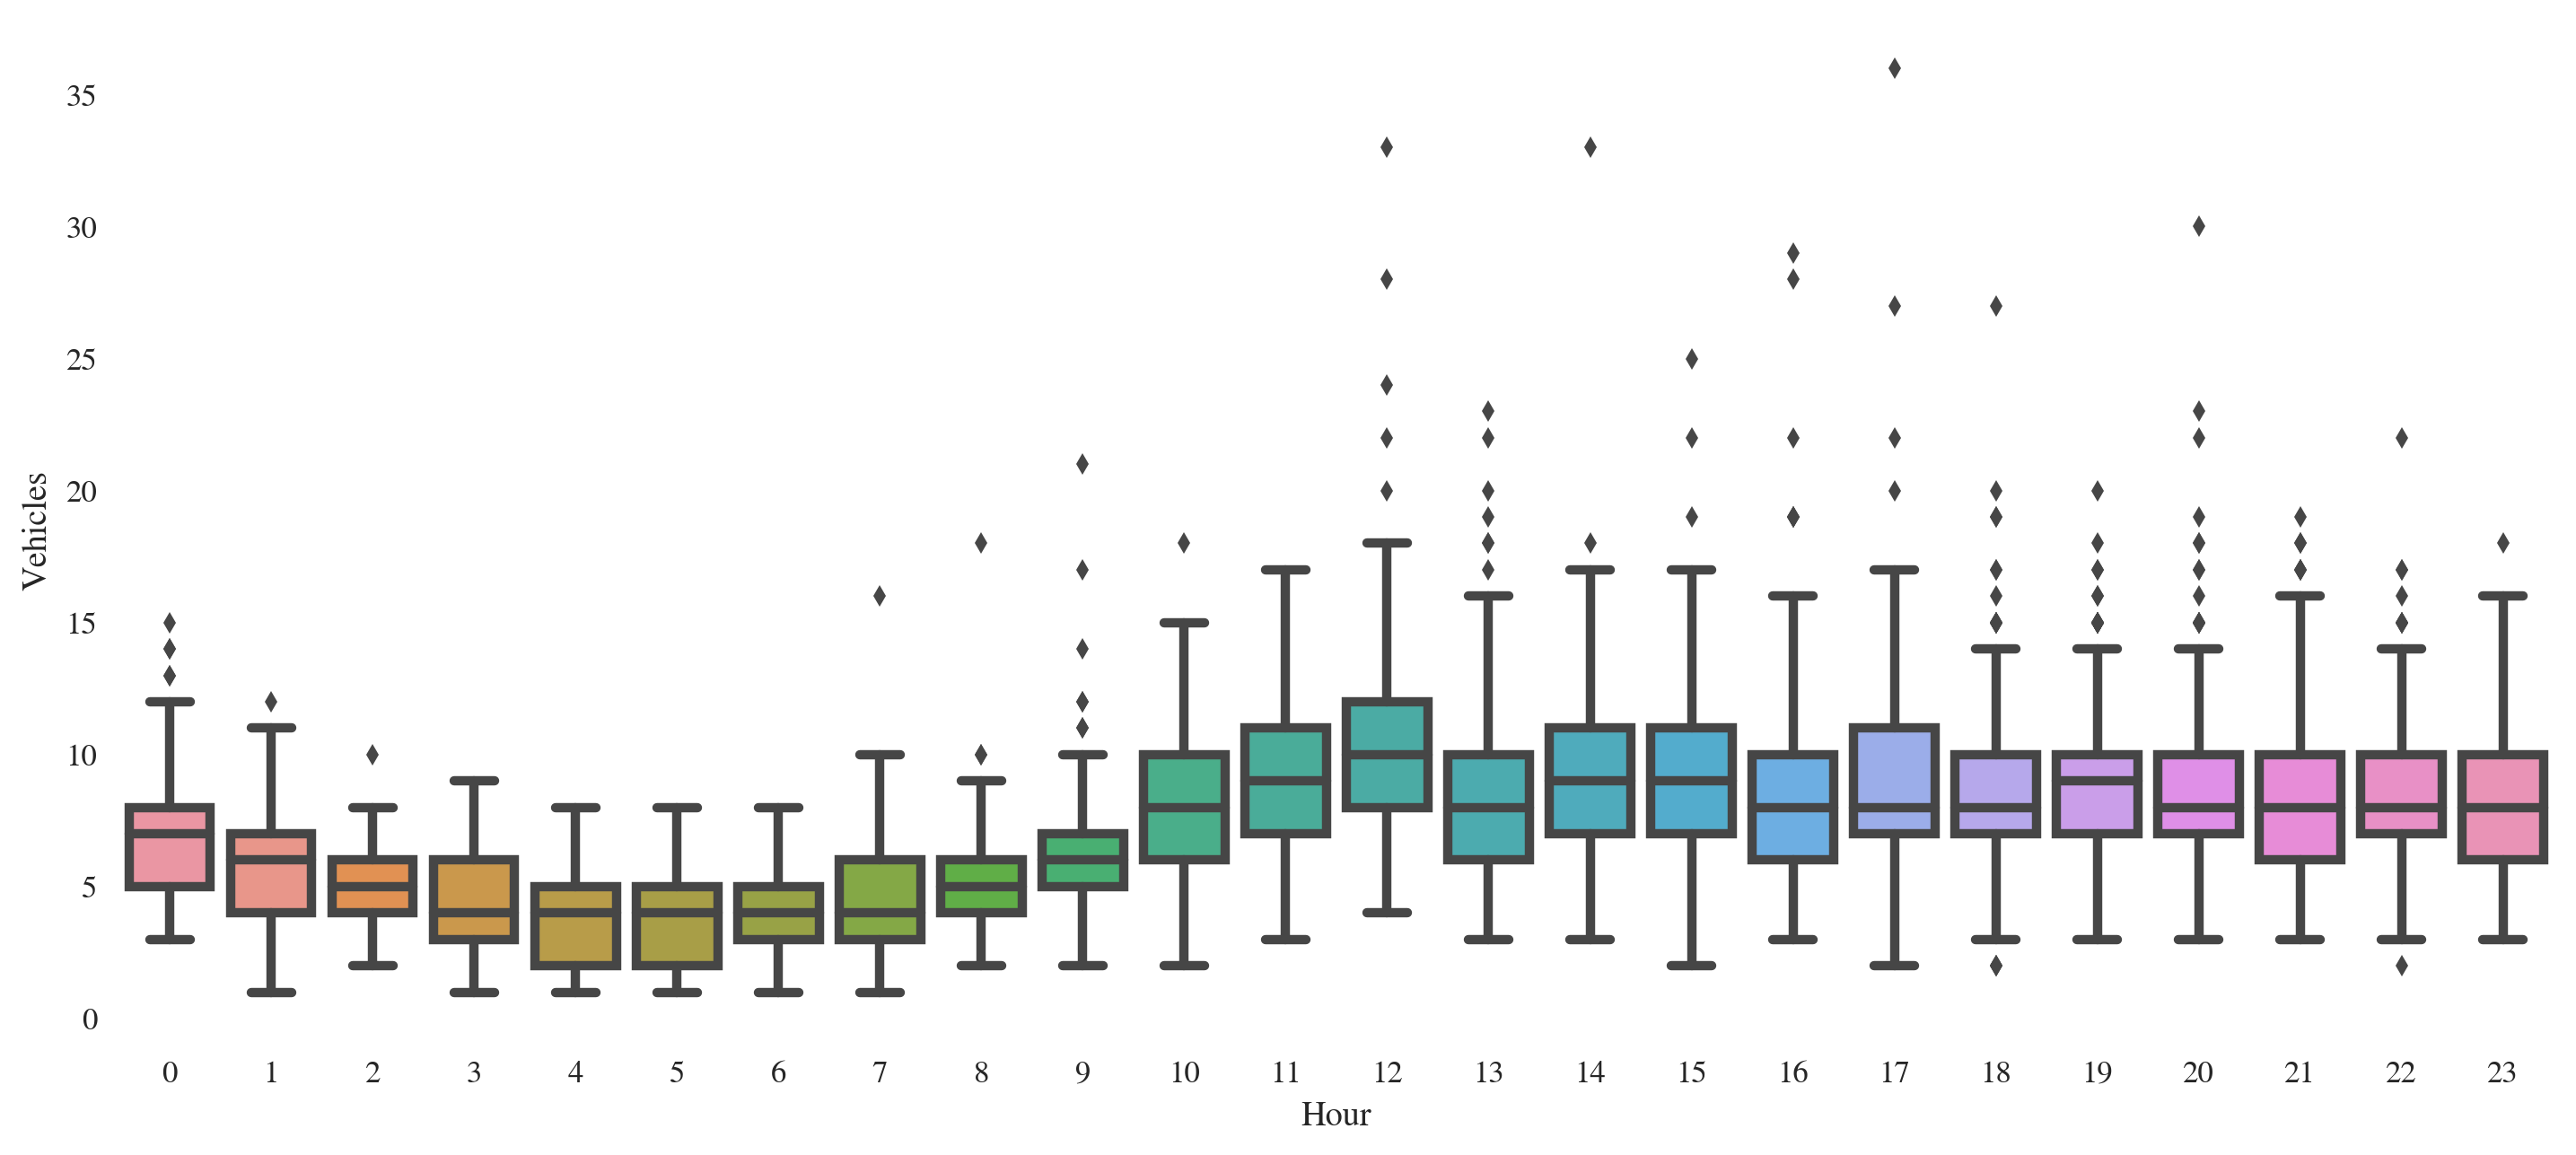

In [184]:
sns.boxplot(train4['Hour'],train4['Vehicles'])

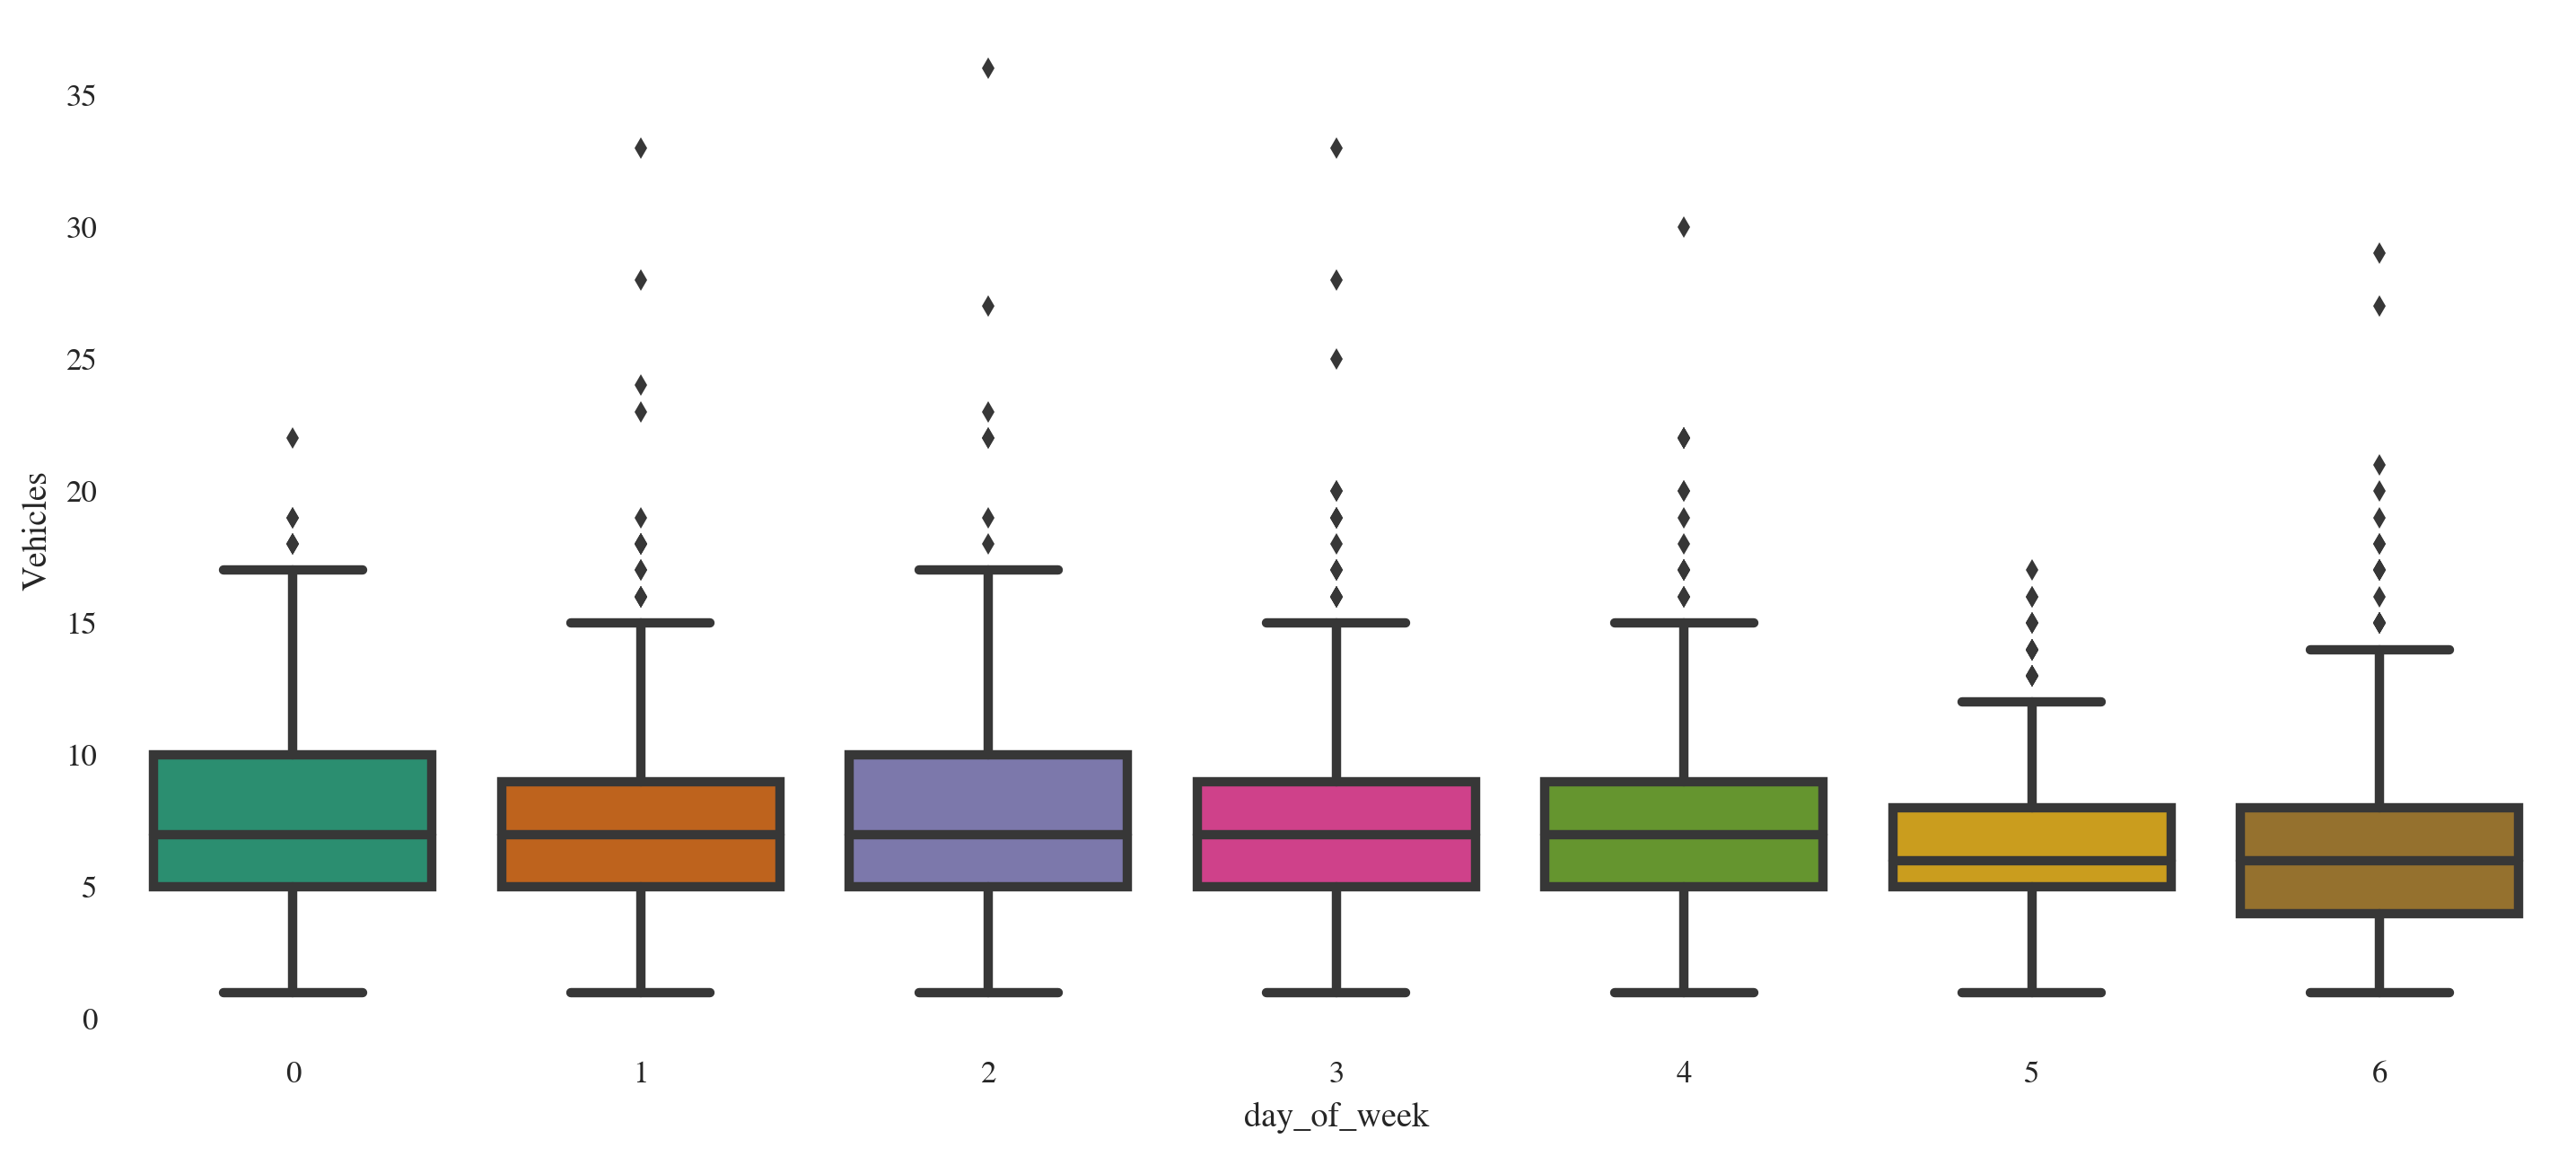

In [185]:
sns.boxplot(train4['day_of_week'],train4['Vehicles'])

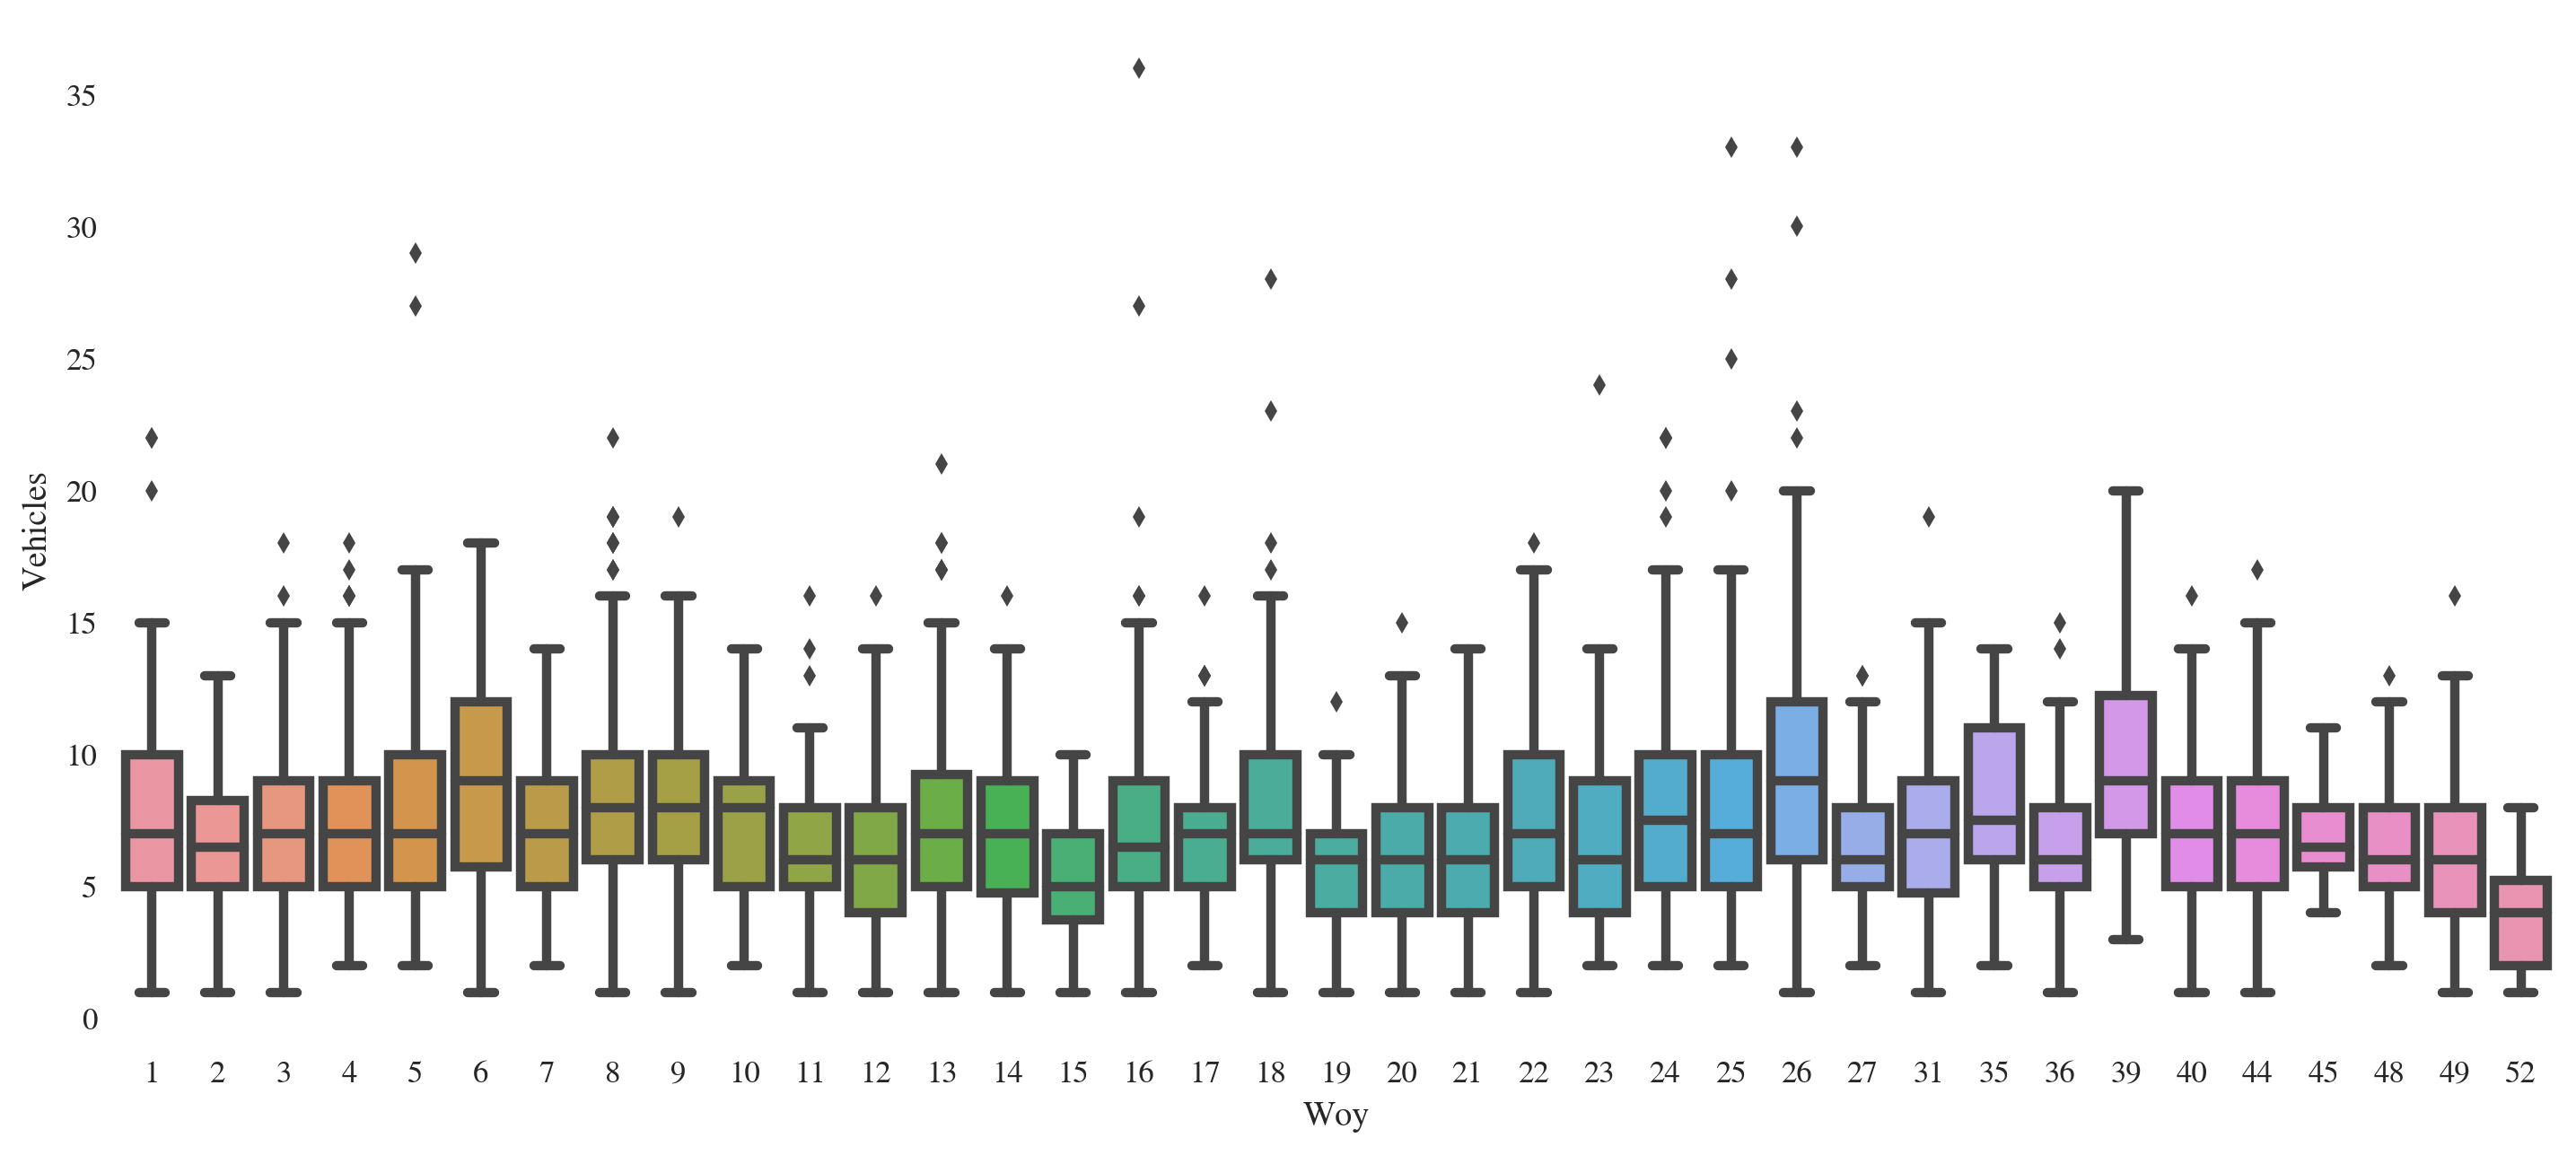

In [186]:
sns.boxplot(train4['Woy'],train4['Vehicles'])

In [188]:
del train4['Date']
del test4['Date']

In [189]:
#So taking the whole data makes sense 
Xtrain, Xtest, Ytrain, Ytest = train_test_split( train4.drop(['DateTime','ID','Vehicles'],axis = 1),train4['Vehicles'], test_size=.3, random_state=100 )
lr.fit(Xtrain, Ytrain )
print ("Training :"+str((mean_squared_error( Ytrain, lr.predict(Xtrain)))**.5))
print ("Test :"+str(mean_squared_error( Ytest, lr.predict(Xtest))**.5))
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(objective='reg:linear', silent=False,n_estimators=400,max_depth = 4)
xgb.fit(Xtrain, Ytrain )
print ("Training :"+str((mean_squared_error( Ytrain, xgb.predict(Xtrain)))**.5))
print ("Test :"+str(mean_squared_error( Ytest, xgb.predict(Xtest))**.5))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=1)

Training :3.13458889313
Test :3.07618677117


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

Training :1.60896118996
Test :2.39631177458


In [190]:
def Hour_buckets(df):
    df.ix[((df['Hour'] > 0) & (df['Hour'] <= 9)), 'Hour'] = 0
    df.ix[((((df['Hour'] > 9) & (df['Hour']<=23)))), 'Hour'] = 1
    return df 
train4 = Hour_buckets(train4)
test4 = Hour_buckets(test4)

In [191]:
#So taking the whole data makes sense 
Xtrain, Xtest, Ytrain, Ytest = train_test_split( train4.drop(['DateTime','ID','Vehicles'],axis = 1),train4['Vehicles'], test_size=.3, random_state=100 )
lr.fit(Xtrain, Ytrain )
print ("Training :"+str((mean_squared_error( Ytrain, lr.predict(Xtrain)))**.5))
print ("Test :"+str(mean_squared_error( Ytest, lr.predict(Xtest))**.5))
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(objective='reg:linear', silent=False,n_estimators=400,max_depth = 4)
xgb.fit(Xtrain, Ytrain )
print ("Training :"+str((mean_squared_error( Ytrain, xgb.predict(Xtrain)))**.5))
print ("Test :"+str(mean_squared_error( Ytest, xgb.predict(Xtest))**.5))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=1)

Training :2.92272611822
Test :2.8655826675


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

Training :1.83364772346
Test :2.51645001433


In [193]:
test4 = test4.drop(['DateTime','ID'],axis = 1)

In [194]:
test4['Vehicles'] = xgb.predict(test4)

In [195]:
test.head()
test2.head()
test3.head()
test4.head()

,Hourst,Tarikh,Month,Hour,day_of_week,Woy,Day_No,Vehicles
0,14581,30,6,1,4,26,210,93.486534
1,14582,30,6,1,4,26,210,93.486534
2,14583,30,6,1,4,26,210,93.486534
3,14584,30,6,1,4,26,210,93.486534
4,14585,30,6,1,4,26,210,93.486534


,Hourstr,Tarikh,Month,Hour,day_of_week,Woy,Vehicles
0,14592,1,1,0,5,1,16.853474
1,14593,1,1,0,5,1,16.853474
2,14594,1,1,0,5,1,16.853474
3,14595,1,1,0,5,1,16.853474
4,14596,1,1,0,5,1,16.853474


,Hourstr,Tarikh,Month,Hour,day_of_week,Woy,Vehicles
0,14592,7,1,0,5,1,24.290155
1,14593,7,1,0,5,1,24.290155
2,14594,7,1,0,5,1,24.290155
3,14595,7,1,0,5,1,24.290155
4,14596,7,1,0,5,1,24.290155


,Hourstr,Tarikh,Month,Hour,day_of_week,Woy,Vehicles
0,4341,7,1,0,5,1,14.127908
1,4342,7,1,0,5,1,14.127908
2,4343,7,1,0,5,1,14.127908
3,4344,7,1,0,5,1,14.127908
4,4345,7,1,0,5,1,14.127908


In [196]:
testm1 = pd.read_csv("Junc/junc1te.csv", parse_dates=True)
testm2 = pd.read_csv("Junc/junc2te.csv", parse_dates=True)
testm3 = pd.read_csv("Junc/junc3te.csv", parse_dates=True)
testm4 = pd.read_csv("Junc/junc4te.csv", parse_dates=True)

In [197]:
test2['ID'] = testm2['ID']
test3['ID'] = testm3['ID']
test4['ID'] = testm4['ID']

In [207]:
test.head(5)

,Hourst,Tarikh,Month,Hour,day_of_week,Woy,Day_No,Vehicles,ID
0,14581,30,6,1,4,26,210,93.486534,20170630131
1,14582,30,6,1,4,26,210,93.486534,20170630141
2,14583,30,6,1,4,26,210,93.486534,20170630151
3,14584,30,6,1,4,26,210,93.486534,20170630161
4,14585,30,6,1,4,26,210,93.486534,20170630171


In [208]:
del test['Day_No']

In [209]:
test1 = test.iloc[11:,1:7]

In [200]:
del test2['Hourstr ']
del test3['Hourstr']
del test4['Hourstr']

In [211]:
test1['ID'] =  testm1['ID']

In [212]:
test1.head()
test2.head()
test3.head()
test4.head()

,Tarikh,Month,Hour,day_of_week,Woy,Vehicles,ID
11,7,1,0,5,1,53.999374,20170701001
12,7,1,0,5,1,53.999374,20170701011
13,7,1,0,5,1,53.999374,20170701021
14,7,1,0,5,1,53.999374,20170701031
15,7,1,0,5,1,53.999374,20170701041


,Tarikh,Month,Hour,day_of_week,Woy,Vehicles,ID
0,1,1,0,5,1,16.853474,20170701002
1,1,1,0,5,1,16.853474,20170701012
2,1,1,0,5,1,16.853474,20170701022
3,1,1,0,5,1,16.853474,20170701032
4,1,1,0,5,1,16.853474,20170701042


,Tarikh,Month,Hour,day_of_week,Woy,Vehicles,ID
0,7,1,0,5,1,24.290155,20170701003
1,7,1,0,5,1,24.290155,20170701013
2,7,1,0,5,1,24.290155,20170701023
3,7,1,0,5,1,24.290155,20170701033
4,7,1,0,5,1,24.290155,20170701043


,Tarikh,Month,Hour,day_of_week,Woy,Vehicles,ID
0,7,1,0,5,1,14.127908,20170701004
1,7,1,0,5,1,14.127908,20170701014
2,7,1,0,5,1,14.127908,20170701024
3,7,1,0,5,1,14.127908,20170701034
4,7,1,0,5,1,14.127908,20170701044


In [213]:
test_xgb = pd.DataFrame()
test_xgb = pd.concat([test1,test2,test3,test4],axis=0)

In [217]:
test_xgb = test_xgb.iloc[:,5:7]

In [219]:
test_xgb.to_csv("test_xgb.csv",index = False)

In [227]:
test = pd.read_csv("test.csv")

In [228]:
test_xgb = pd.read_csv("test_xgb.csv")

In [229]:
a = test['ID'].tolist()
b = test_xgb['ID'].tolist()

In [232]:
set(b) - set(a)

{2017103121}